<a href="https://colab.research.google.com/github/zeyadmageid/Soccer-Premier-League-Analysis/blob/main/PL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing dependencies and data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Data/*/*.csv'
path

'/content/drive/MyDrive/Data/*/*.csv'

In [ ]:
from glob import glob
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
path = '/content/drive/MyDrive/Data/Team_Data/*/*.csv'
team_files = glob(path)
example_file = team_files[2]
example_file

'/content/drive/MyDrive/Data/Team_Data/2017_season/Everton_2017_season data.csv'

In [ ]:
example_df = pd.read_csv(example_file)
example_df.head()

GW                 date result Home/Away        xG  scored      xGA  \
0   1  2017-08-12 15:00:00      w         h  0.720574       1  0.27644   
1   2  2017-08-21 20:00:00      d         a  0.599710       1  1.14216   
2   3  2017-08-27 13:30:00      l         a  0.326655       0  1.16991   
3   4  2017-09-09 15:00:00      l         h  1.151440       0  2.17535   
4   5  2017-09-17 16:00:00      l         a  1.062980       0  3.28722   

   conceded    xpts  pts      npxG    npxGA                     ppda  \
0         0  1.7647    3  0.720574  0.27644  {'att': 130, 'def': 21}   
1         1  0.8764    1  0.599710  1.14216  {'att': 279, 'def': 13}   
2         2  0.6019    0  0.326655  1.16991  {'att': 350, 'def': 20}   
3         3  0.6814    0  1.151440  2.17535  {'att': 242, 'def': 23}   
4         4  0.2144    0  1.062980  2.52605  {'att': 218, 'def': 23}   

              ppda_allowed  ppda_coef  oppda_coef  deep  deep_allowed  \
0  {'att': 289, 'def': 20}   6.190476   14.450000     3             9   
1  {'att': 149, 'def': 13}  21.461538   11.461538     1            14   
2  {'att': 282, 'def': 19}  17.500000   14.842105     4            11   
3  {'att': 275, 'def': 26}  10.521739   10.576923     9             9   
4  {'att': 326, 'def': 31}   9.478261   10.516129     1             5   

      npxGD  
0  0.444134  
1 -0.542450  
2 -0.843255  
3 -1.023910  
4 -1.463070

In [ ]:
def process_file(team_file, verbose=False):
  team_name, season, _ = team_file.split('/')[-1].split('_')
  df = pd.read_csv(team_file)
  df = df.assign(team_name=team_name, season=season)

  if verbose:
    print(f" Running for Team: '{team_name}'. Season: {season}")

  return df

In [ ]:
dfs = []
for file in tqdm(team_files):
  dfs.append(process_file(file,False))

team_df = pd.concat(dfs).reset_index(drop=True)

  0%|          | 0/120 [00:00<?, ?it/s]

In [ ]:
team_df.head()

GW                 date result Home/Away        xG  scored       xGA  \
0   1  2017-08-11 19:45:00      l         a  1.464950       3  2.543290   
1   2  2017-08-19 15:00:00      w         h  1.883550       2  0.123075   
2   3  2017-08-26 17:30:00      l         a  0.670573       0  2.737250   
3   4  2017-09-09 15:00:00      l         h  1.349030       1  1.039430   
4   5  2017-09-16 15:00:00      d         a  1.241810       1  0.700349   

   conceded    xpts  pts  ...     npxGA                     ppda  \
0         4  0.6852    0  ...  2.543290  {'att': 298, 'def': 22}   
1         0  2.7489    3  ...  0.123075  {'att': 354, 'def': 17}   
2         2  0.1828    0  ...  1.976080  {'att': 325, 'def': 19}   
3         2  1.6922    0  ...  1.039430  {'att': 284, 'def': 24}   
4         1  1.8999    1  ...  0.700349  {'att': 234, 'def': 15}   

              ppda_allowed  ppda_coef  oppda_coef  deep  deep_allowed  \
0   {'att': 98, 'def': 18}  13.545455    5.444444     2            13   
1  {'att': 269, 'def': 14}  20.823529   19.214286     4             2   
2  {'att': 147, 'def': 18}  17.105263    8.166667     3            13   
3  {'att': 164, 'def': 15}  11.833333   10.933333     2            12   
4  {'att': 183, 'def': 13}  15.600000   14.076923     5             3   

      npxGD  team_name season  
0 -1.078340  Leicester   2017  
1  1.760475  Leicester   2017  
2 -1.305507  Leicester   2017  
3 -0.451569  Leicester   2017  
4 -0.219668  Leicester   2017  

[5 rows x 21 columns]

In [ ]:
team_df.info() #checking for missing values and viewing data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GW            4560 non-null   int64  
 1   date          4560 non-null   object 
 2   result        4560 non-null   object 
 3   Home/Away     4560 non-null   object 
 4   xG            4560 non-null   float64
 5   scored        4560 non-null   int64  
 6   xGA           4560 non-null   float64
 7   conceded      4560 non-null   int64  
 8   xpts          4560 non-null   float64
 9   pts           4560 non-null   int64  
 10  npxG          4560 non-null   float64
 11  npxGA         4560 non-null   float64
 12  ppda          4560 non-null   object 
 13  ppda_allowed  4560 non-null   object 
 14  ppda_coef     4560 non-null   float64
 15  oppda_coef    4560 non-null   float64
 16  deep          4560 non-null   int64  
 17  deep_allowed  4560 non-null   int64  
 18  npxGD         4560 non-null 

In [ ]:
team_df['season'].unique()

array(['2017', '2016', '2014', '2019', '2015', '2018'], dtype=object)

In [ ]:
df_2014 = team_df[team_df['season']=='2014']
df_2015 = team_df[team_df['season']=='2015']
df_2016 = team_df[team_df['season']=='2016']
df_2017 = team_df[team_df['season']=='2017']
df_2018 = team_df[team_df['season']=='2018']
df_2019 = team_df[team_df['season']=='2019']

In [ ]:
df_2014.head()

GW                 date result Home/Away        xG  scored       xGA  \
1520   1  2014-08-17 16:00:00      w         a  1.480530       2  0.965583   
1521   2  2014-08-25 20:00:00      w         h  1.313750       3  0.901889   
1522   3  2014-08-30 15:00:00      l         h  0.891768       0  0.299792   
1523   4  2014-09-13 12:45:00      d         a  2.308340       2  2.078040   
1524   5  2014-09-21 16:00:00      d         h  1.055920       1  1.020930   

      conceded    xpts  pts  ...     npxGA                     ppda  \
1520         0  1.7849    3  ...  0.965583  {'att': 284, 'def': 22}   
1521         1  1.7441    3  ...  0.901889  {'att': 289, 'def': 17}   
1522         1  1.8615    0  ...  0.299792  {'att': 104, 'def': 30}   
1523         2  1.5454    1  ...  2.078040  {'att': 221, 'def': 44}   
1524         1  1.3050    1  ...  1.020930  {'att': 223, 'def': 39}   

                 ppda_allowed  ppda_coef  oppda_coef  deep  deep_allowed  \
1520  {'att': 343, 'def': 22}  12.909091   15.590909     9             6   
1521  {'att': 328, 'def': 18}  17.000000   18.222222    11             7   
1522  {'att': 326, 'def': 12}   3.466667   27.166667    19             4   
1523  {'att': 262, 'def': 37}   5.022727    7.081081    16             9   
1524  {'att': 313, 'def': 21}   5.717949   14.904762    17             2   

         npxGD        team_name season  
1520  0.514947  Manchester City   2014  
1521  0.411861  Manchester City   2014  
1522  0.591976  Manchester City   2014  
1523  0.230300  Manchester City   2014  
1524  0.034990  Manchester City   2014  

[5 rows x 21 columns]

# EDA

In [ ]:
def League_winner(df):
  '''
  This function prints a barplot of points collected by teams in the premier league

  Inputs: Dataframe for the respective season

  Outputs: Barplot for number of points collected by each team

  '''
  year = int(df['season'].values[0])
  dff = df.groupby('team_name')['pts'].sum().reset_index().sort_values(by='pts', ascending=False)
  fig, ax = plt.subplots(figsize=(20, 10))

  barplot = plt.bar(x=dff['team_name'], height = dff['pts'])
  plt.bar_label(barplot, labels=dff['pts'], label_type='edge', padding = 3)
  plt.xlabel('Teams')
  plt.ylabel('Points')
  plt.title(f"Points for Premier League Teams Season {year}/{year+1} season")
  plt.xticks(rotation=90)
  plt.yticks(np.arange(0, 100, 5))
  plt.show()
  return

def Best_defence(df):
  '''
  This function prints a barplot of goals conceded by teams in the premier league throughout the season

  Inputs: Dataframe for the respective season

  '''
  year = int(df['season'].values[0])
  dff = df.groupby('team_name')['conceded'].sum().reset_index().sort_values(by='conceded', ascending=True)
  fig, ax = plt.subplots(figsize=(20, 10))
  barplot = plt.bar(x=dff['team_name'], height = dff['conceded'])
  plt.bar_label(barplot, labels=dff['conceded'], label_type='edge', padding = 3)

  plt.xlabel('Teams')
  plt.ylabel('Goals Conceded')
  plt.title(f"Goals Conceded by Premier League Teams Season {year}/{year+1} season")
  plt.xticks(rotation=90)
  plt.yticks(np.arange(0, 105, 5))
  plt.show()
  return

def Best_attack(df):
  '''
  This function prints a barplot of goals conceded by teams in the premier league throughout the season

  Inputs: Dataframe for the respective season

  '''
  year = int(df['season'].values[0])
  dff = df.groupby('team_name')['scored'].sum().reset_index().sort_values(by='scored', ascending=False)
  fig, ax = plt.subplots(figsize=(20, 10))

  barplot = plt.bar(x=dff['team_name'], height = dff['scored'])
  plt.bar_label(barplot, labels=dff['scored'], label_type='edge', padding = 3)

  plt.xlabel('Teams')
  plt.ylabel('Goals Scored')
  plt.title(f"Goals Scored by Premier League Teams Season {year}/{year+1} season")
  plt.xticks(rotation=90)
  plt.yticks(np.arange(0, 150, 5))
  plt.show()
  return

def team_xg(df):
    '''
    This function prints a side-by-side barplot of expected and actual goals scored by teams in the premier league throughout the season. This can give us an insight into the team's efficiency with scoring chances

    Inputs: Dataframe for the respective season

    '''
    year = int(df['season'].values[0])

    dff = df.groupby('team_name')[['scored', 'xG']].sum().reset_index().sort_values(by='scored', ascending=False)
    dff['xG'] = dff['xG'].round(2)
    dff['scored'] = dff['scored'].round(2)
    # Set the width of the bars and calculate the bar positions
    width = 0.35  # Adjust this value for the desired separation between bars
    x = np.arange(len(dff['team_name']))

    plt.figure(figsize=(20, 10))

    # Plot 'Goals Scored'
    barplot1=plt.bar(x - width/2, dff['scored'], width=width, label='Goals Scored', color='blue', alpha=0.7)

    # Plot 'Goals Expected' next to 'Goals Scored'
    barplot2=plt.bar(x + width/2, dff['xG'], width=width, label='Goals Expected', color='green', alpha=0.7)

    plt.bar_label(barplot1, labels=dff['scored'], label_type='edge', padding = 3, rotation=90)
    plt.bar_label(barplot2, labels=dff['xG'], label_type='edge', padding = 3, rotation=90)


    # Add labels and a legend
    plt.xlabel('Team')
    plt.ylabel('Goals')
    plt.legend()

    # Rotate x-axis labels for better readability (optional)
    plt.xticks(x, dff['team_name'], rotation=90)
    plt.yticks(np.arange(0, 150, 5))

    # Add a title
    plt.title(f'Goals scored vs Expected Goals for each team during {year}/{year+1} season')

    # Show the plot
    plt.tight_layout()
    plt.show()

def homevsaway(df):

    year = int(df['season'].values[0])

    dff_home = df[df['Home/Away'] == 'h']
    dff_away = df[df['Home/Away'] == 'a']

    dff_home = dff_home.groupby('team_name')['pts'].mean().reset_index().sort_values(by='team_name', ascending=False)
    dff_away = dff_away.groupby('team_name')['pts'].mean().reset_index().sort_values(by='team_name', ascending=False)

    dff_home['pts'] = dff_home['pts'].round(2)
    dff_away['pts'] = dff_away['pts'].round(2)

    width = 0.35
    x = np.arange(len(dff_home['team_name']))

    fig, ax = plt.subplots(figsize=(20, 13))

    width = 0.35
    x = np.arange(len(dff_home['team_name']))

    barplot1= plt.bar(x - width/2, dff_home['pts'], width = width, label='Average Home Points', color='blue', alpha=0.7)
    barplot2= plt.bar(x + width/2, dff_away['pts'], width = width, label='Average Away Points', color='green', alpha=0.7)

    plt.bar_label(barplot1, labels=dff_home['pts'], label_type='edge', padding = 10, rotation=90)
    plt.bar_label(barplot2, labels=dff_away['pts'], label_type='edge', padding = 10, rotation=90)

    # Add labels and a legend
    plt.xlabel('Team')
    plt.ylabel('Average Points Per Game')
    plt.legend()

    # Rotate x-axis labels for better readability (optional)
    plt.xticks(x, dff_home['team_name'], rotation=90)

    plt.yticks(np.arange(0, 3, 0.1))

    # Add a title
    plt.title(f"Average Home & Away Points obtained by each team during {year}/{year+1} season")

    # Show the plot
    plt.tight_layout()
    plt.show()
    return


Now let's print team stats for every PL season from 2014 till 2019

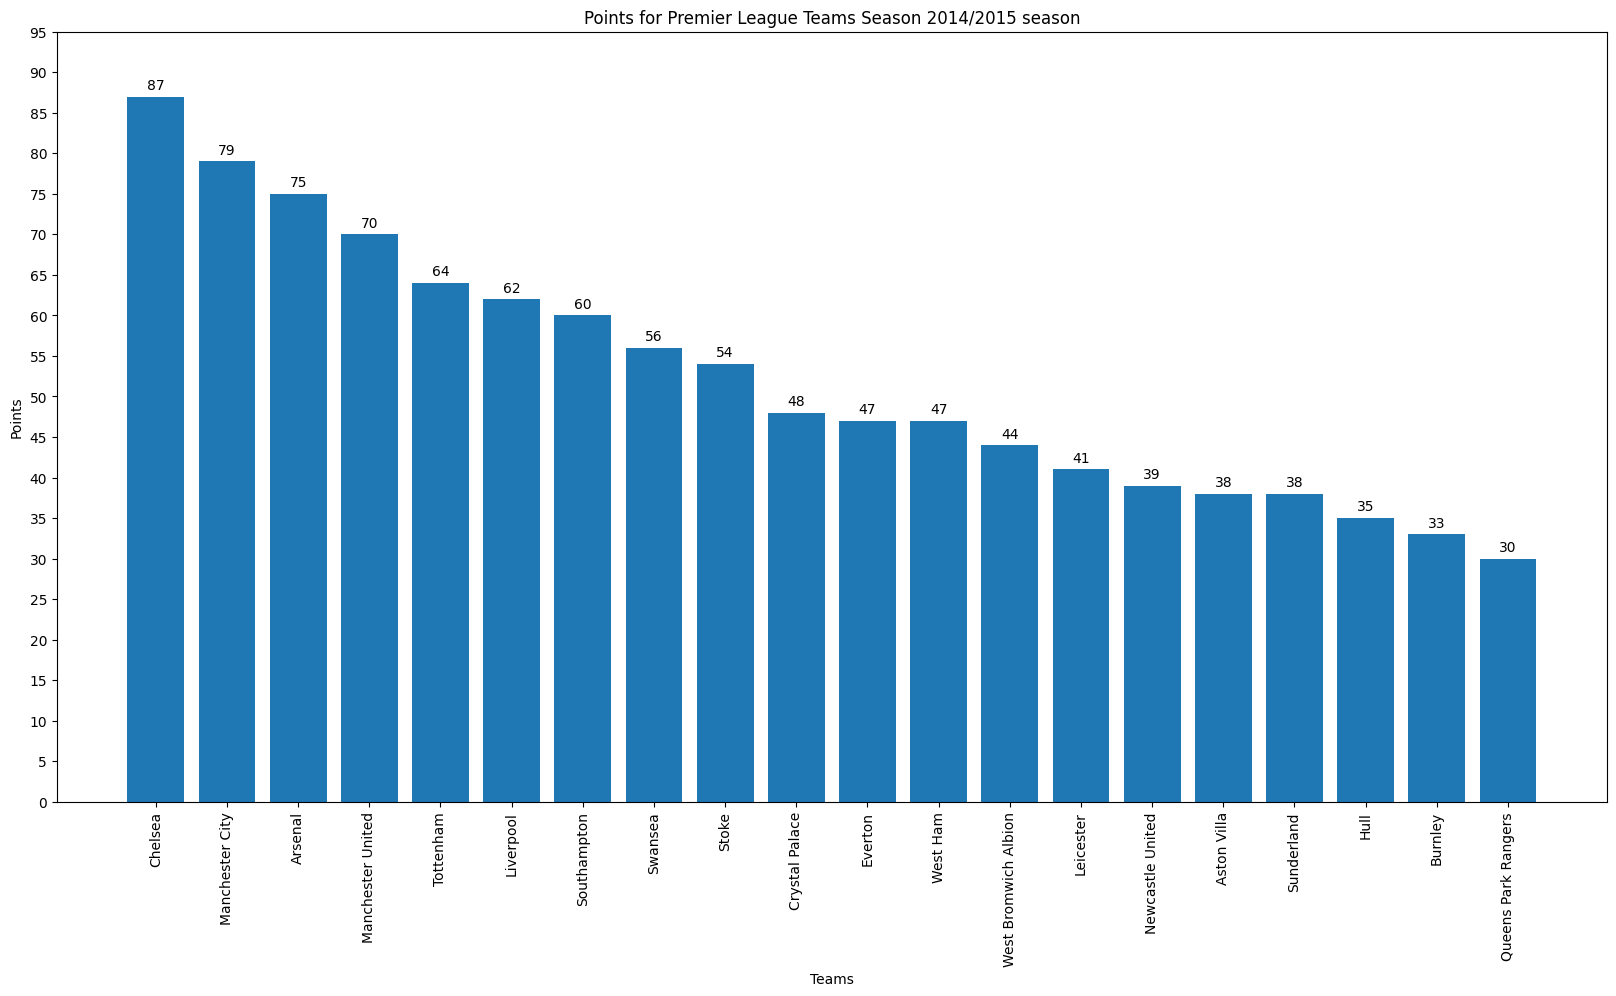

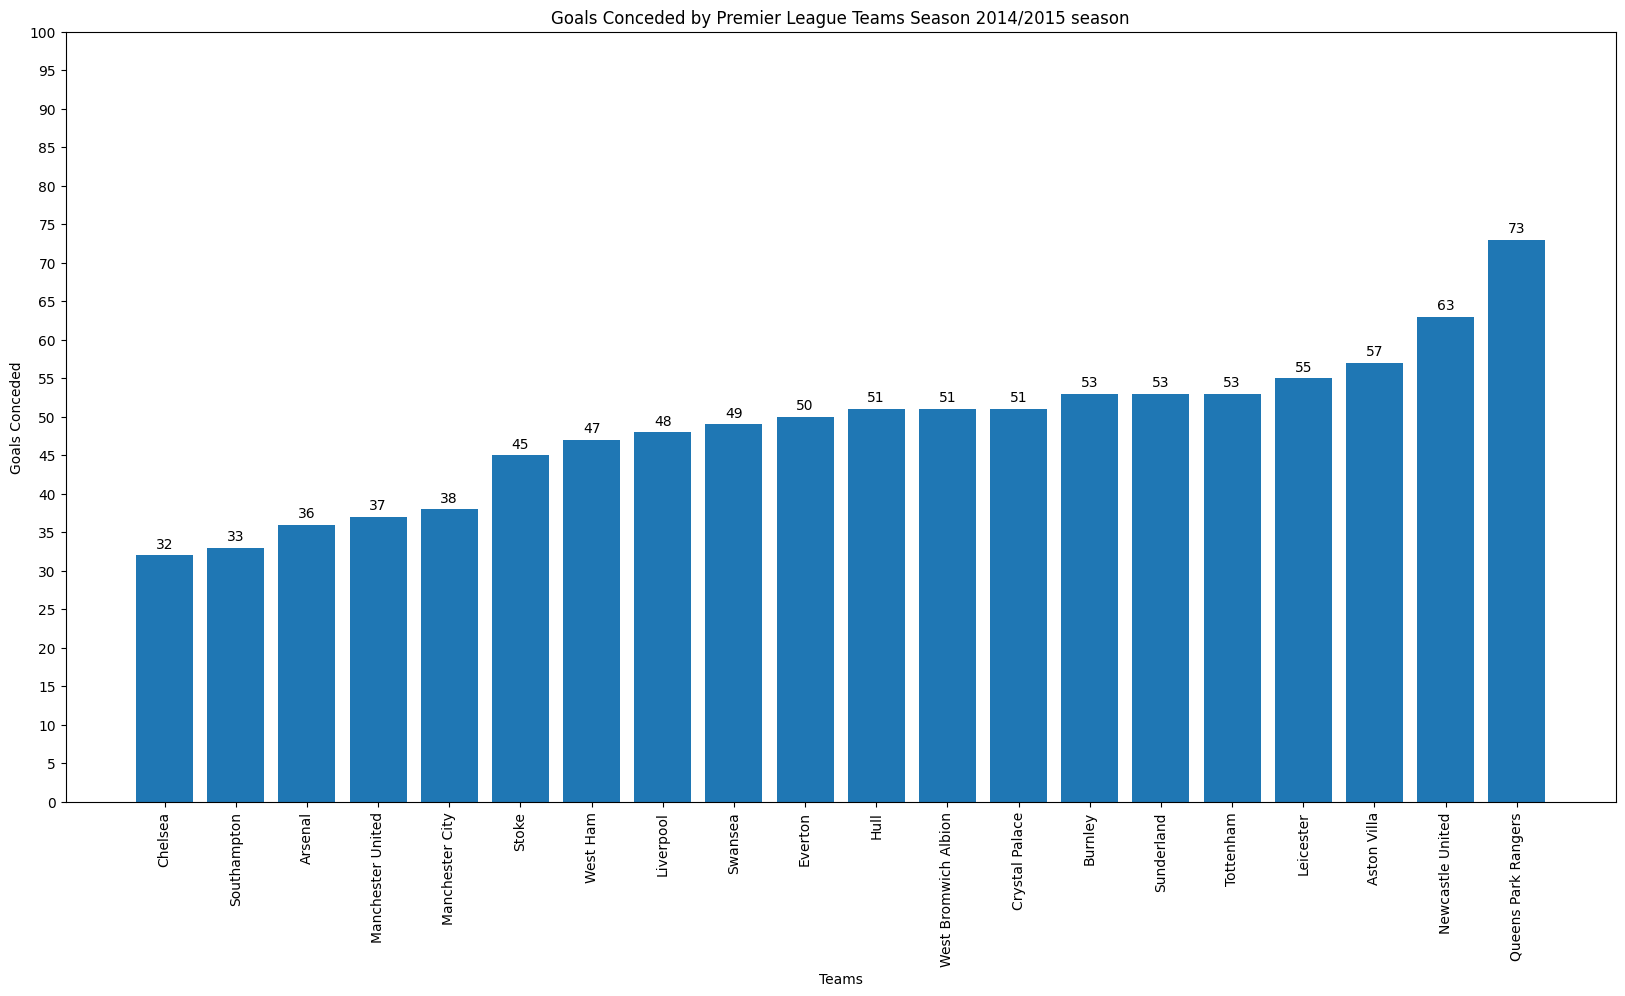

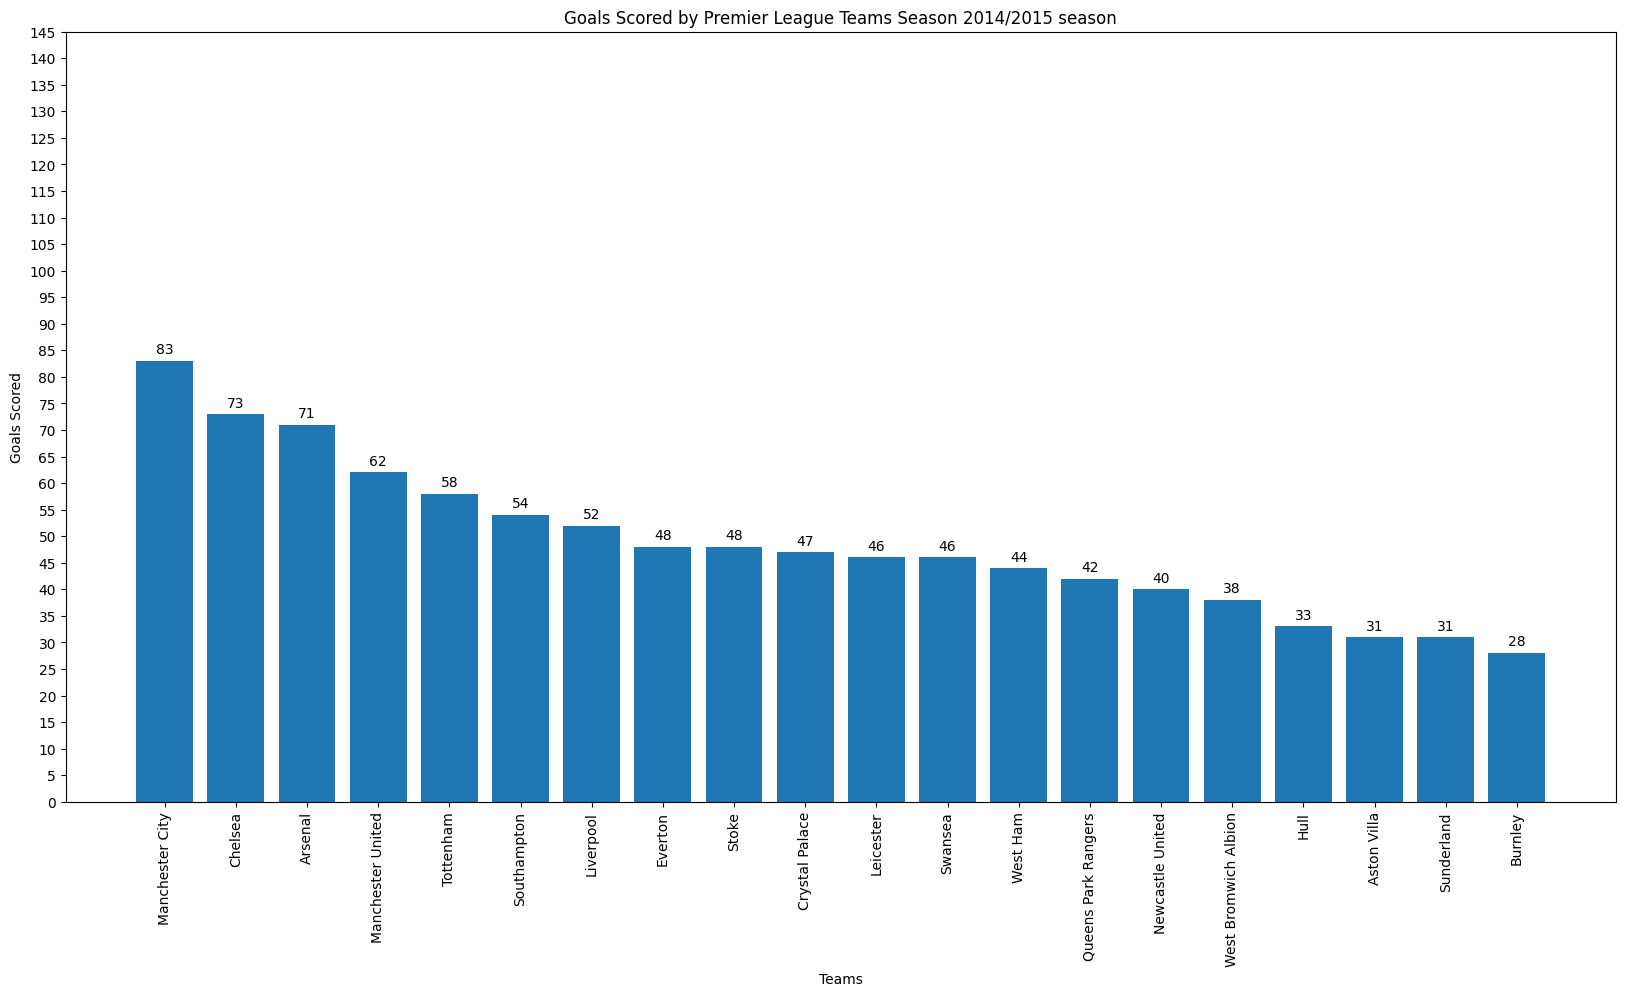

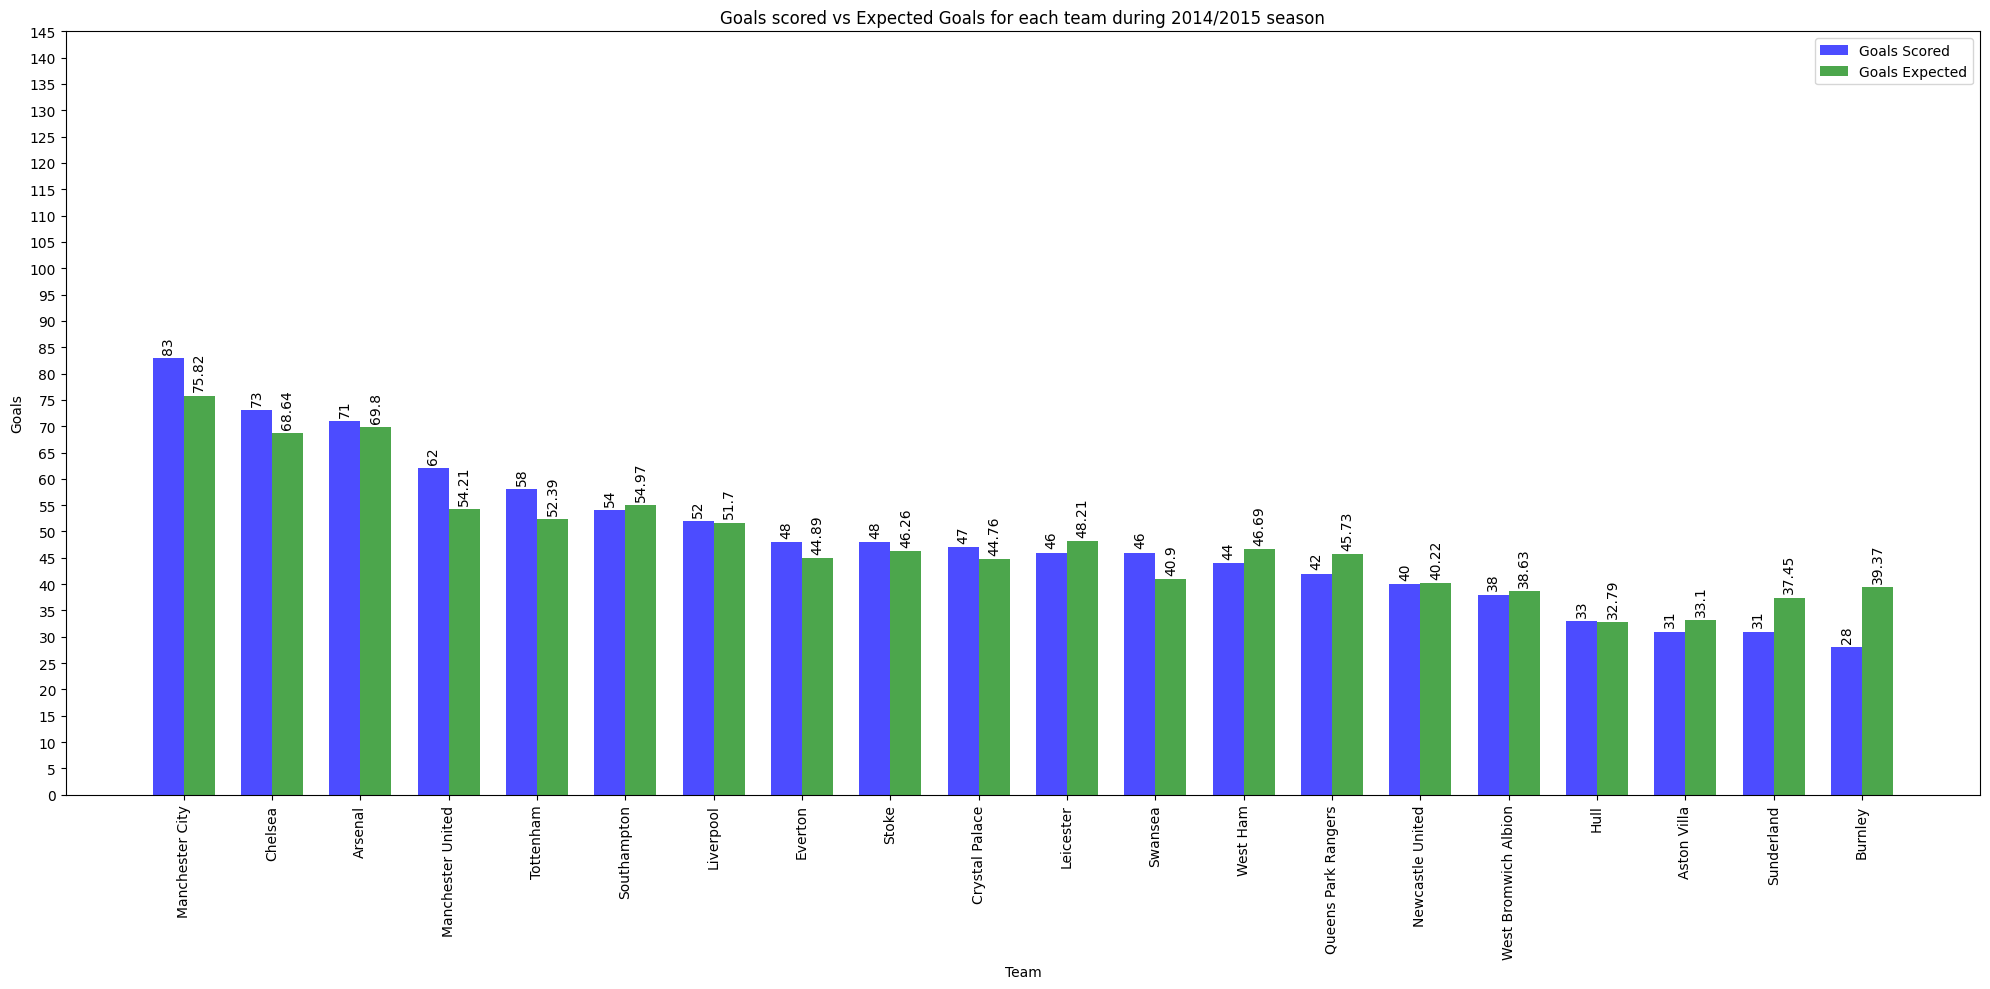

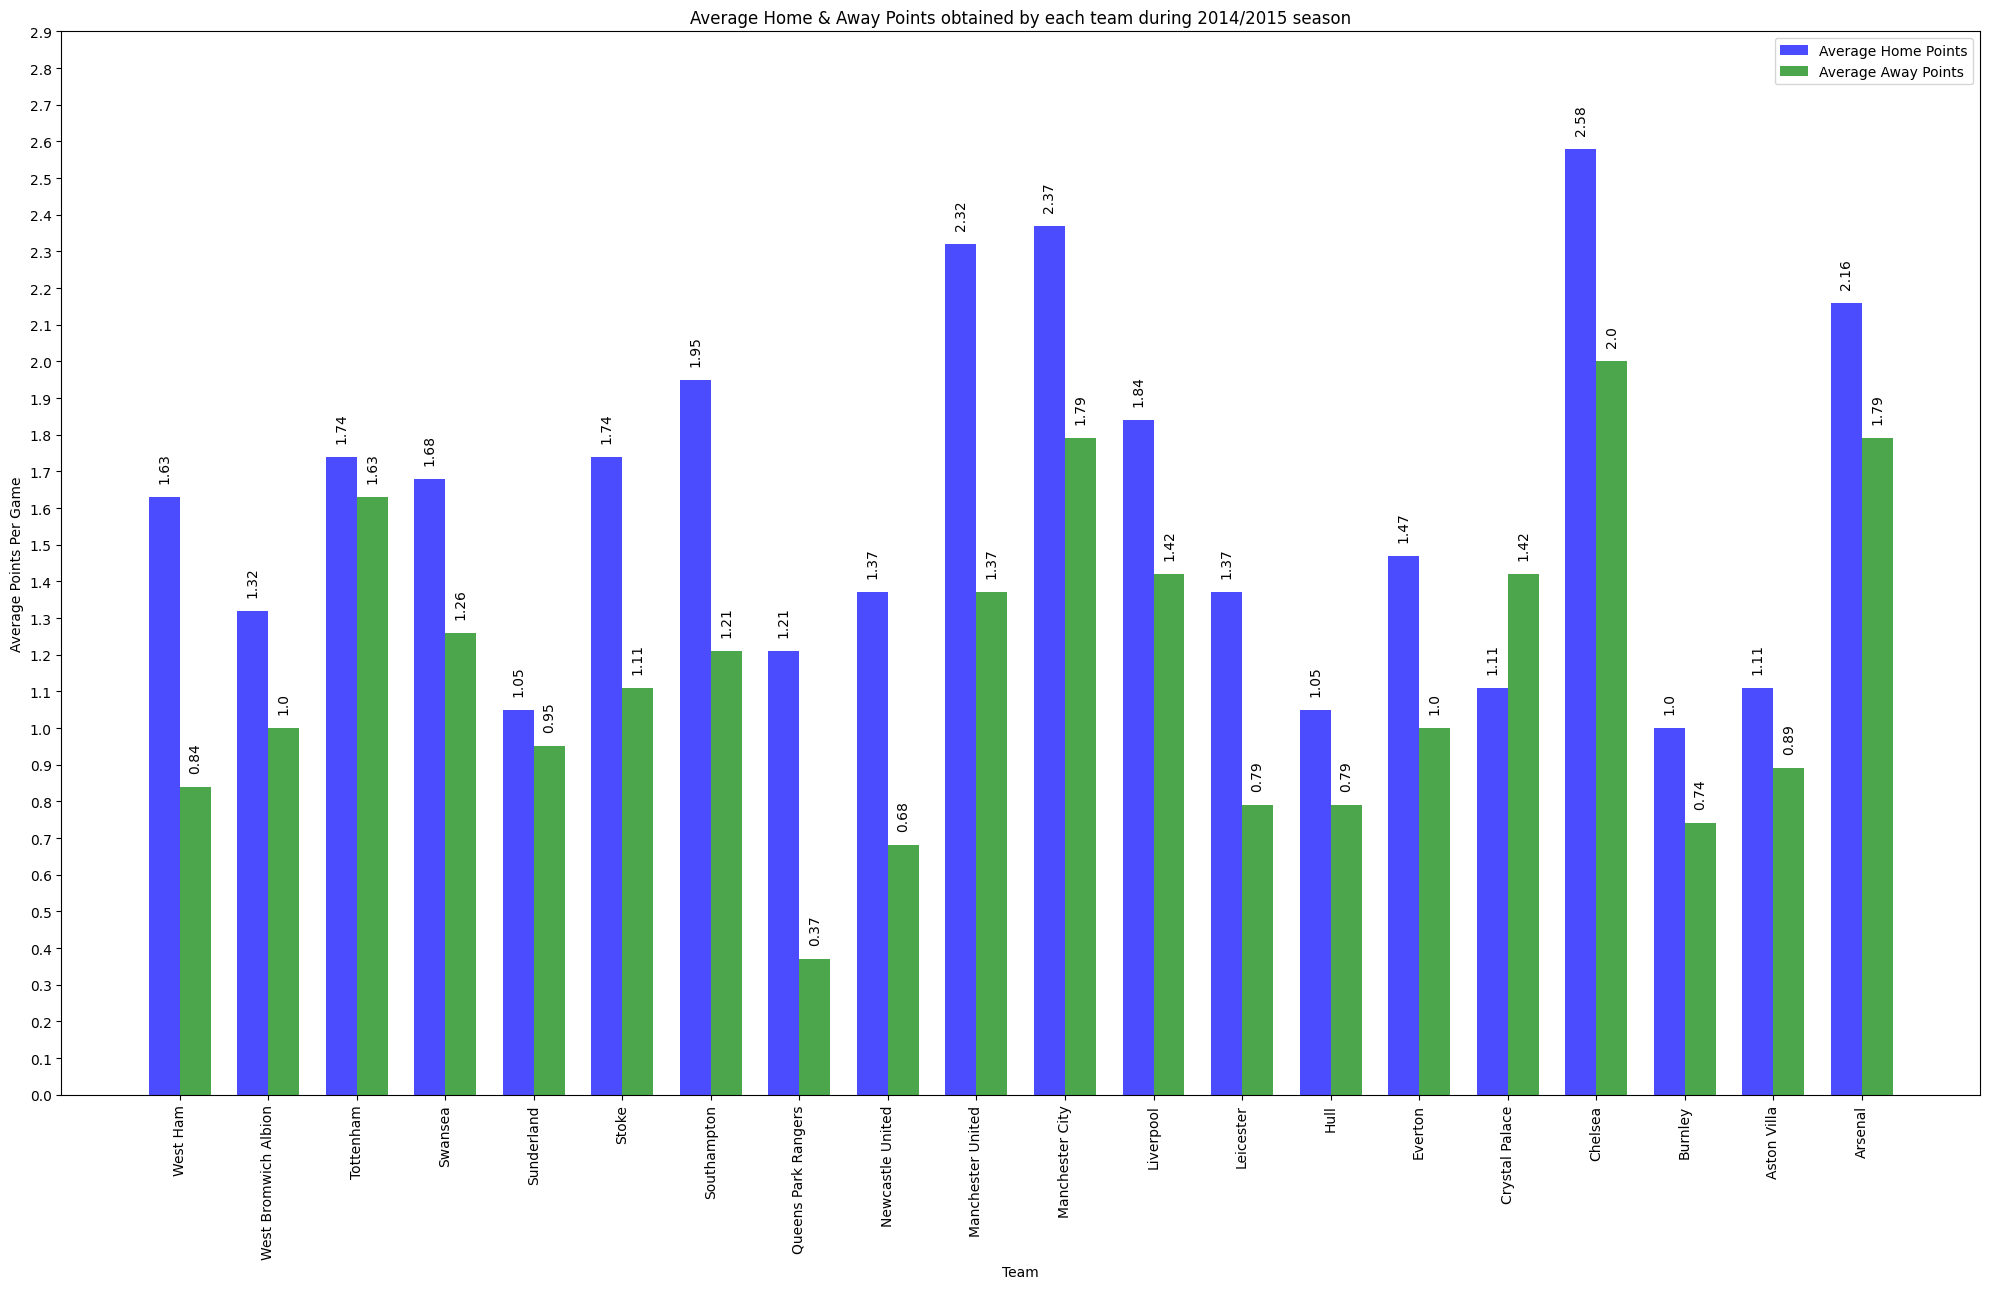

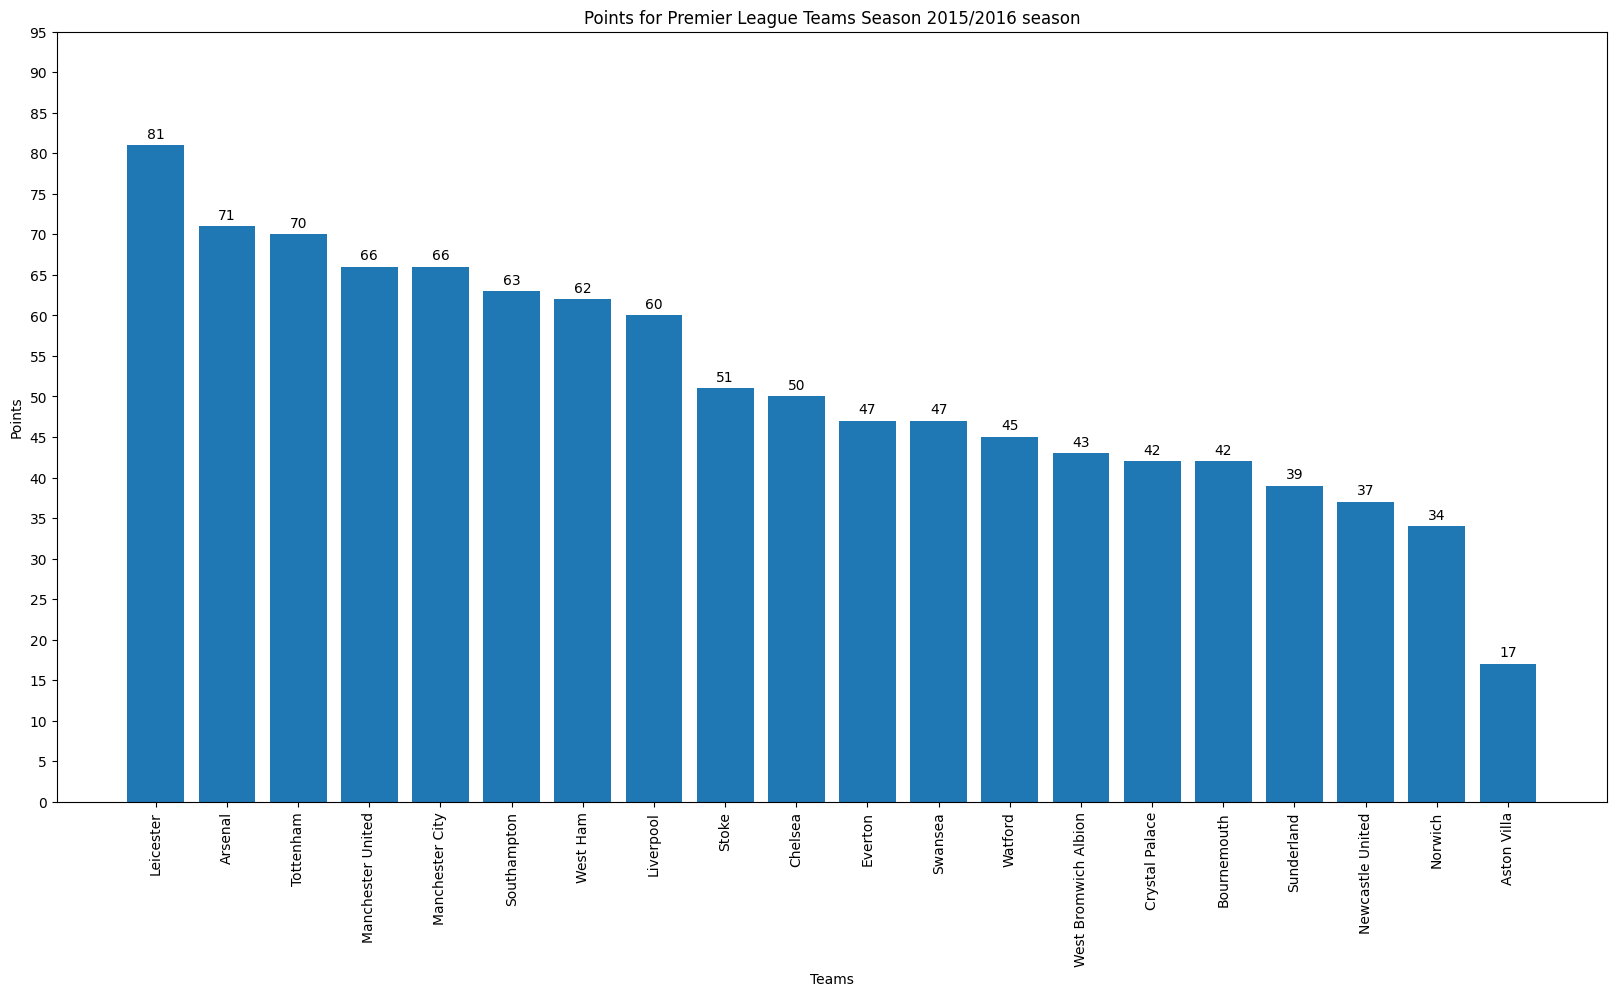

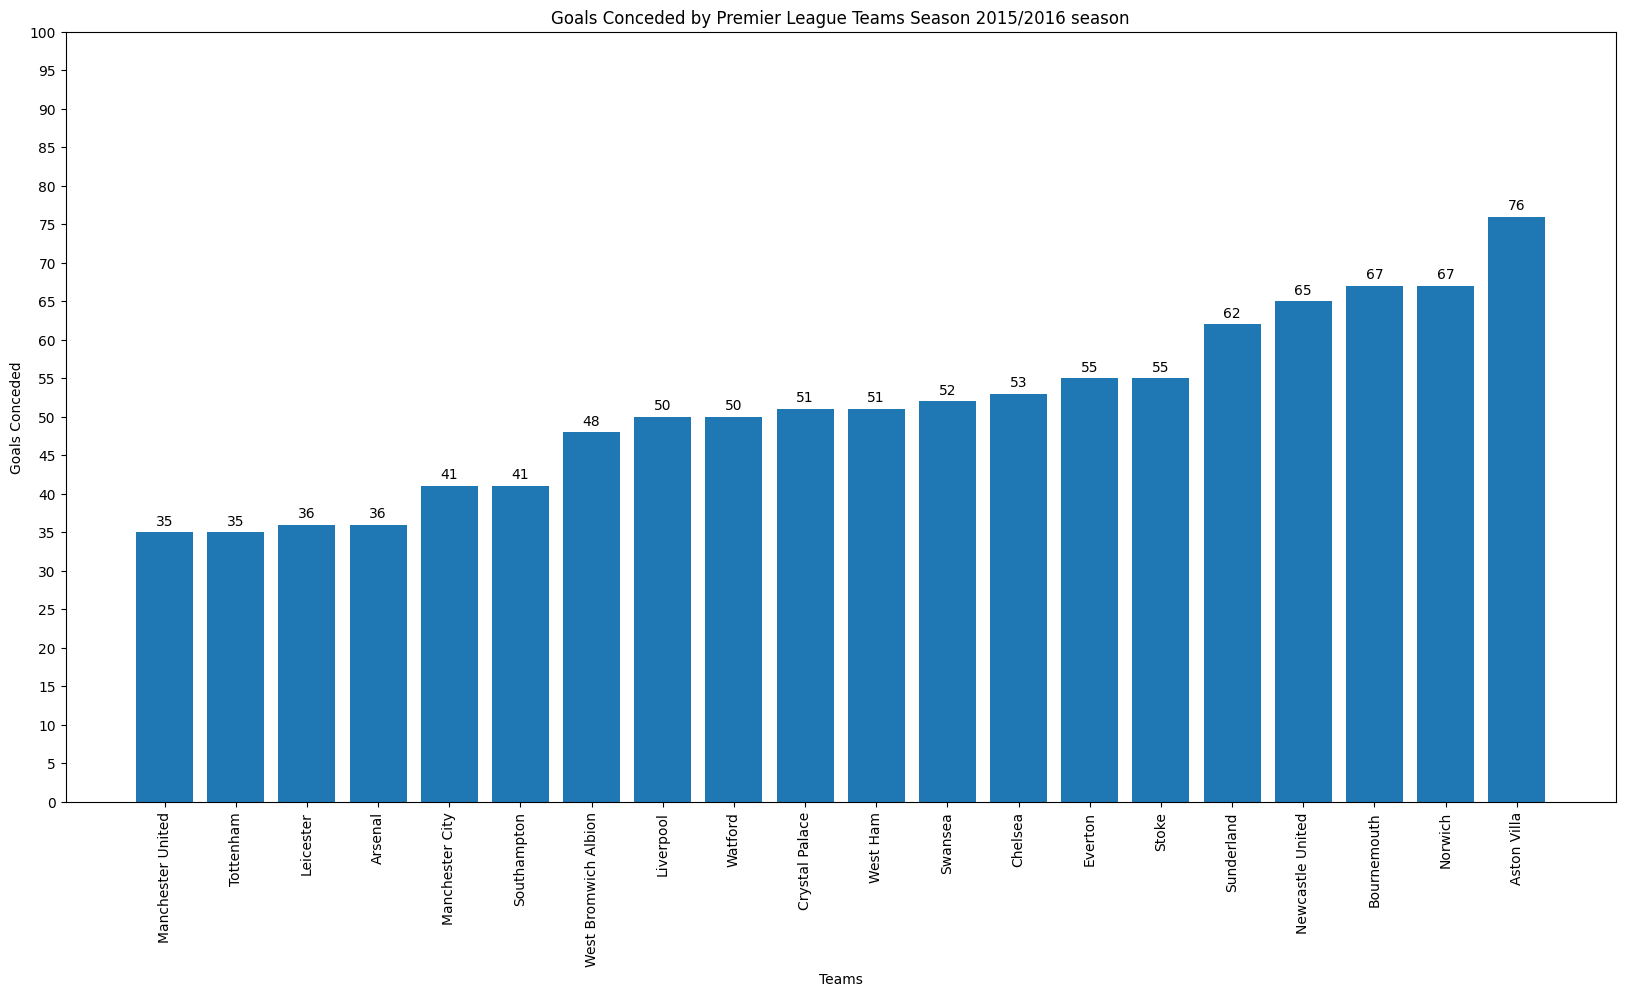

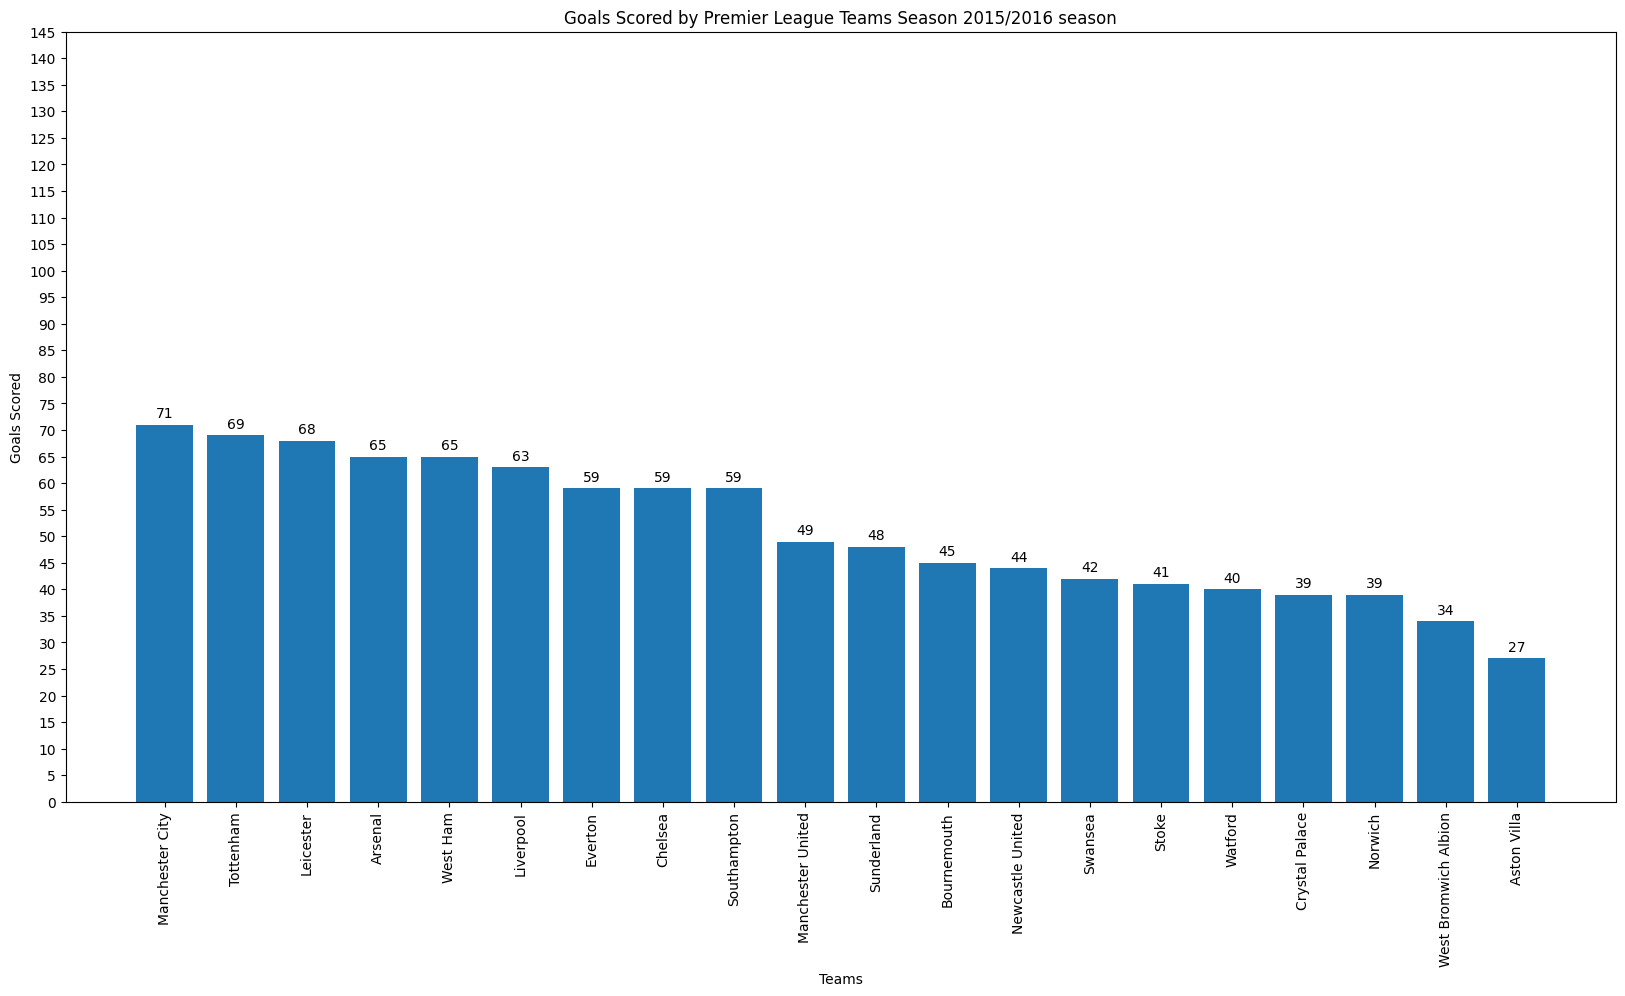

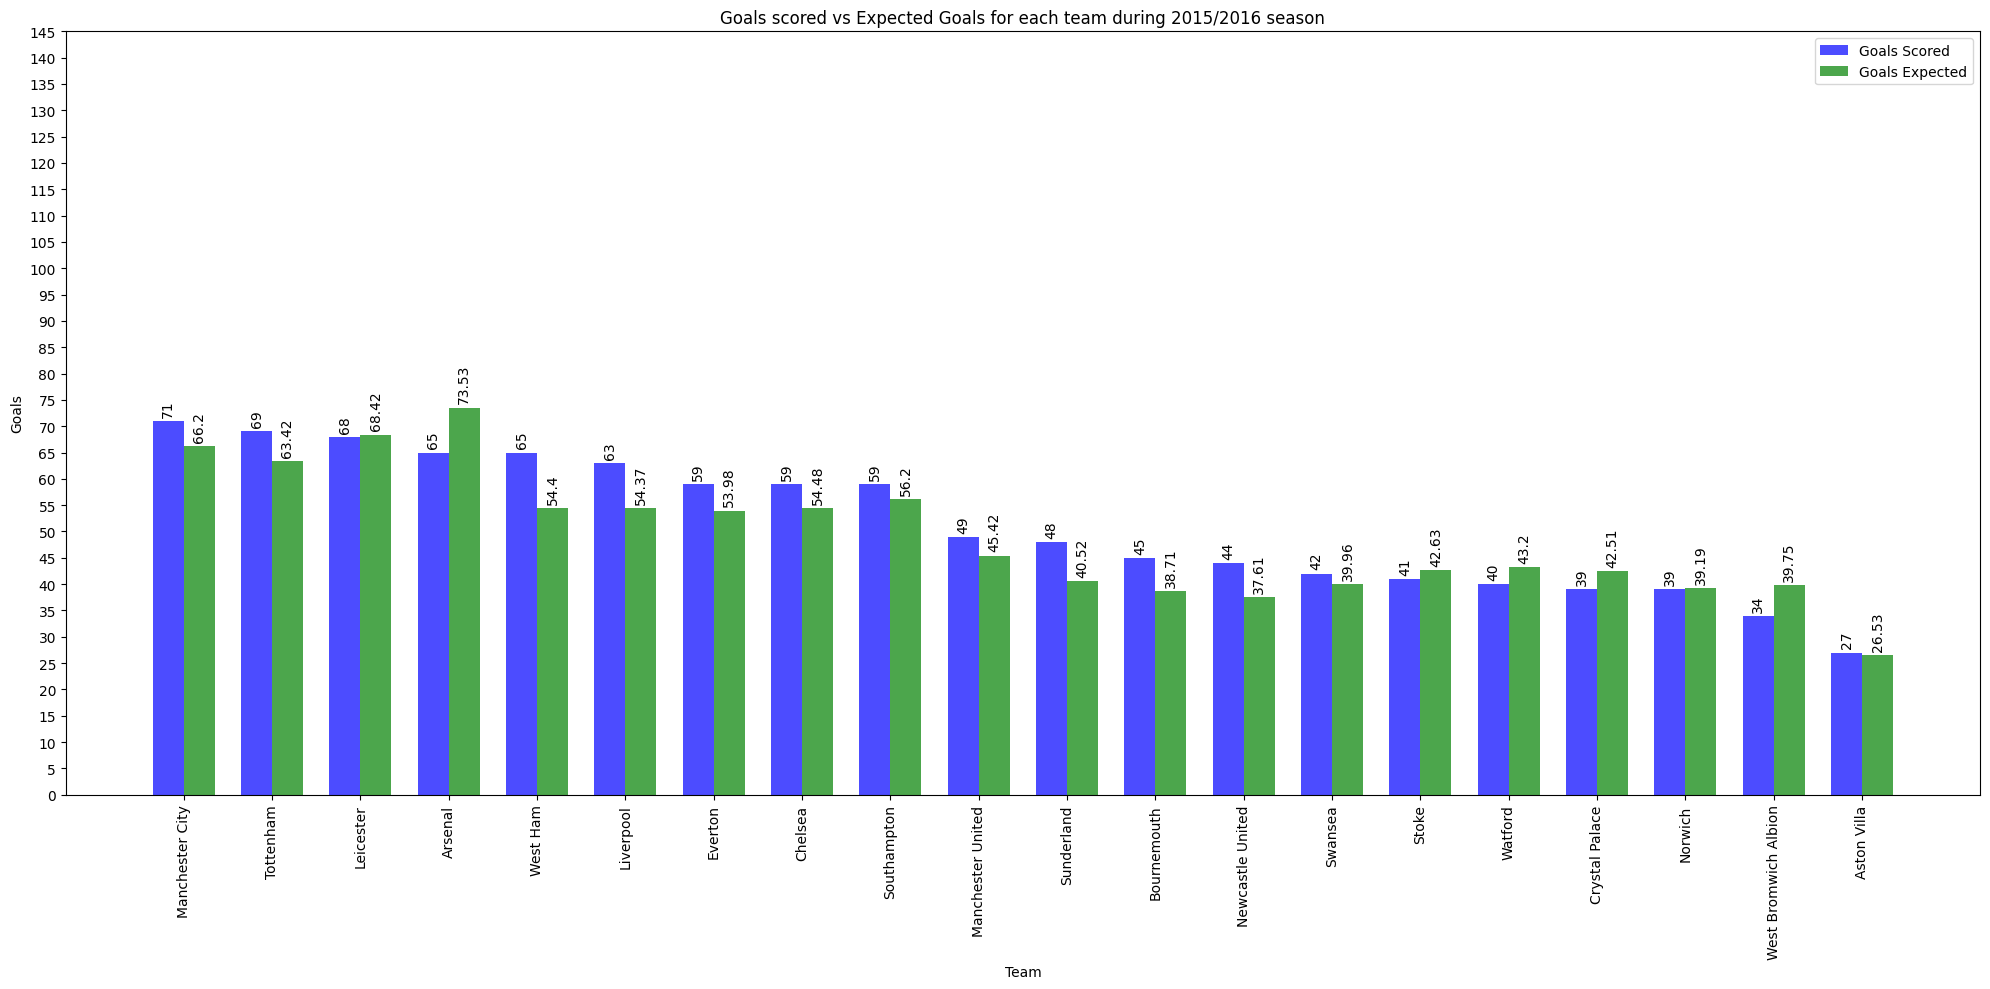

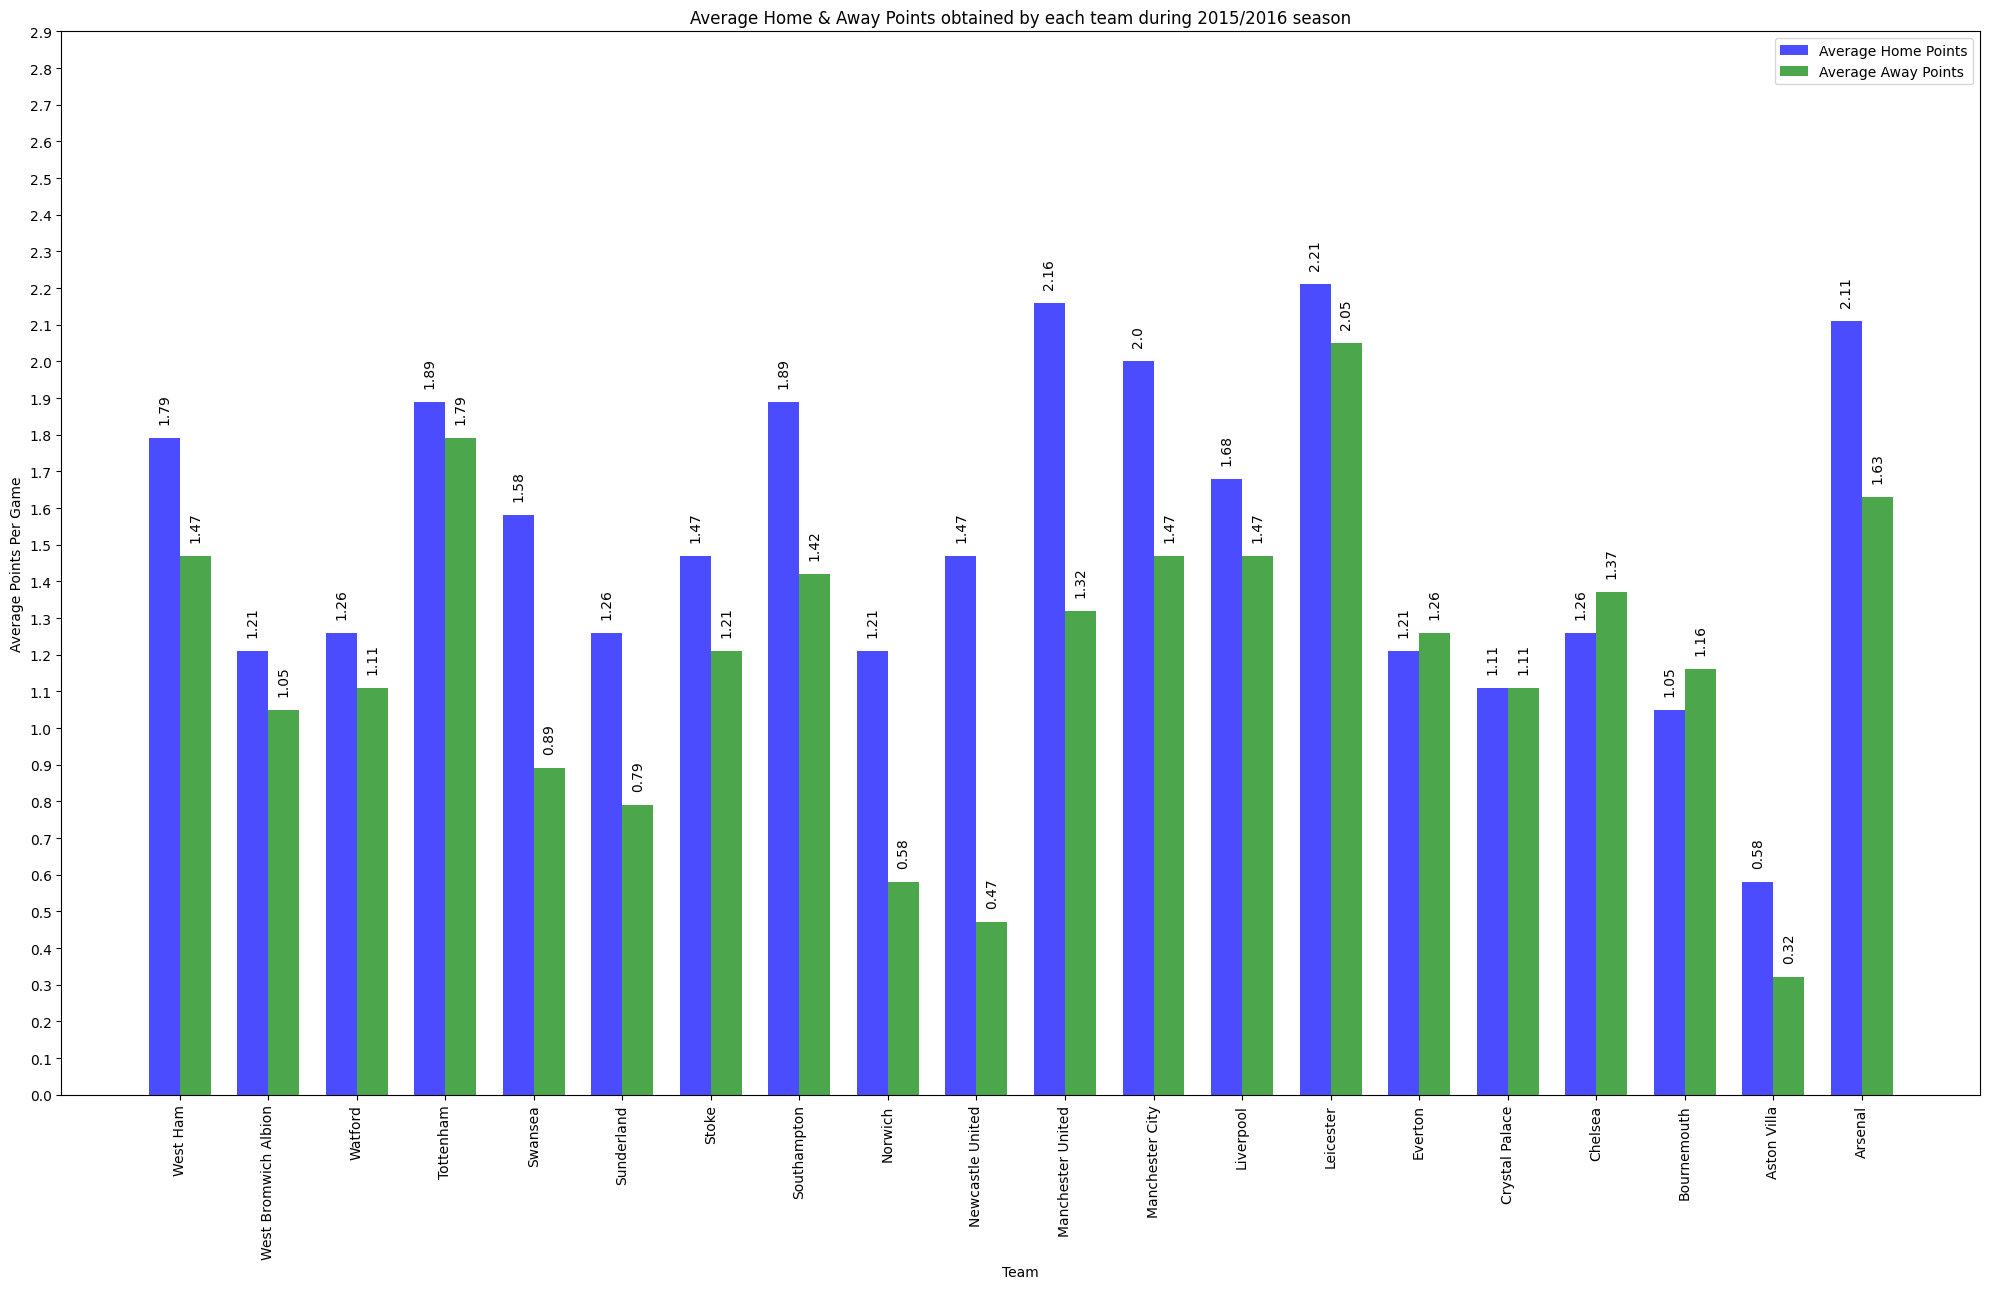

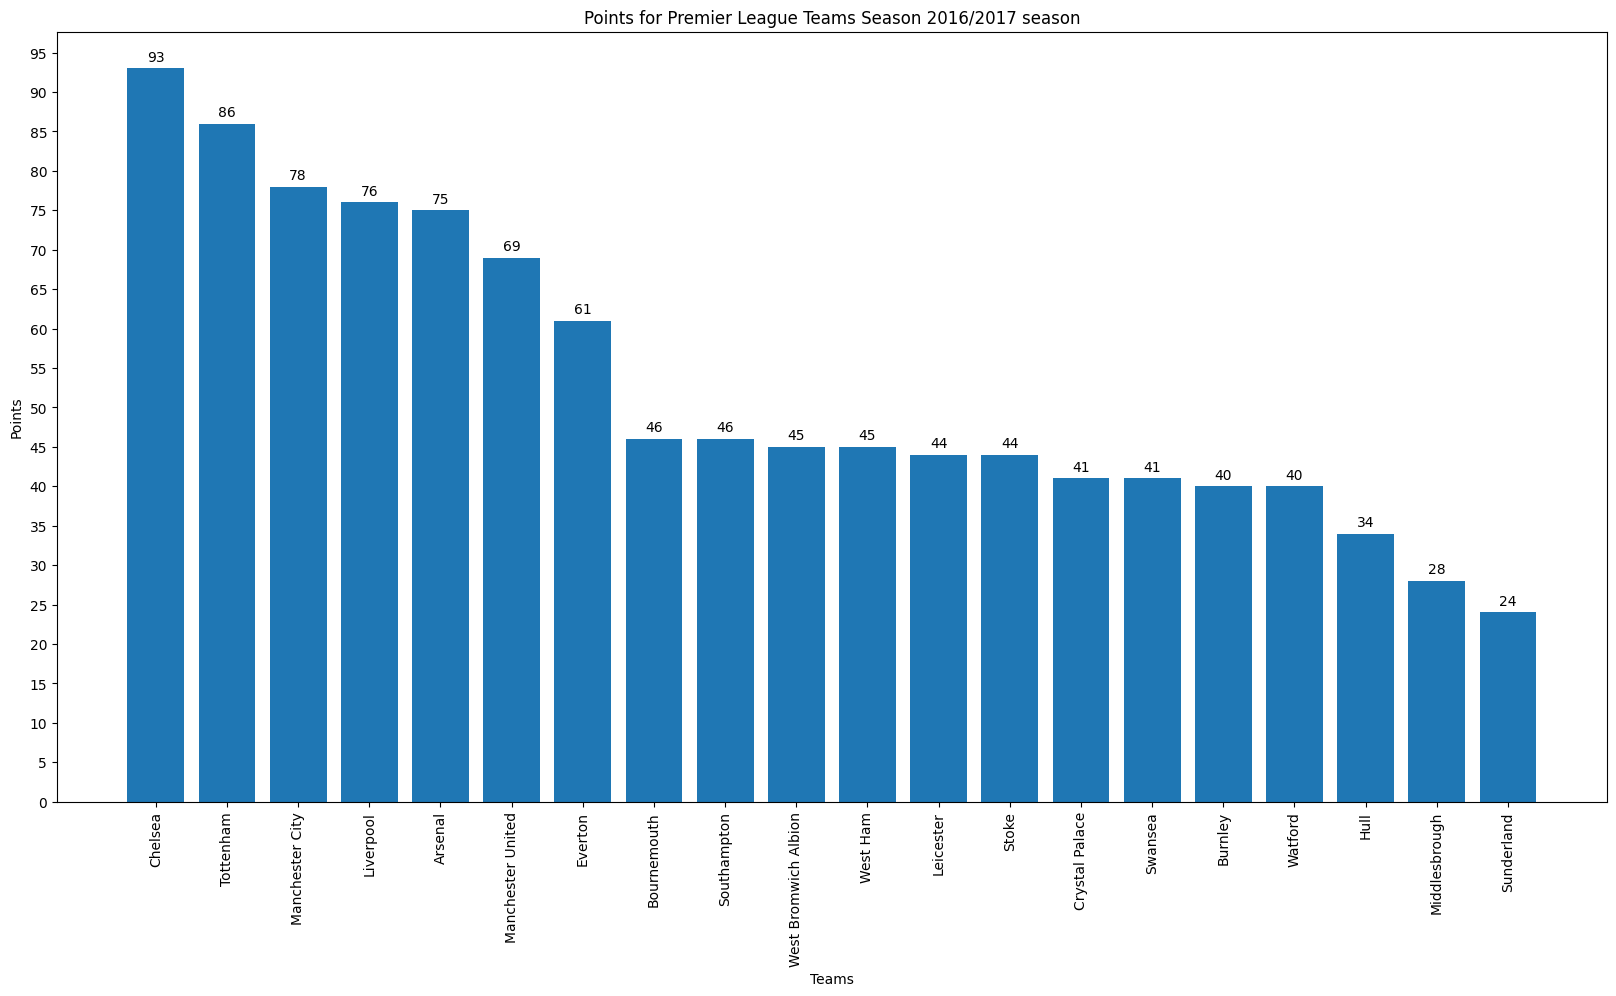

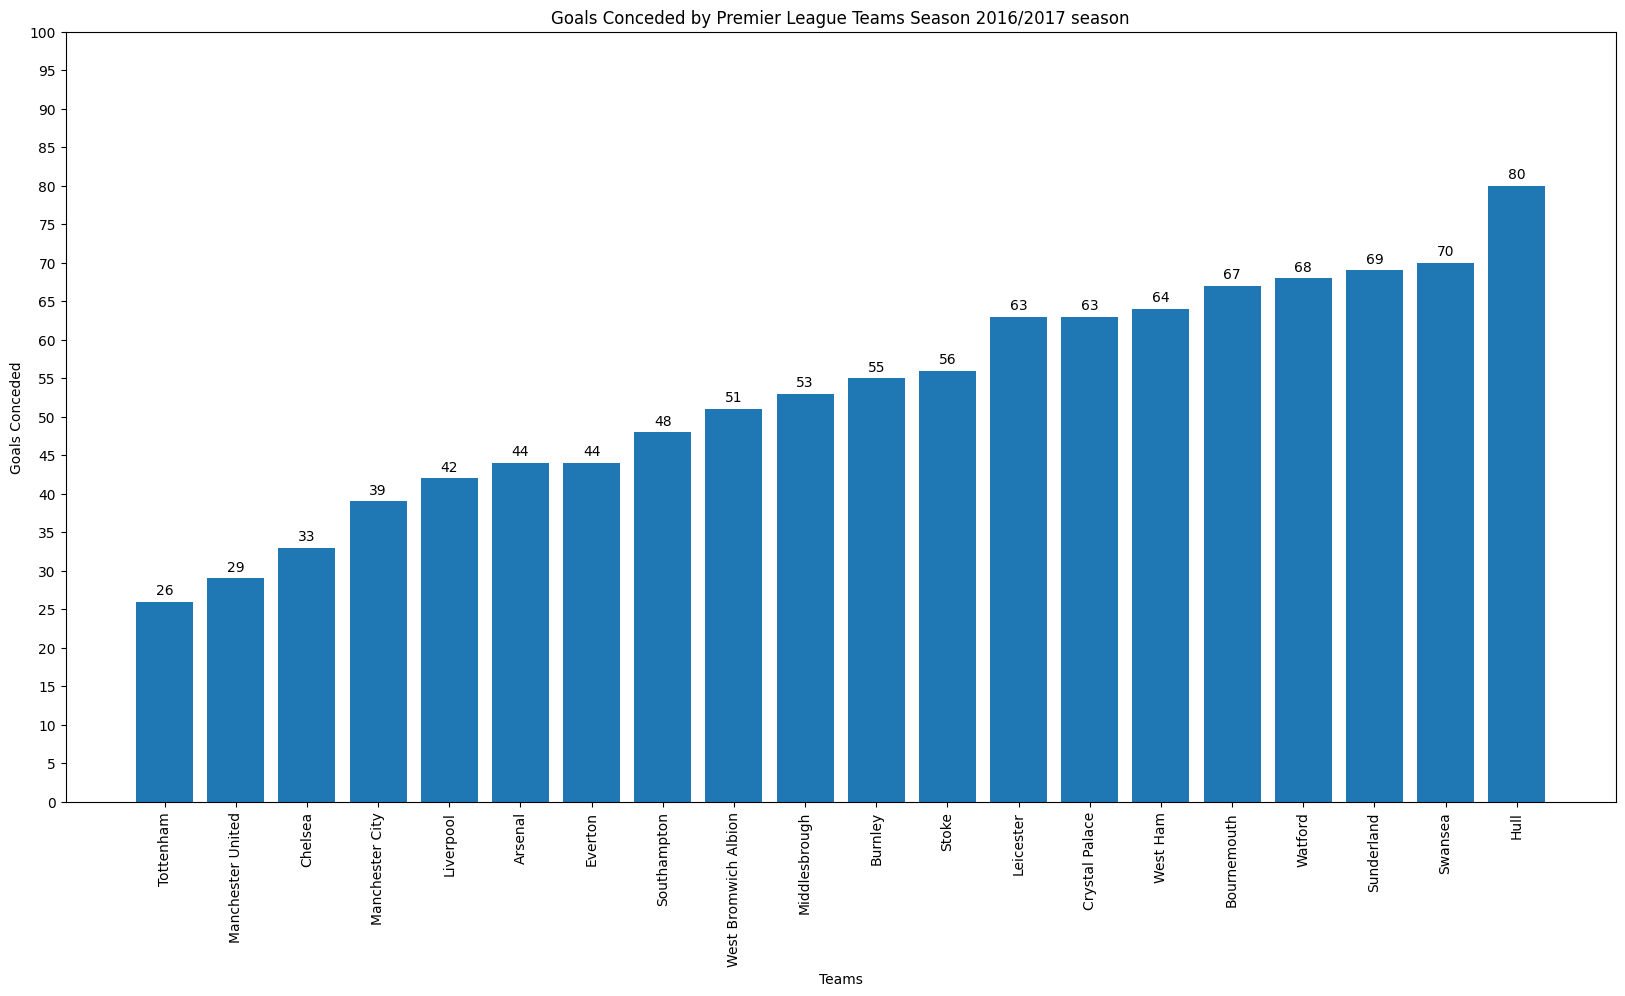

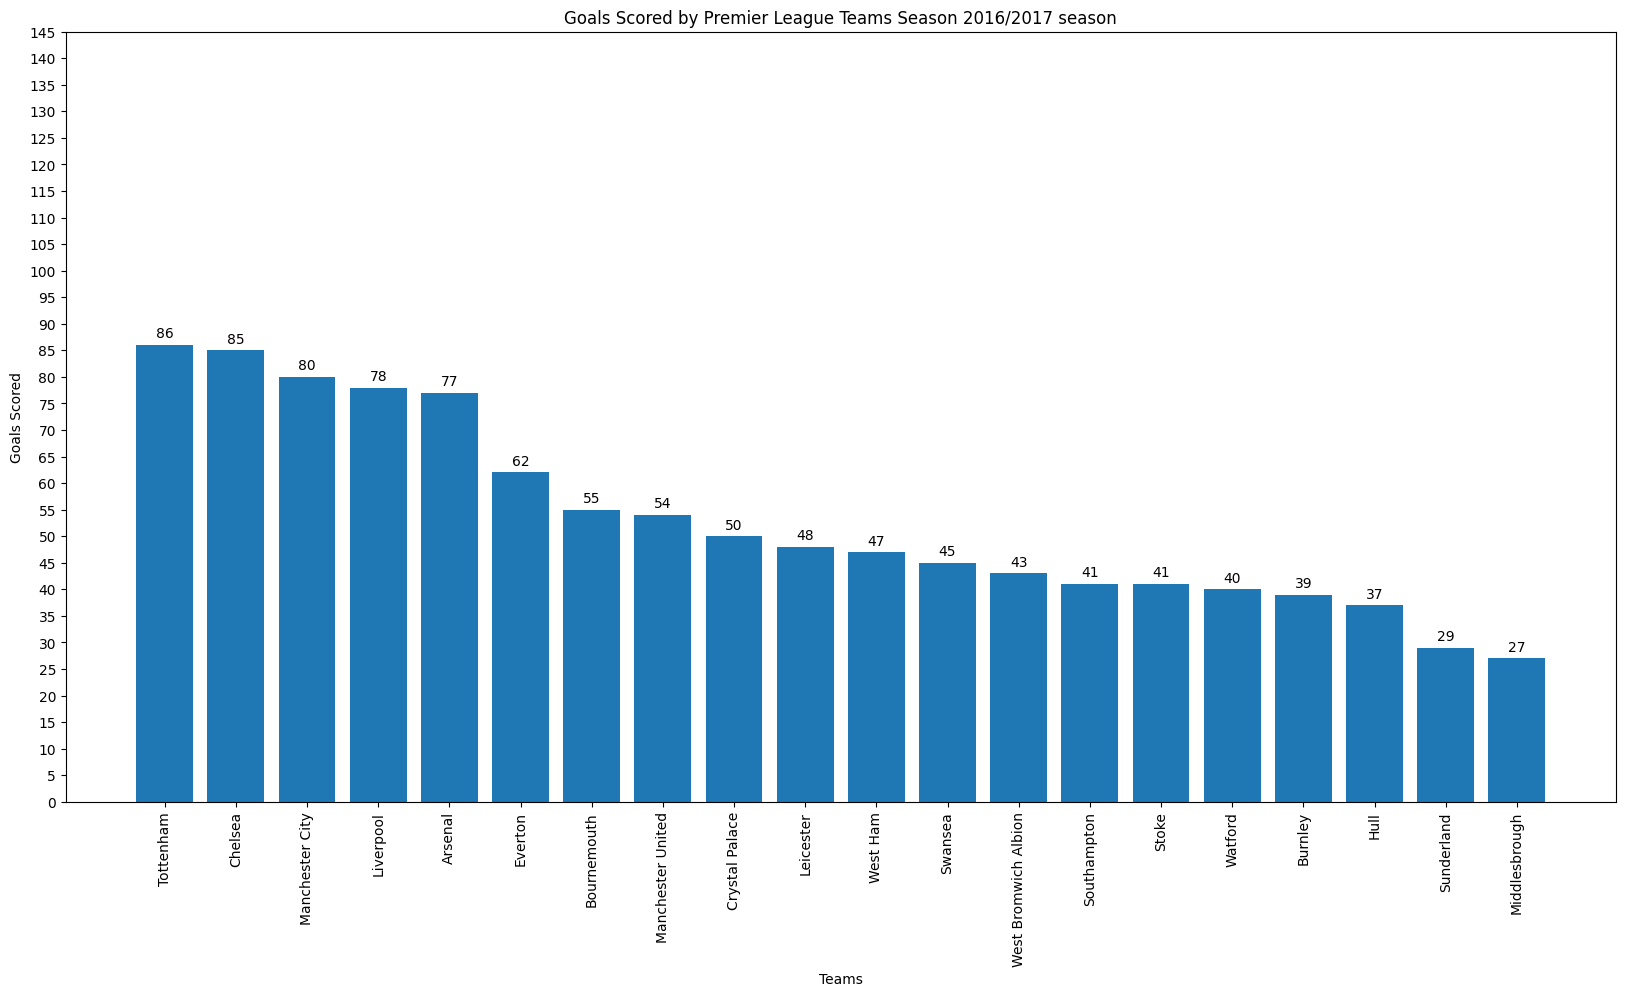

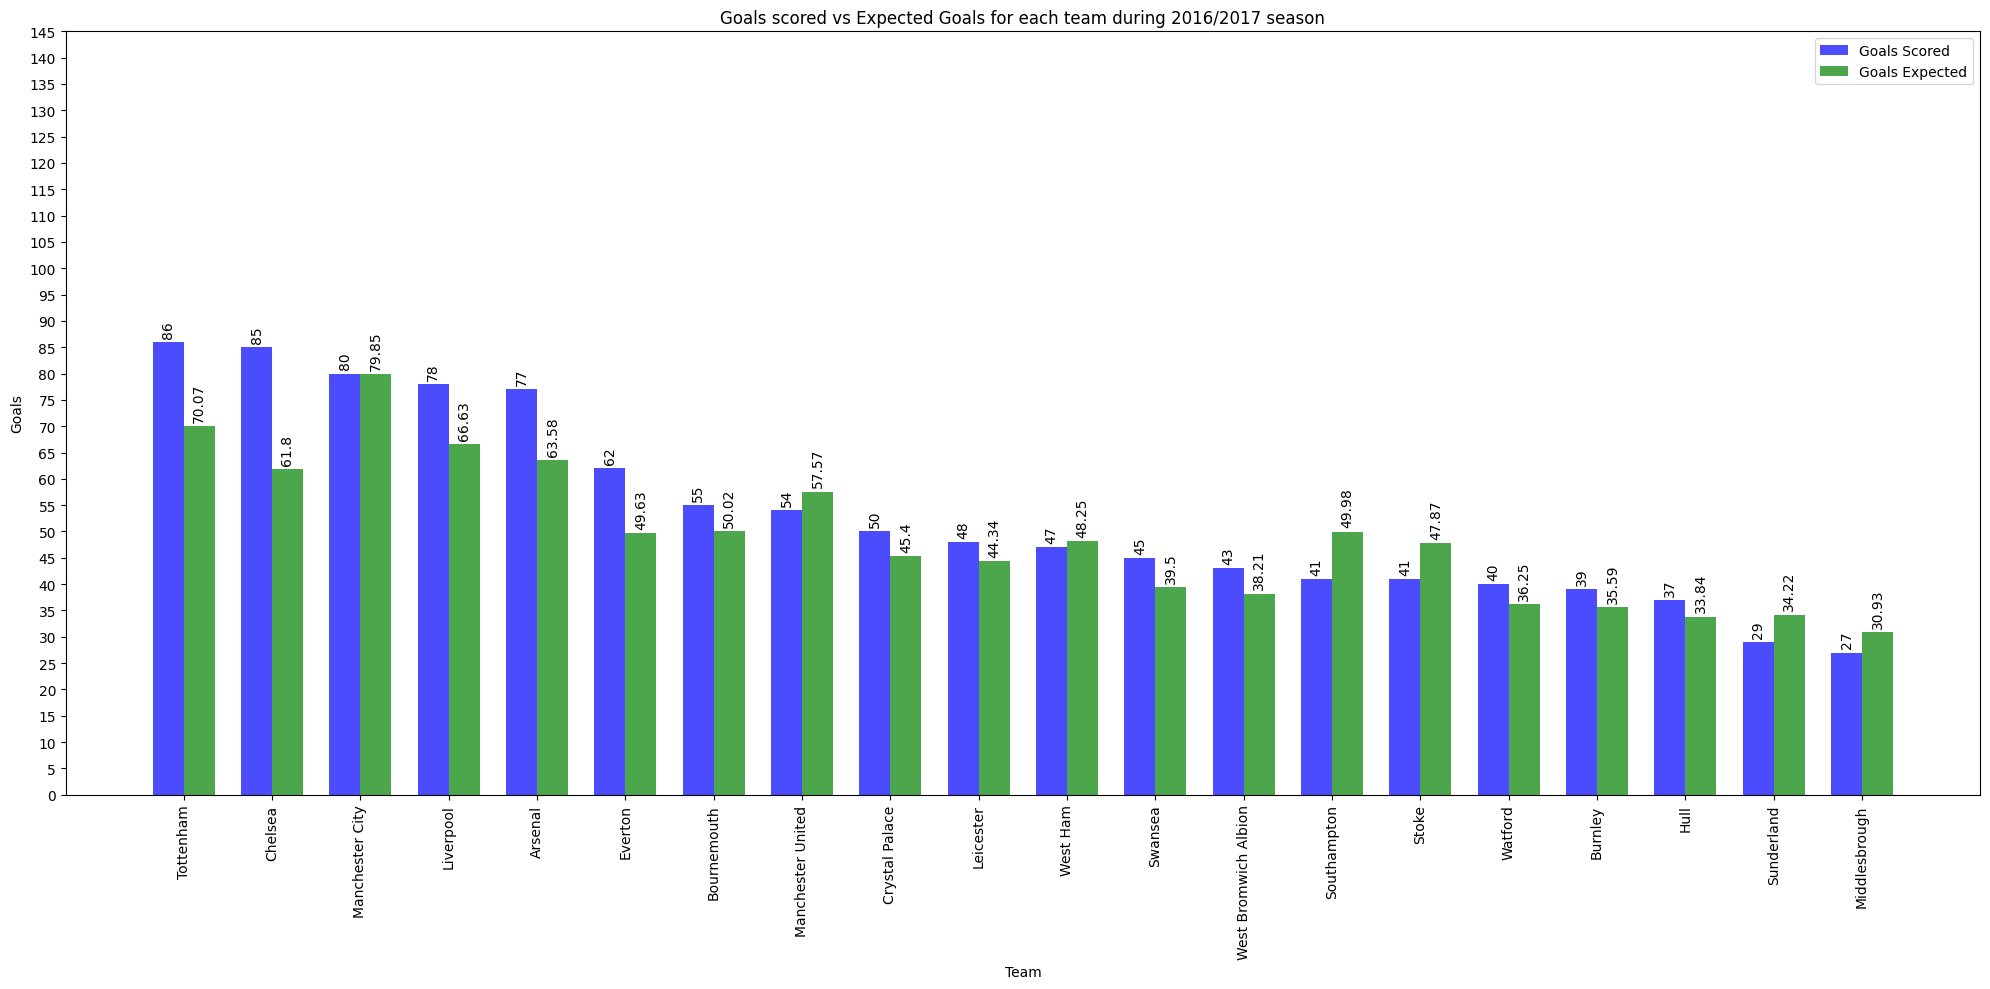

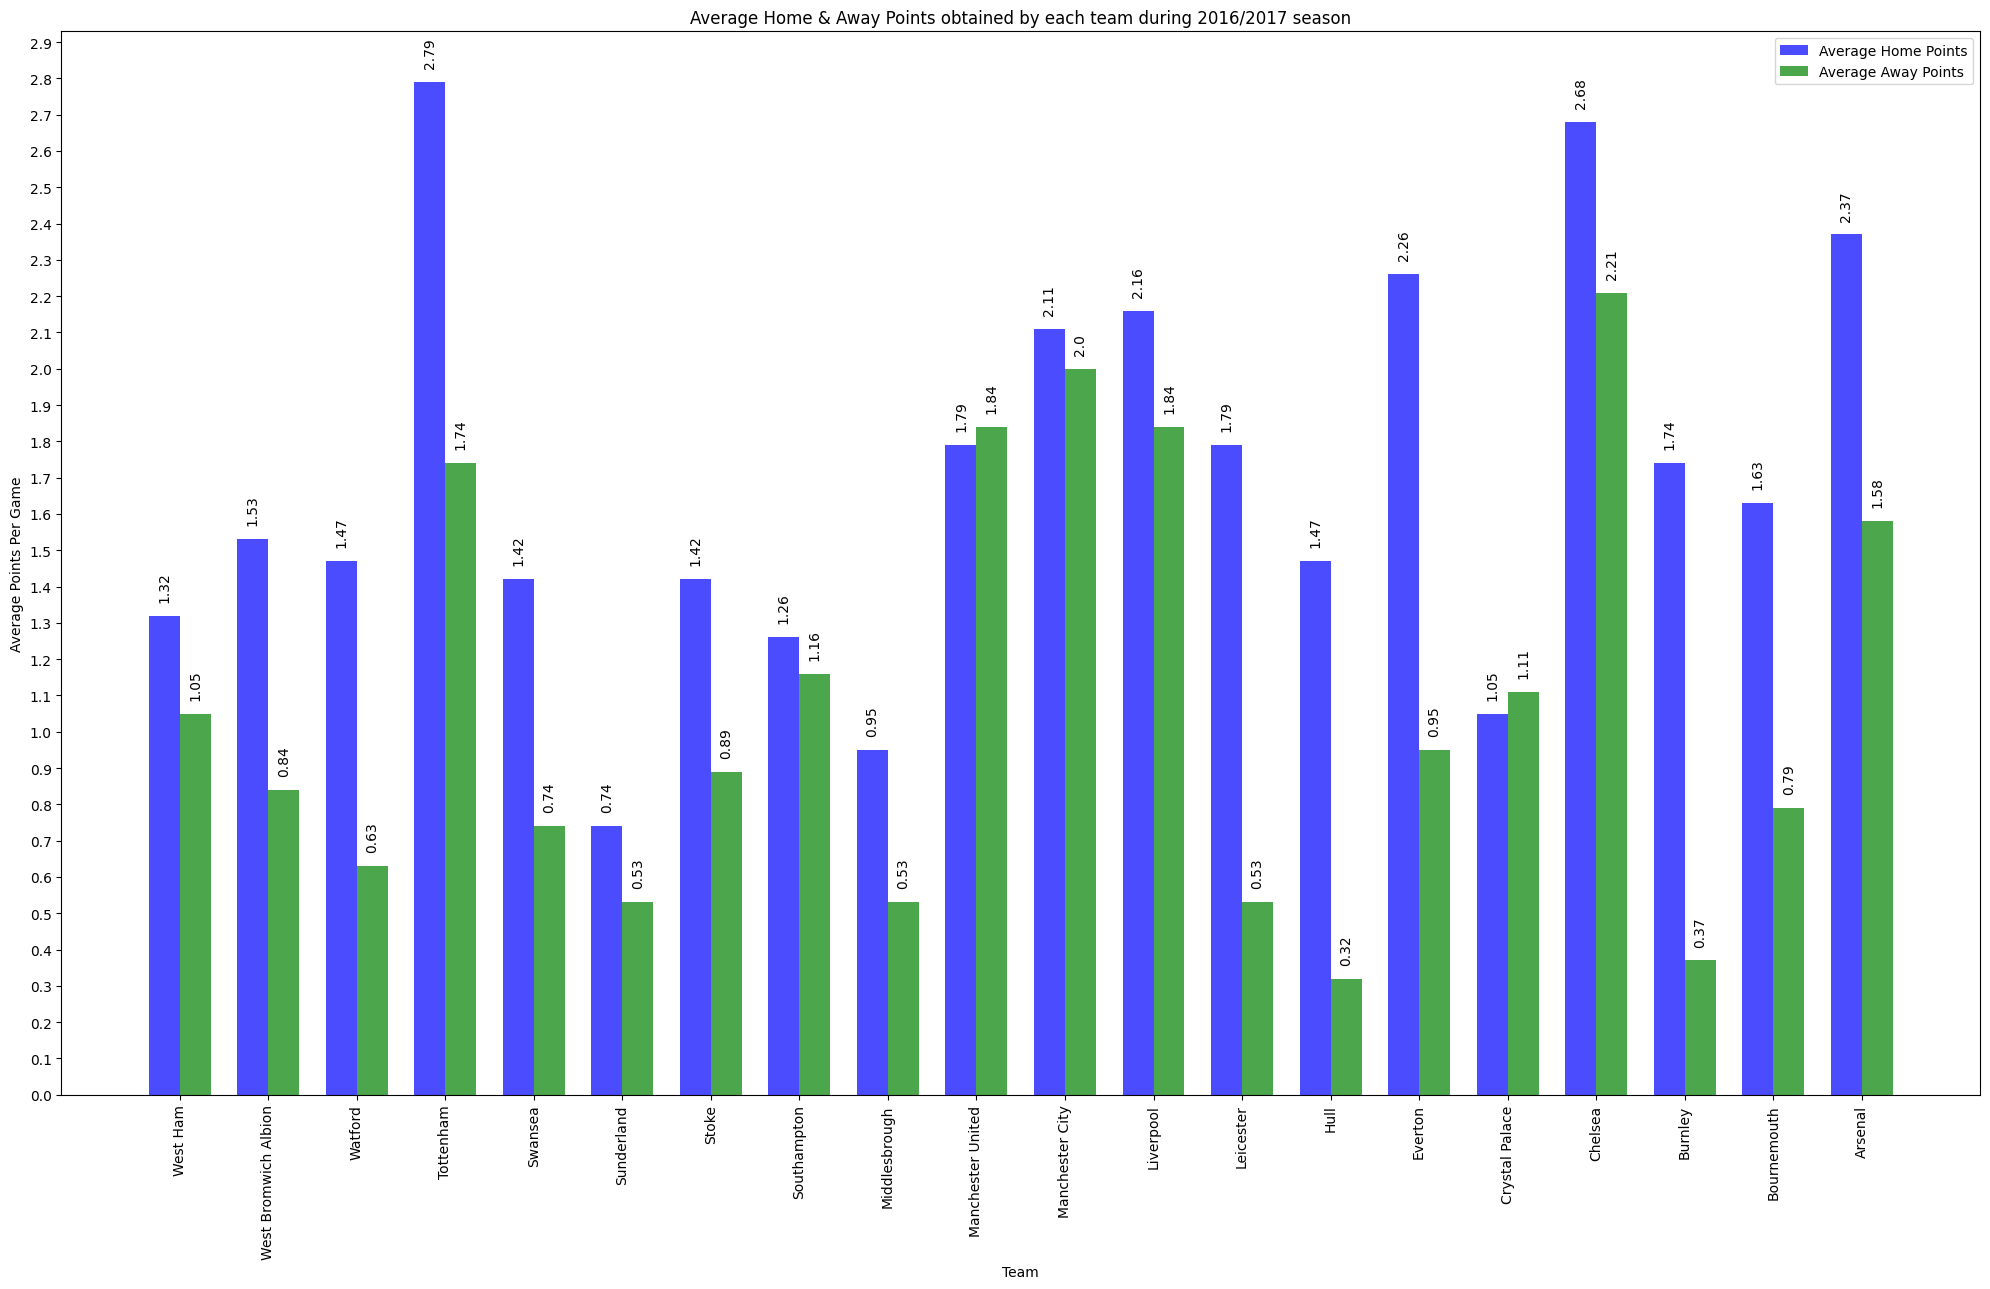

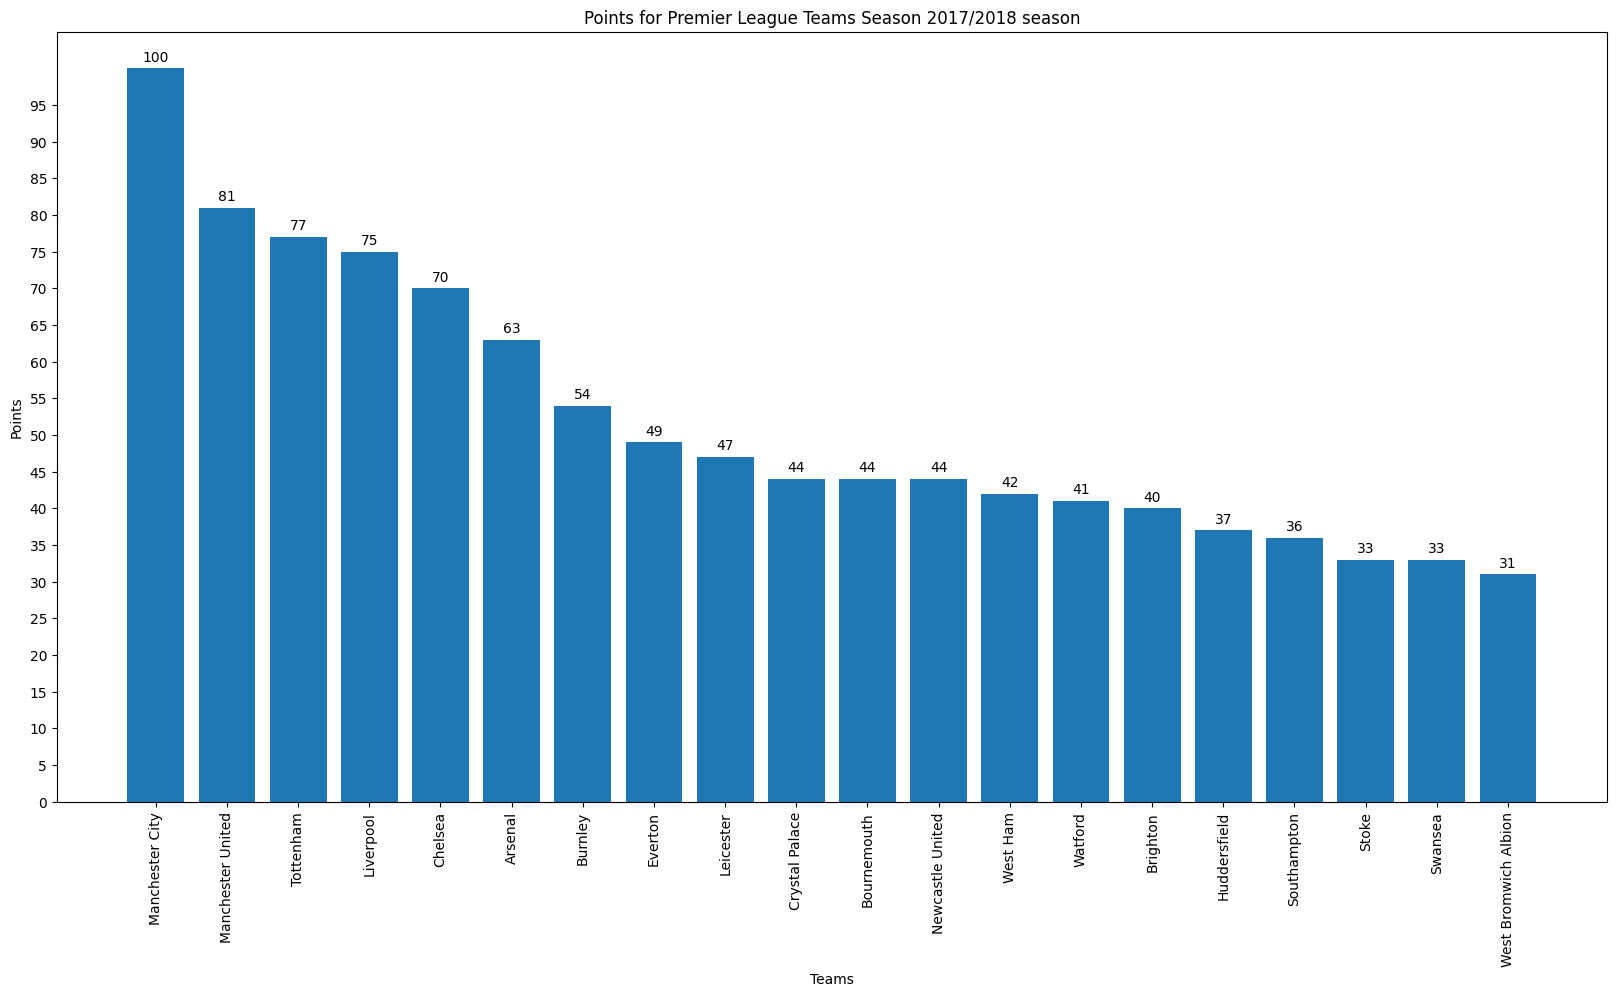

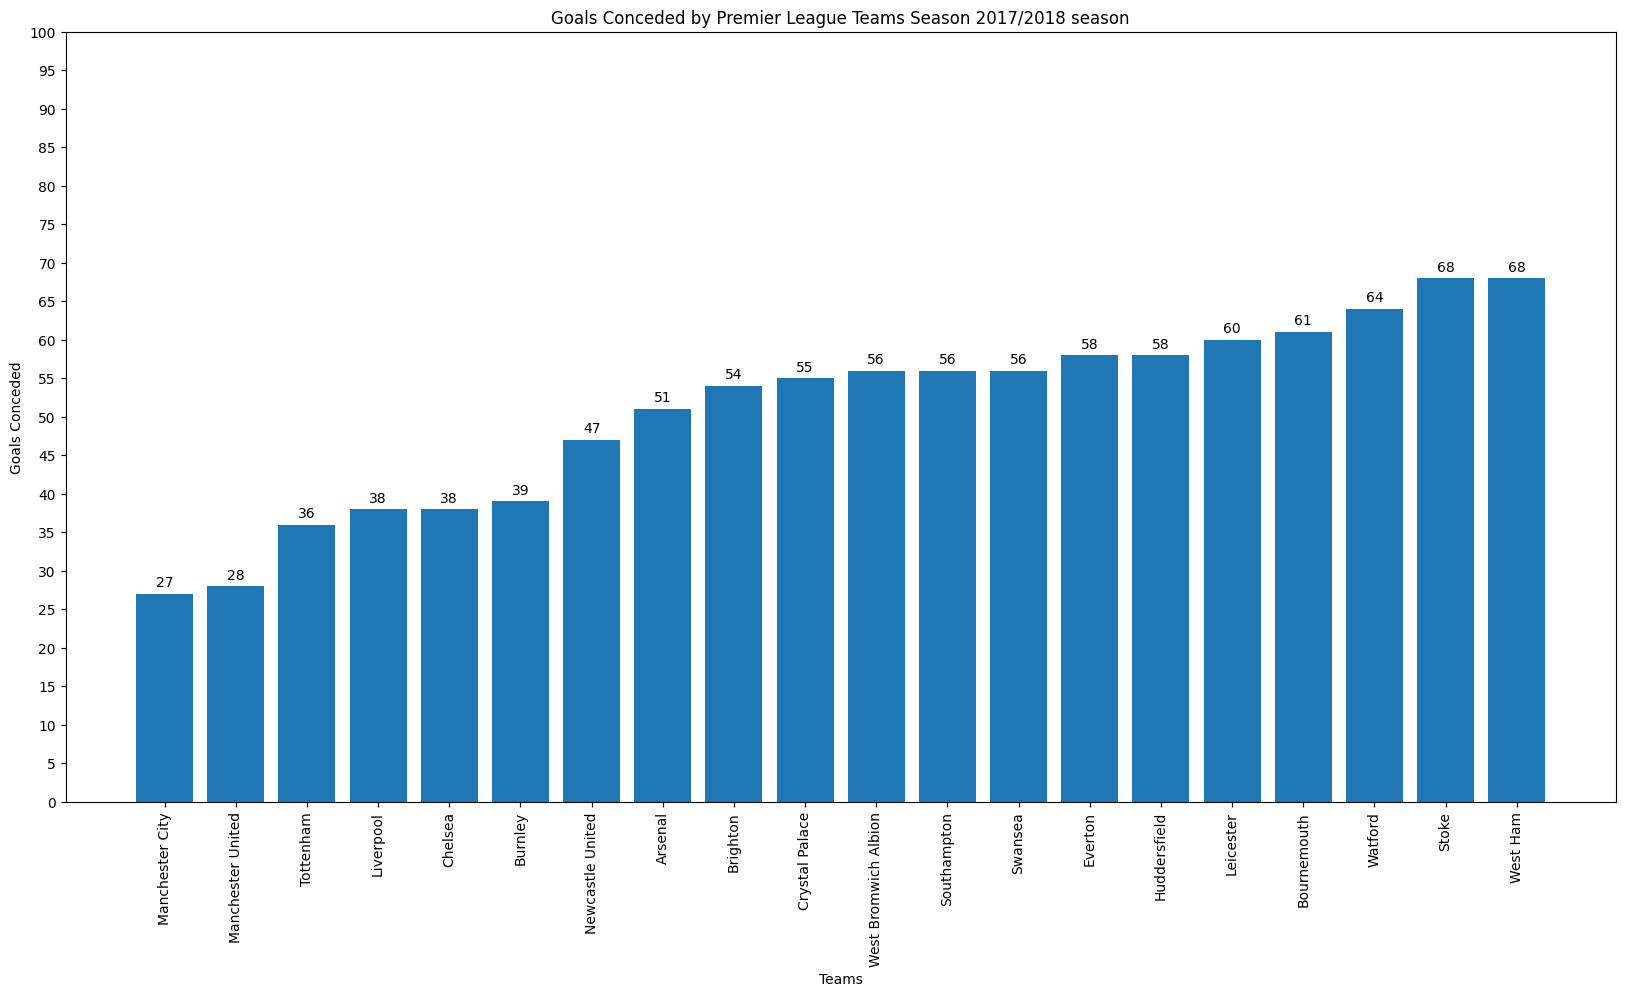

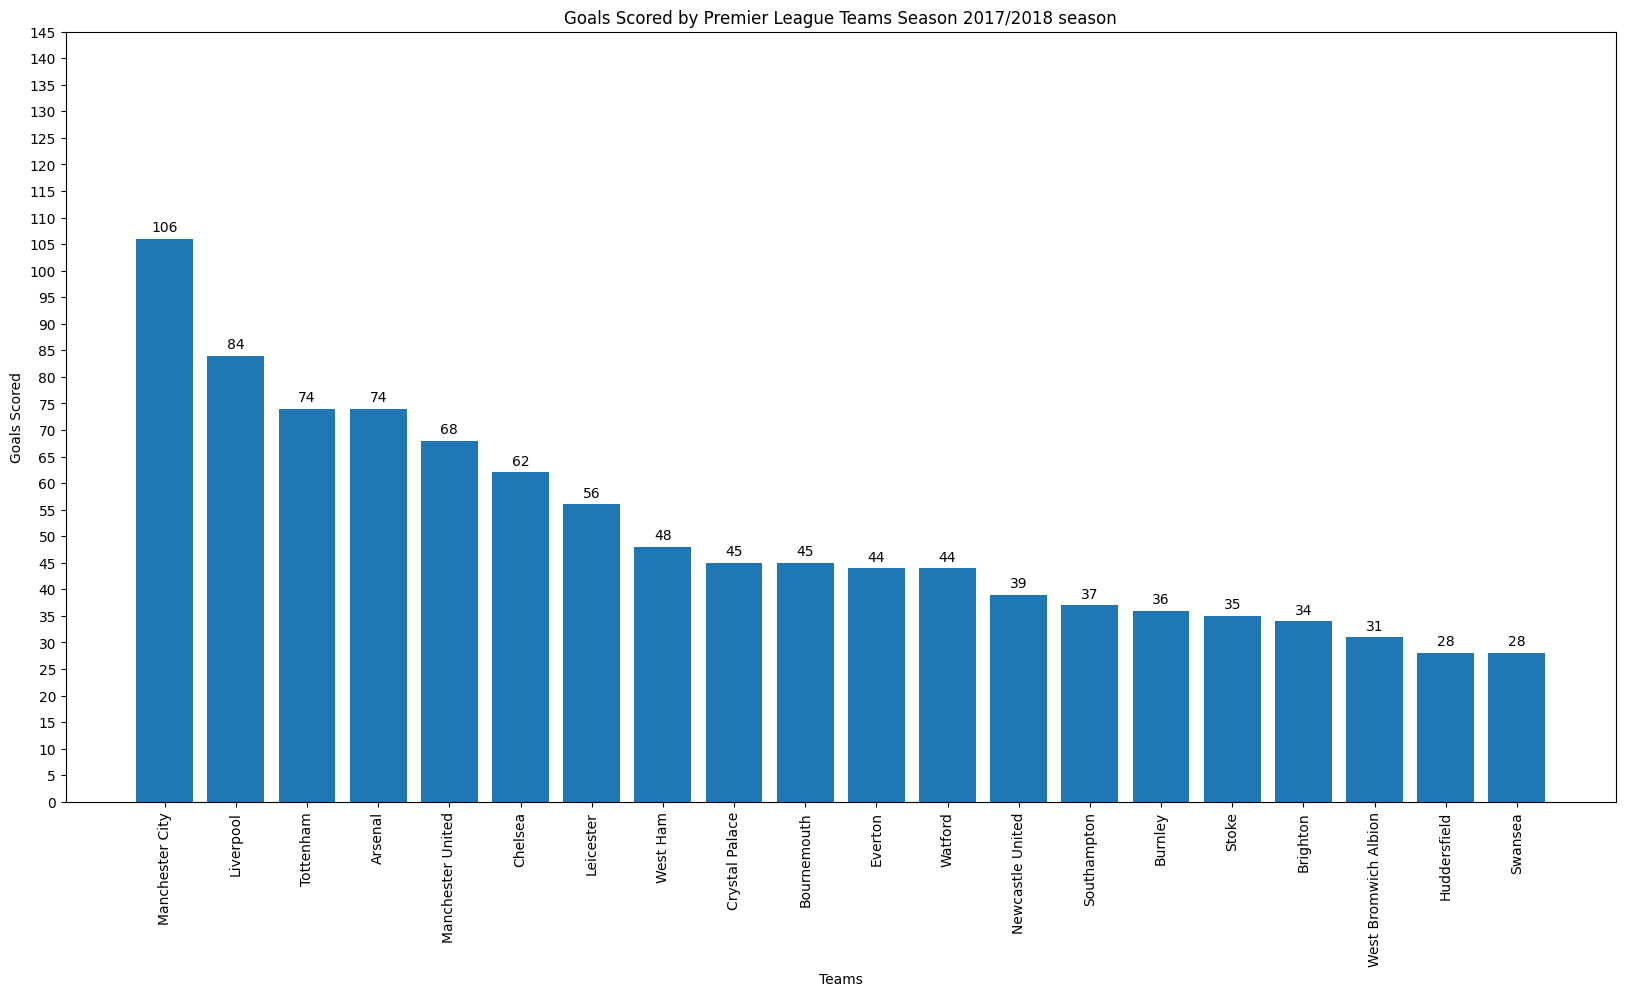

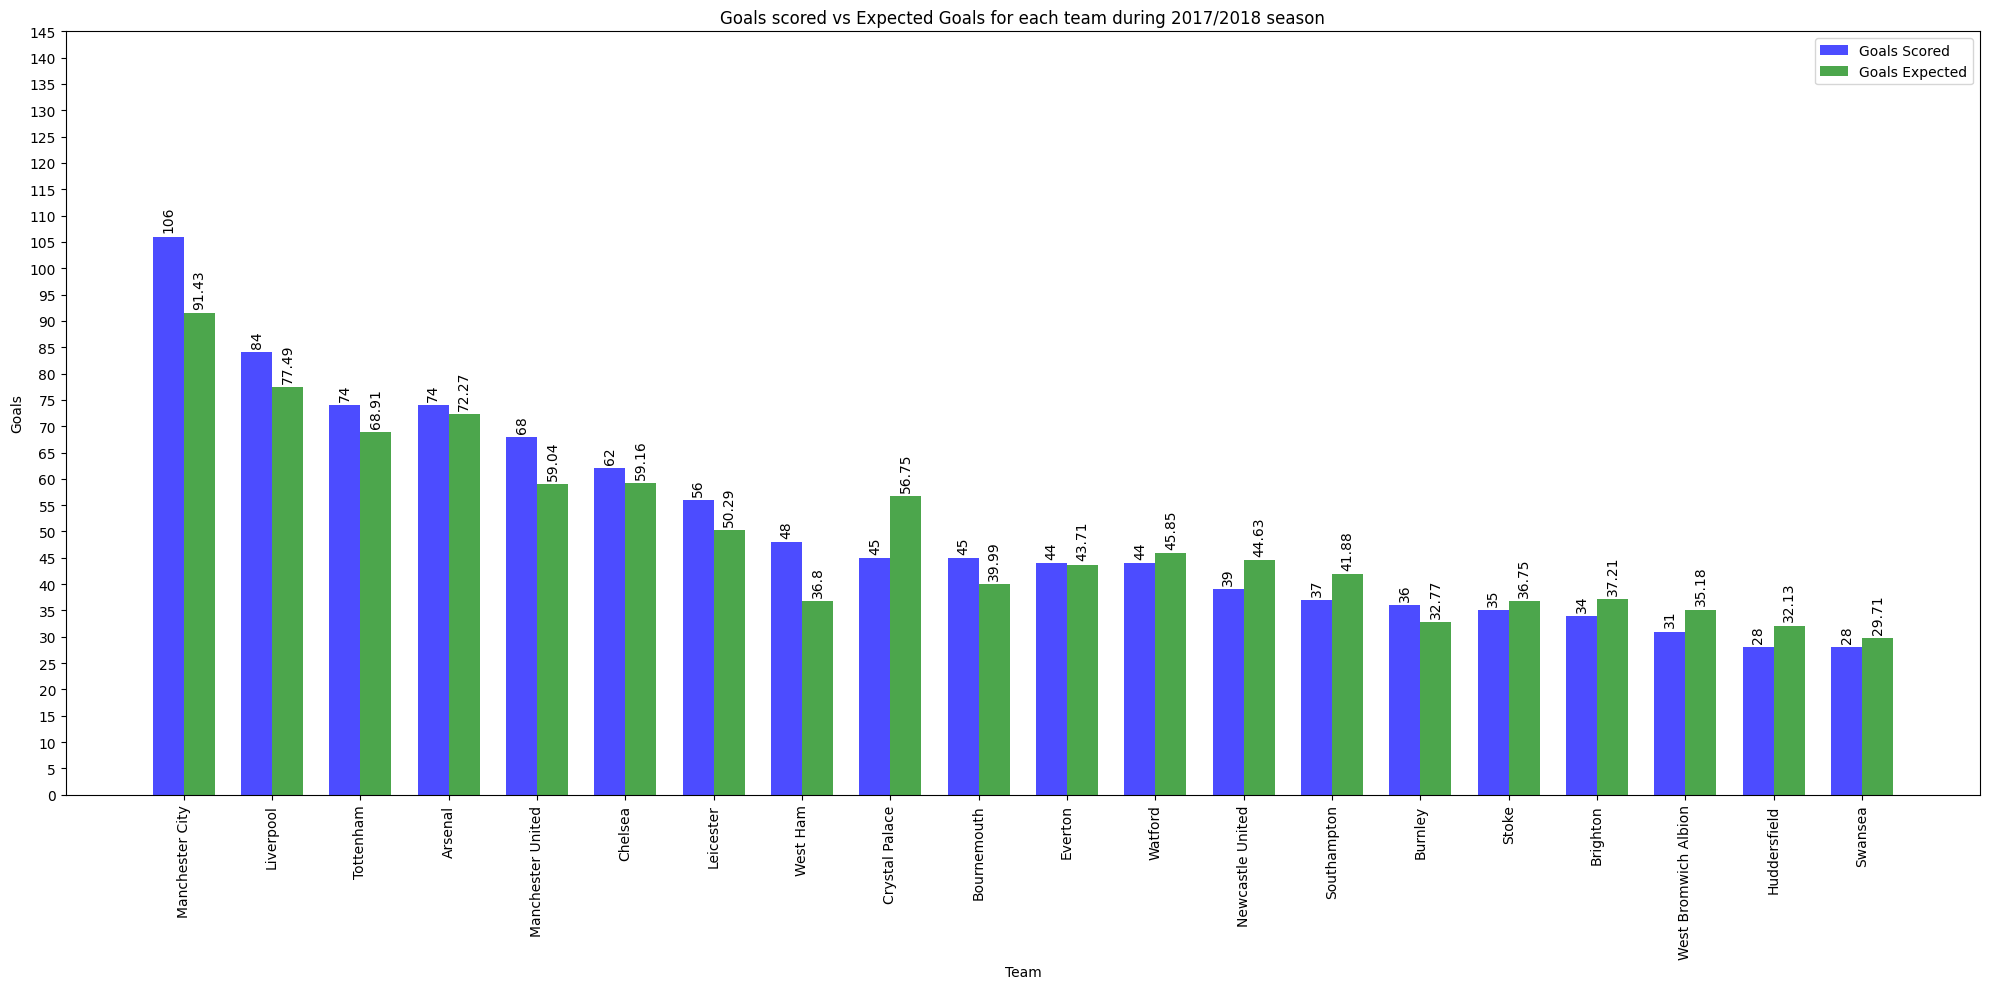

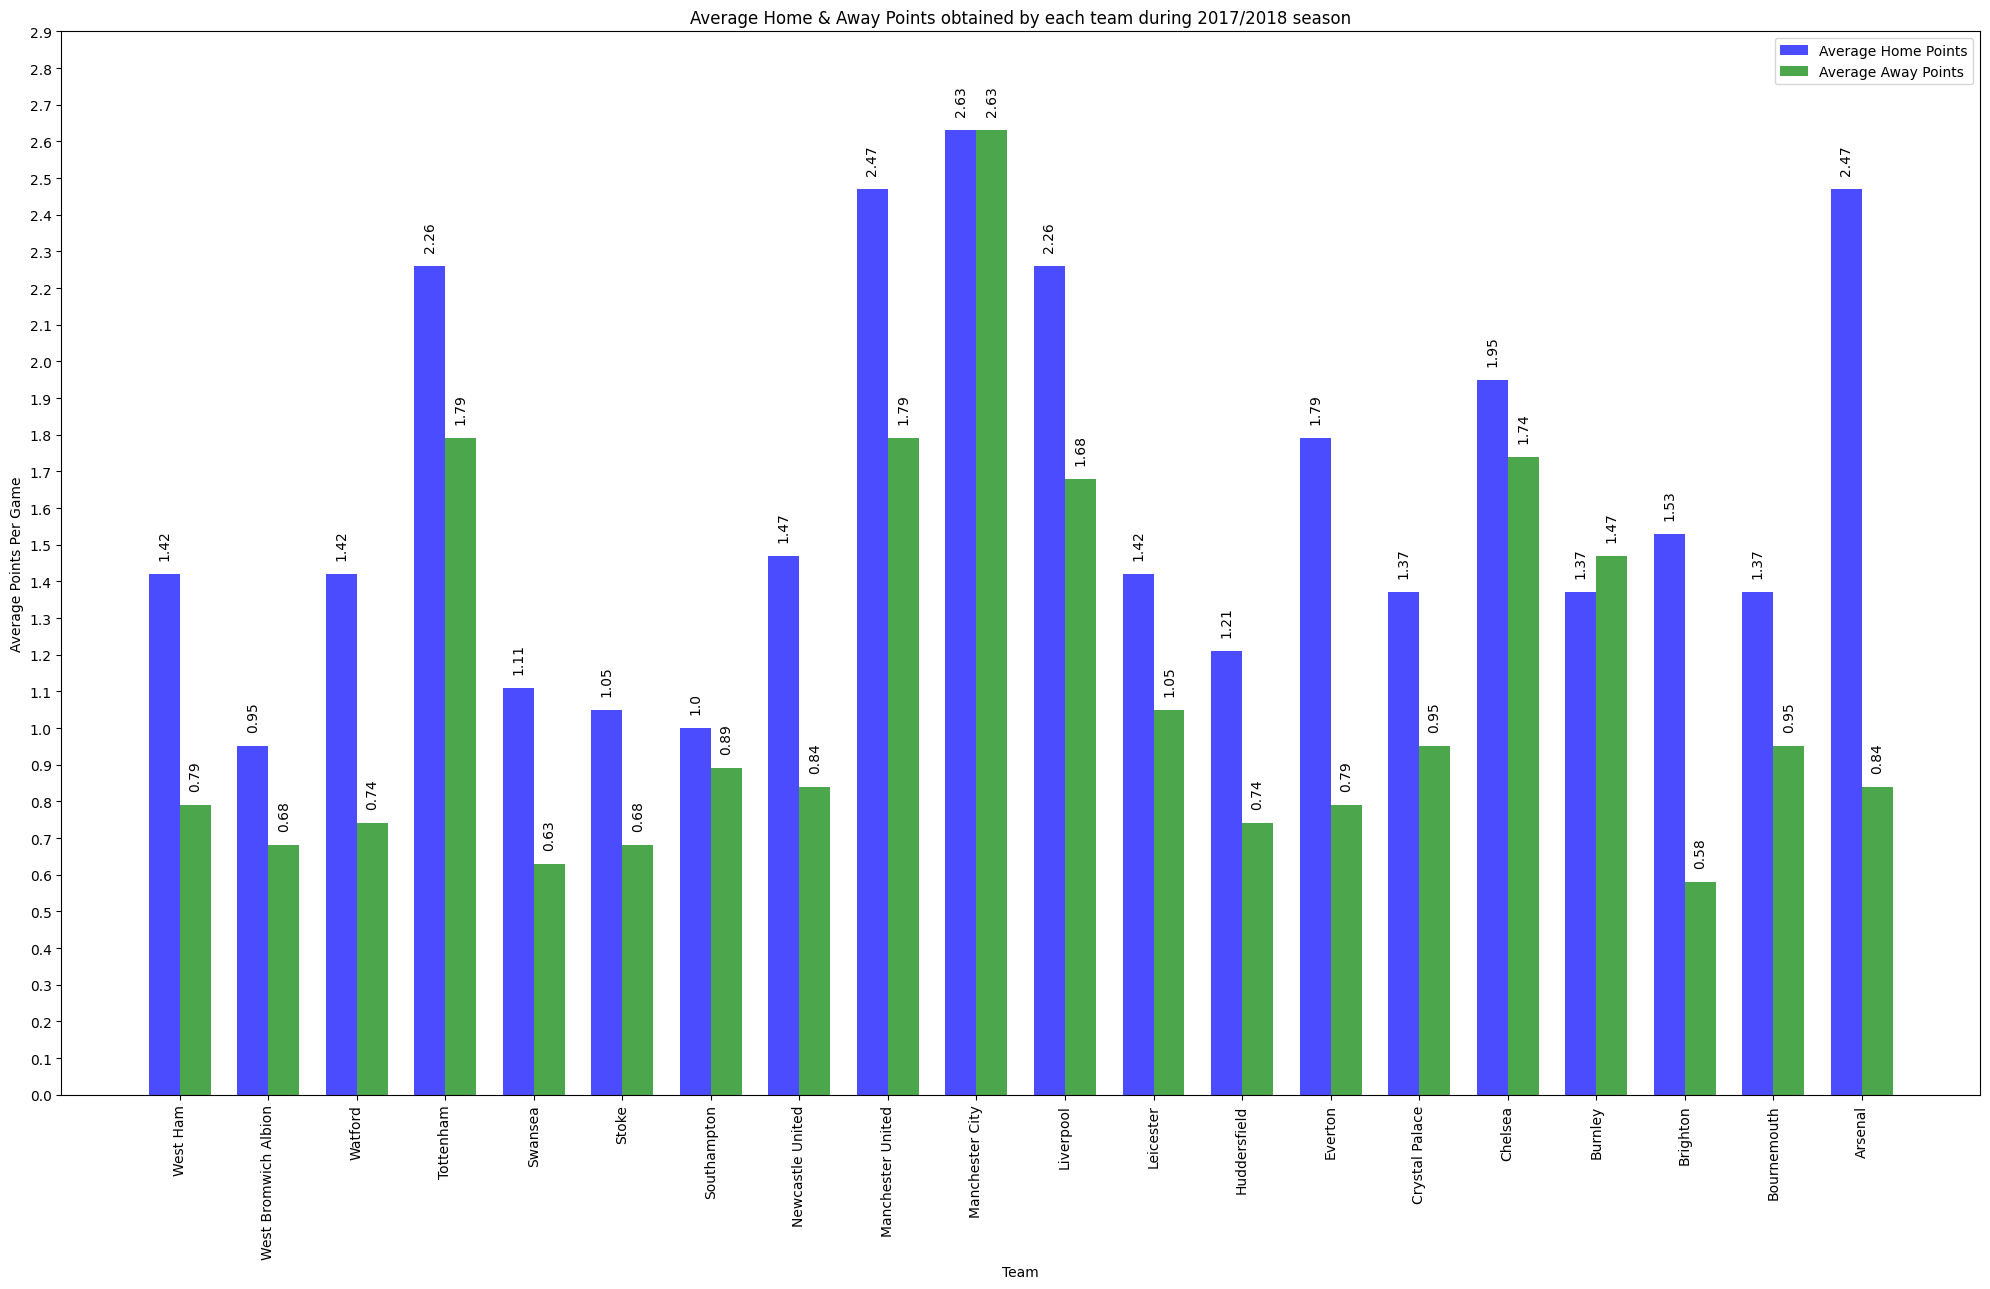

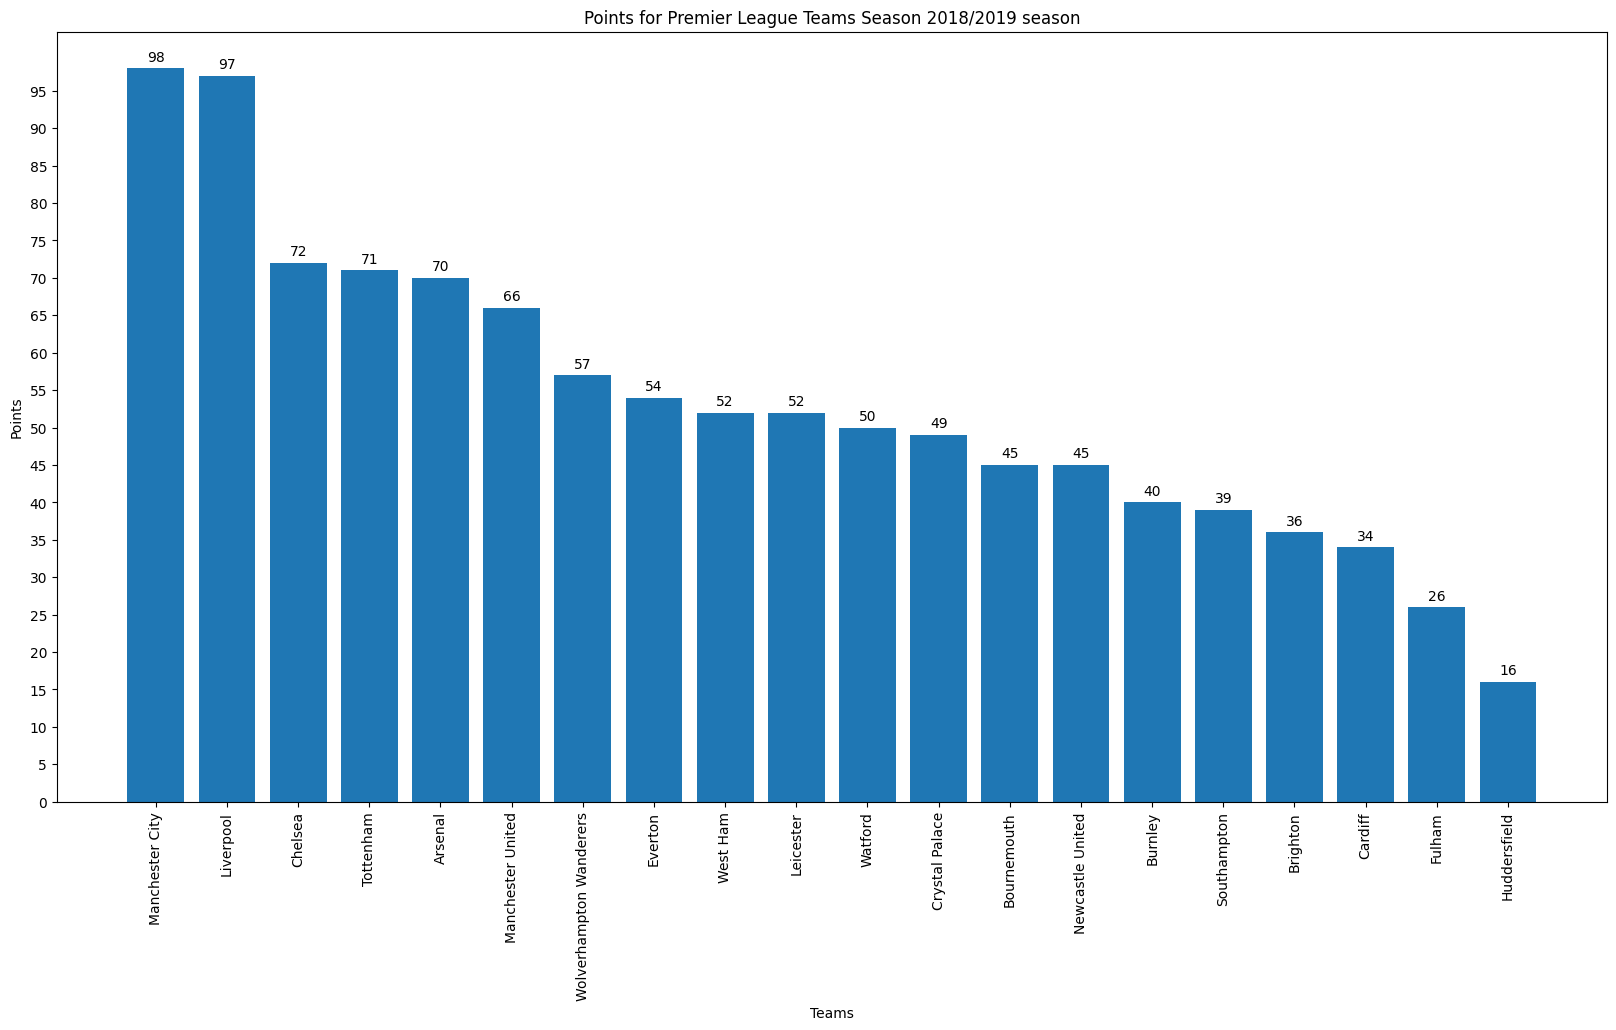

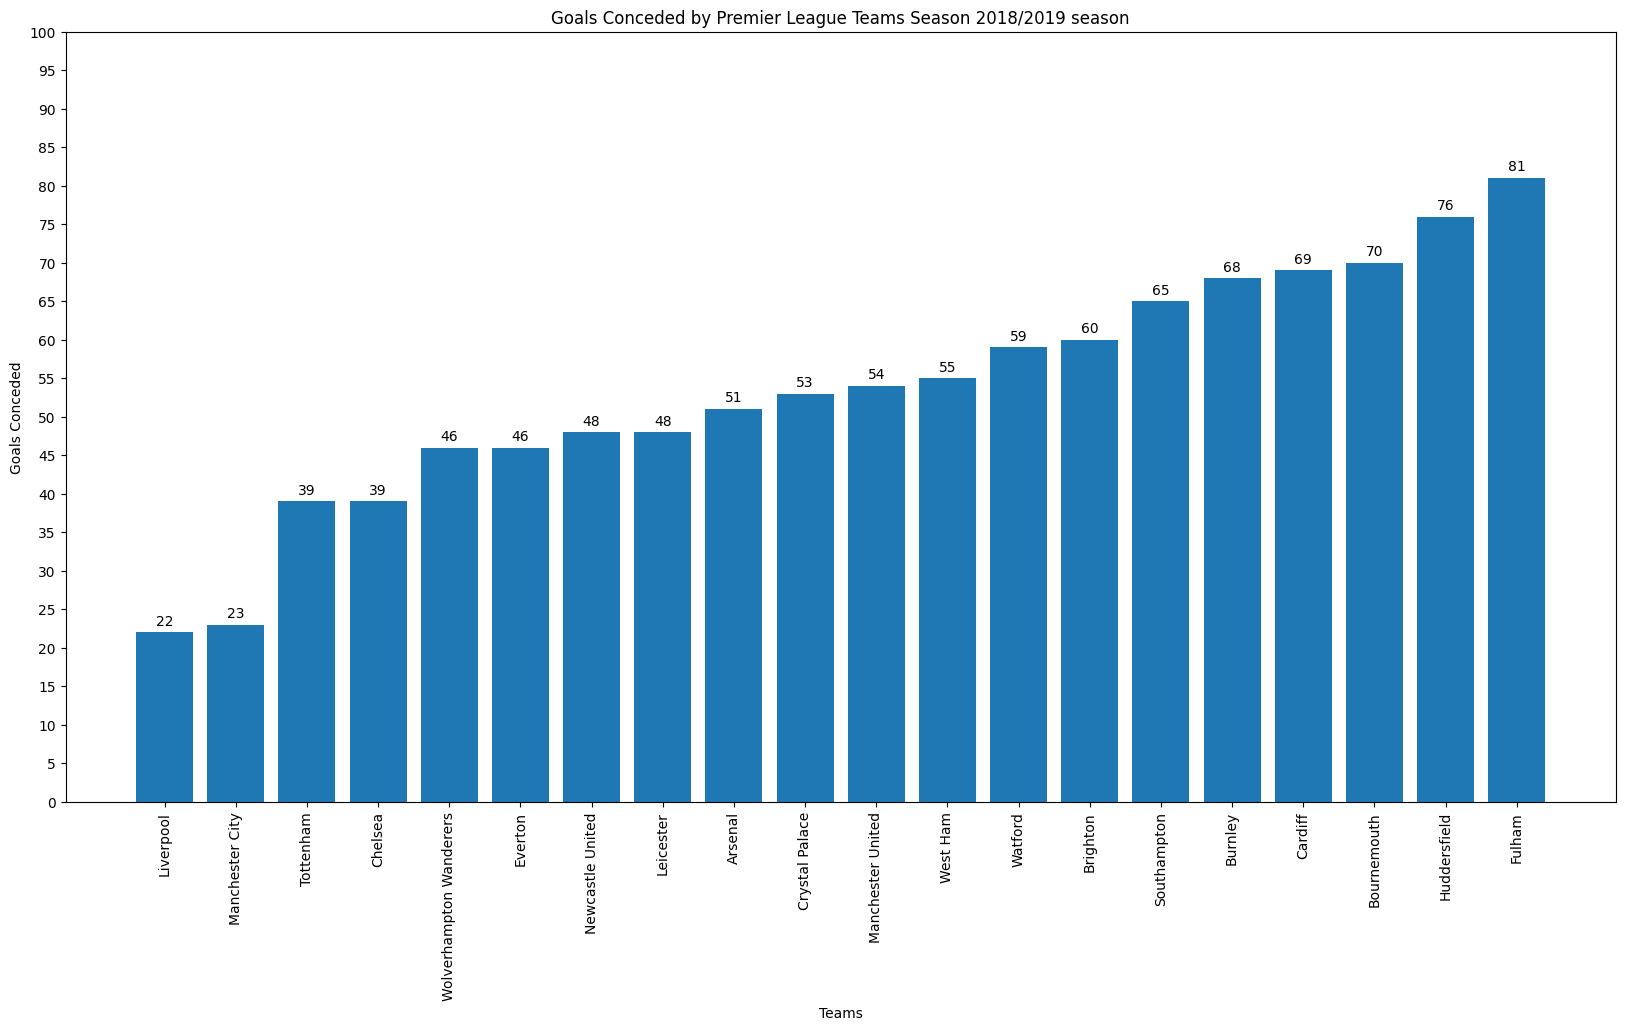

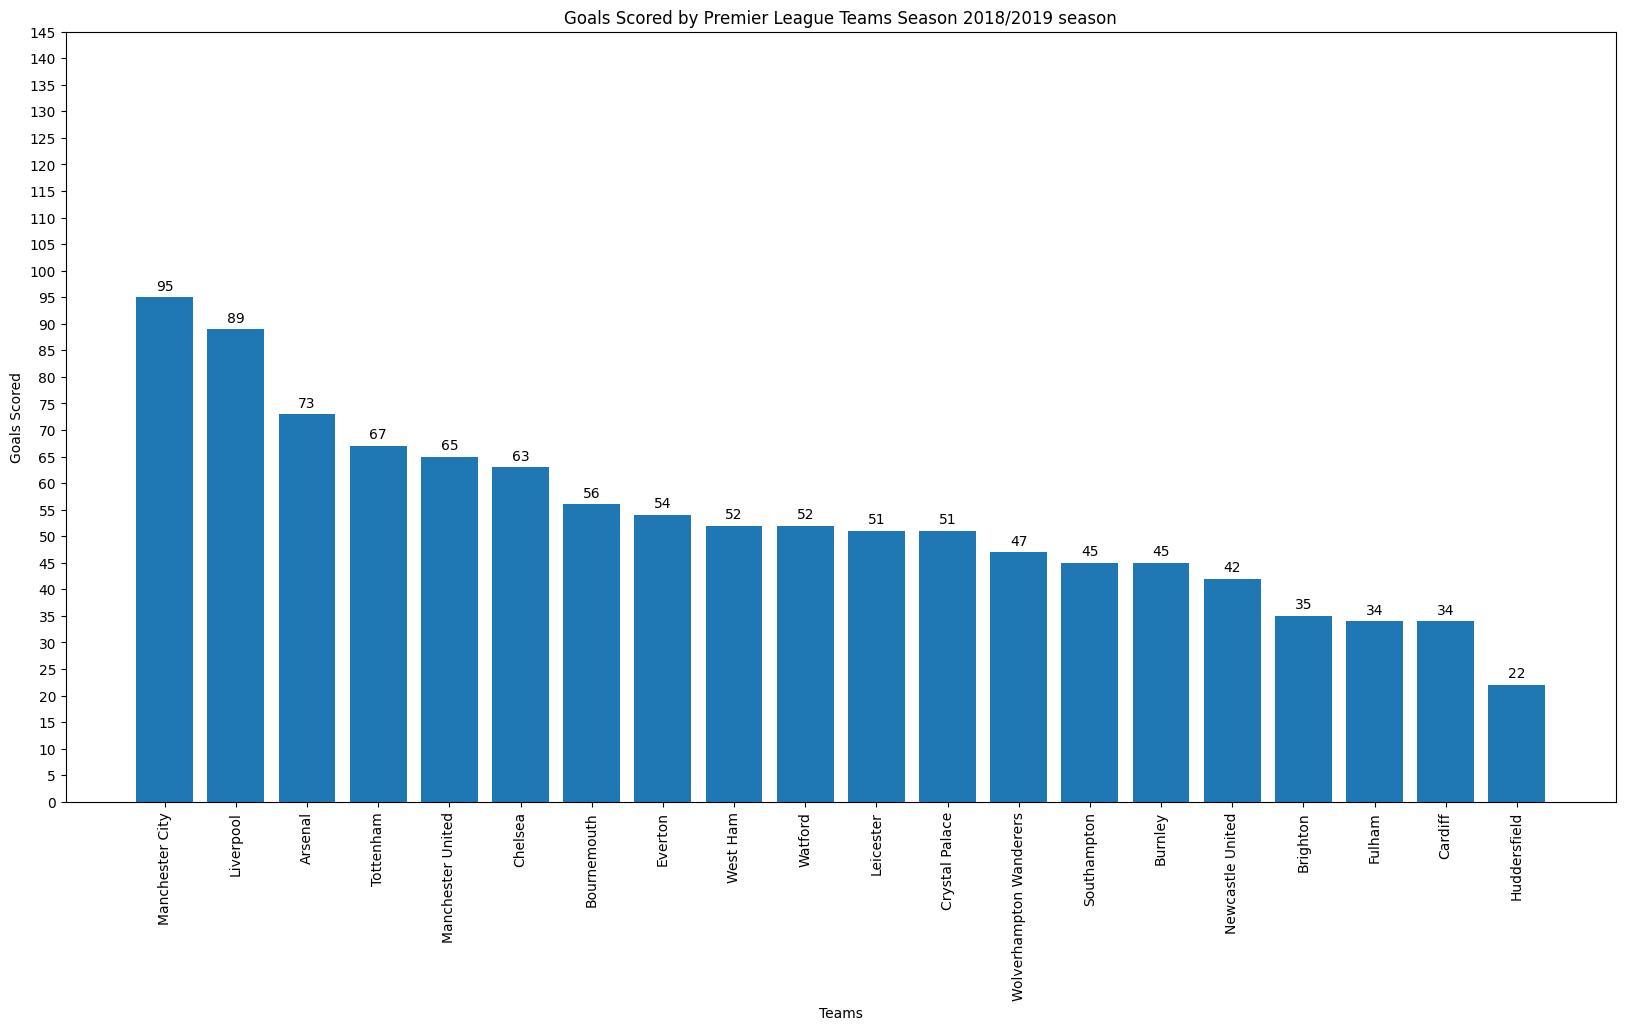

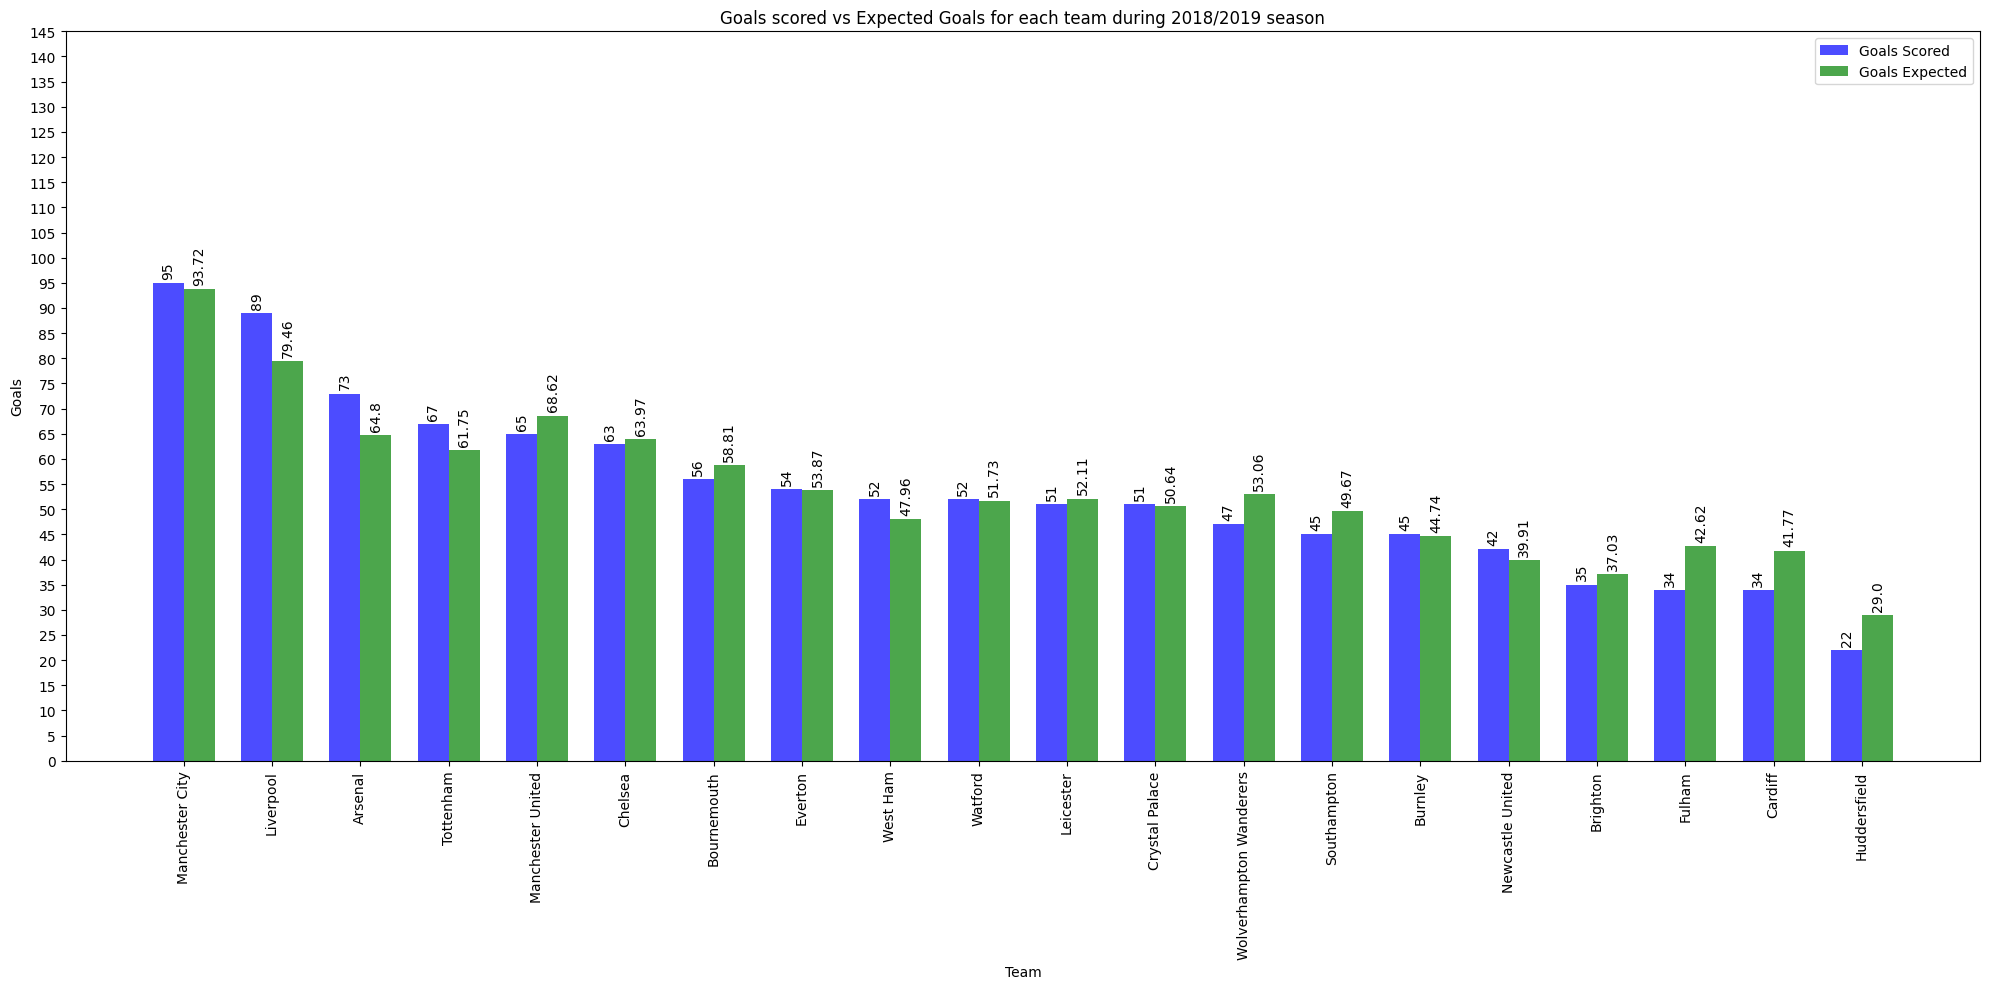

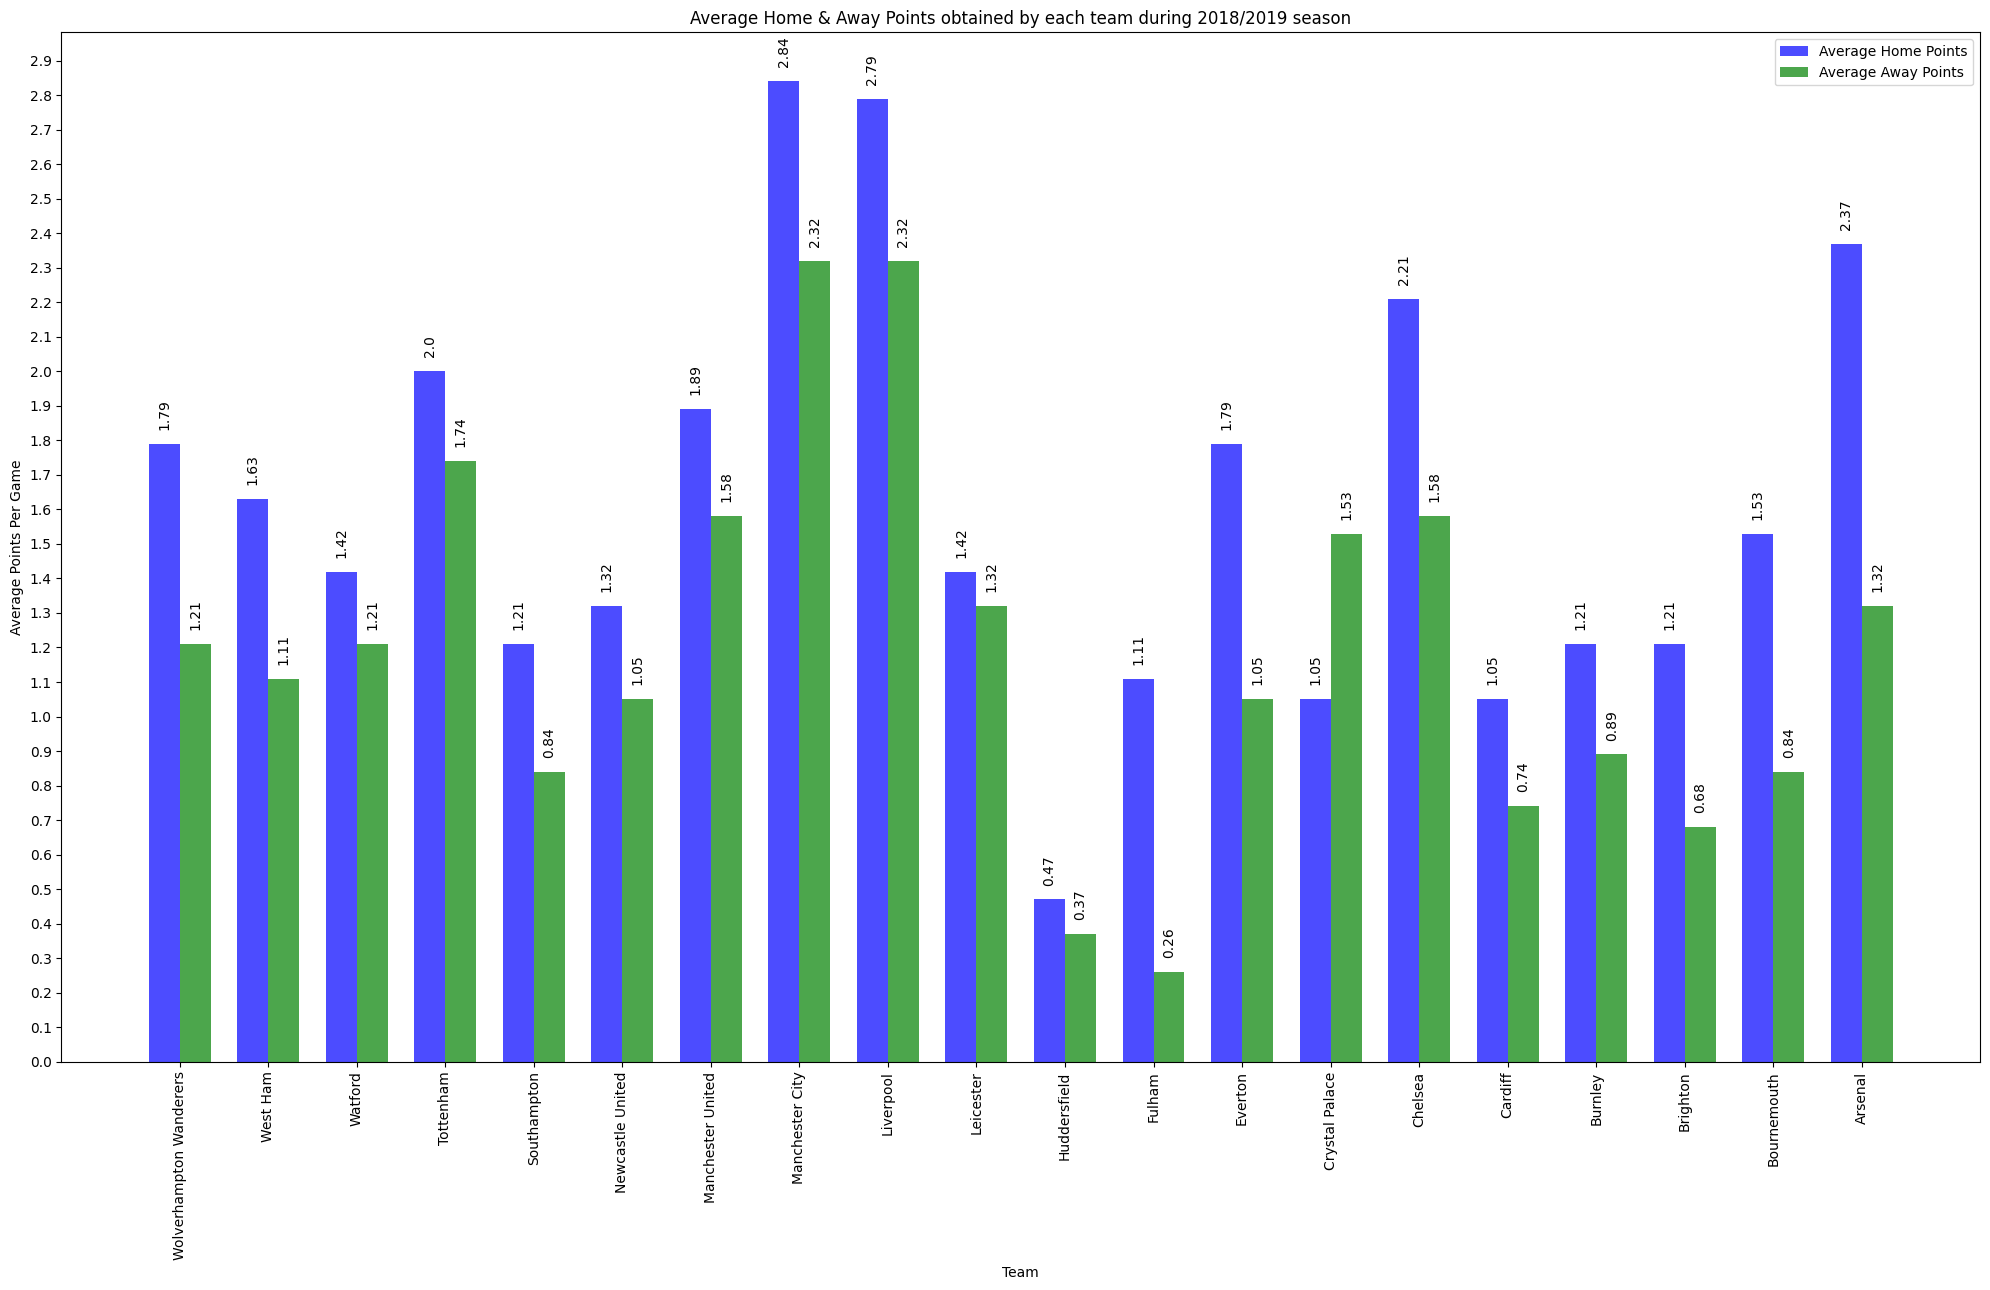

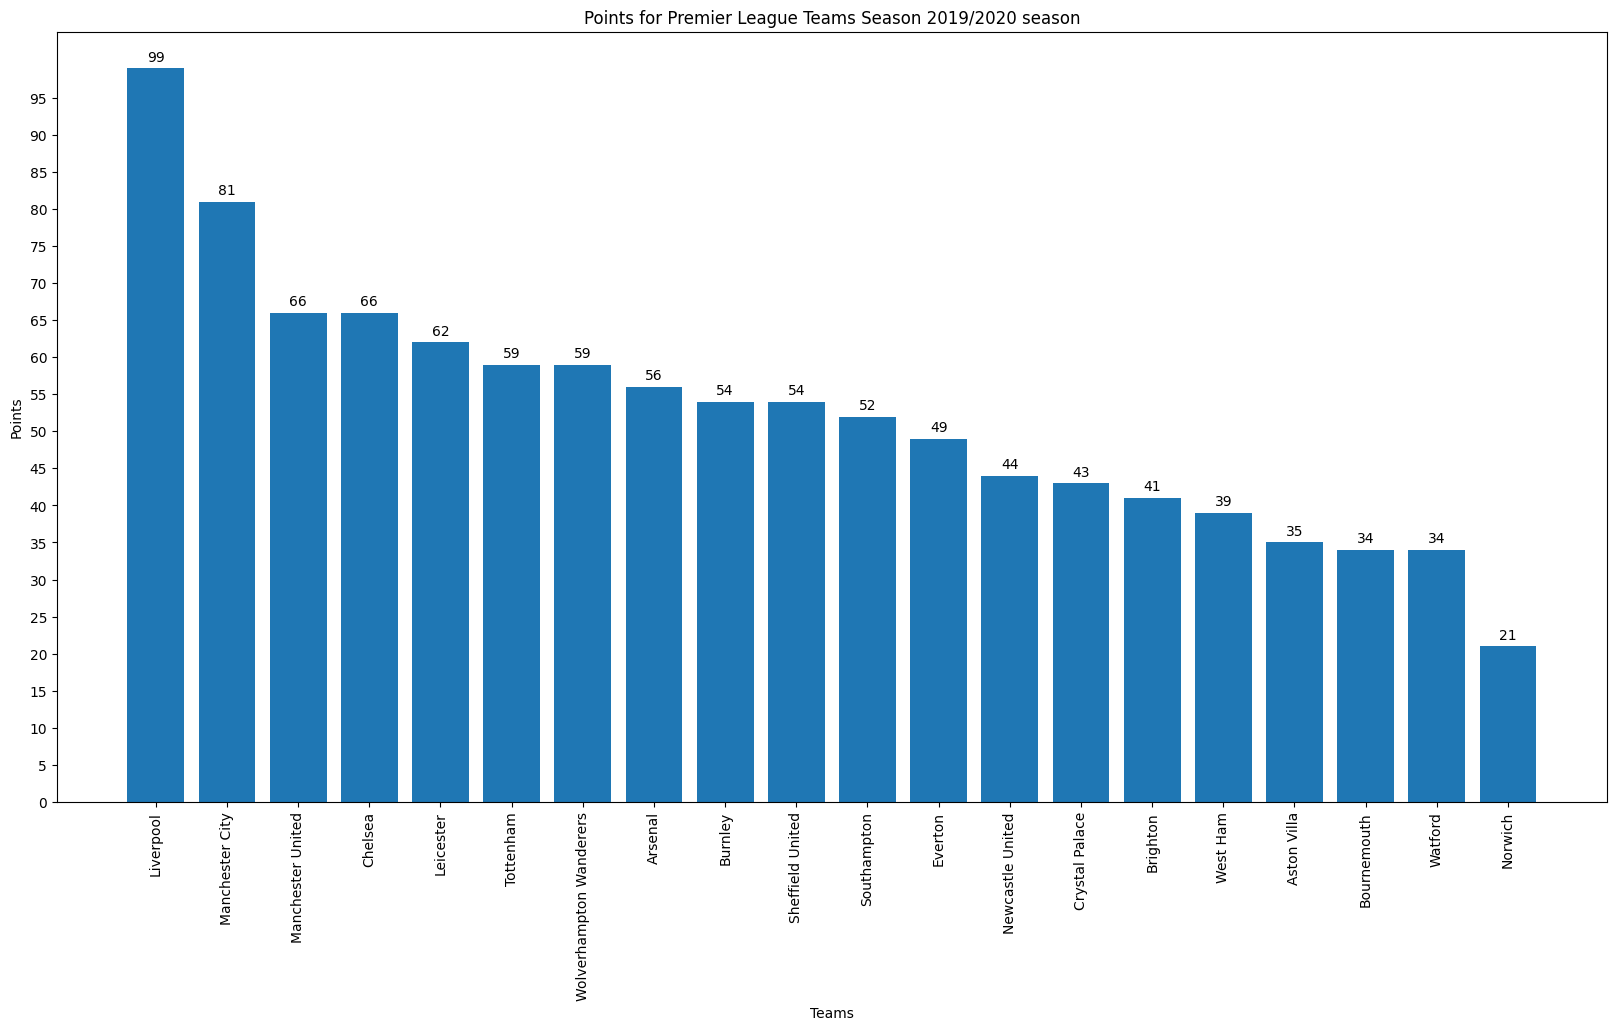

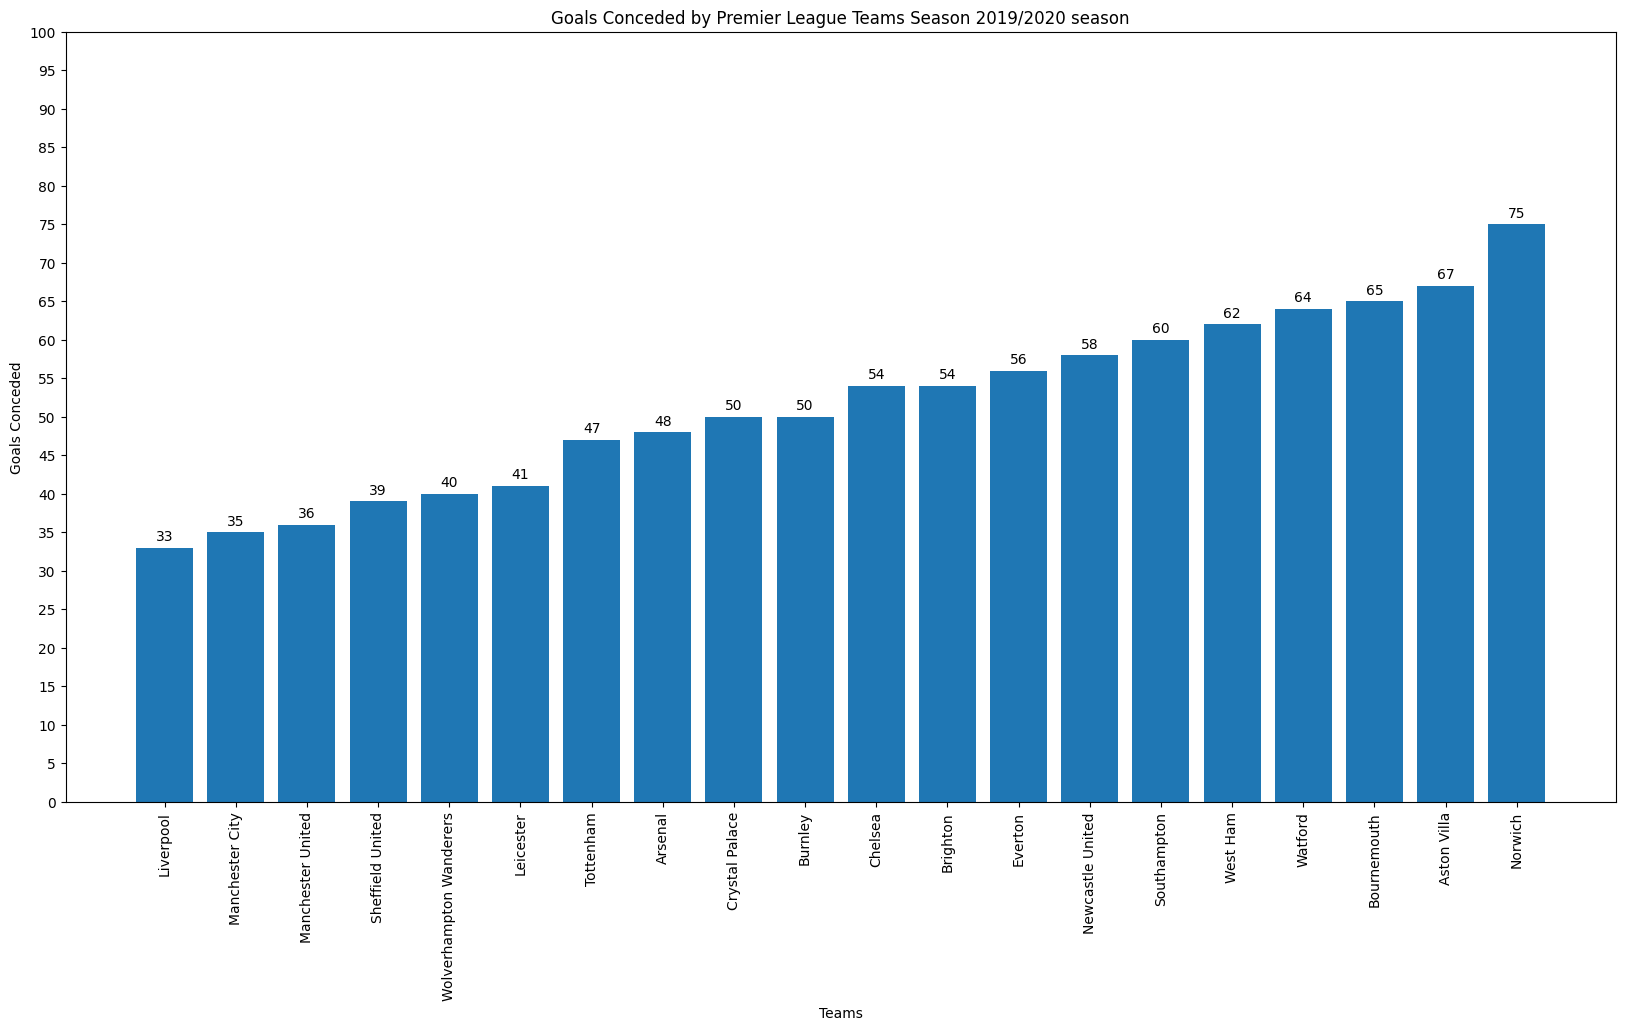

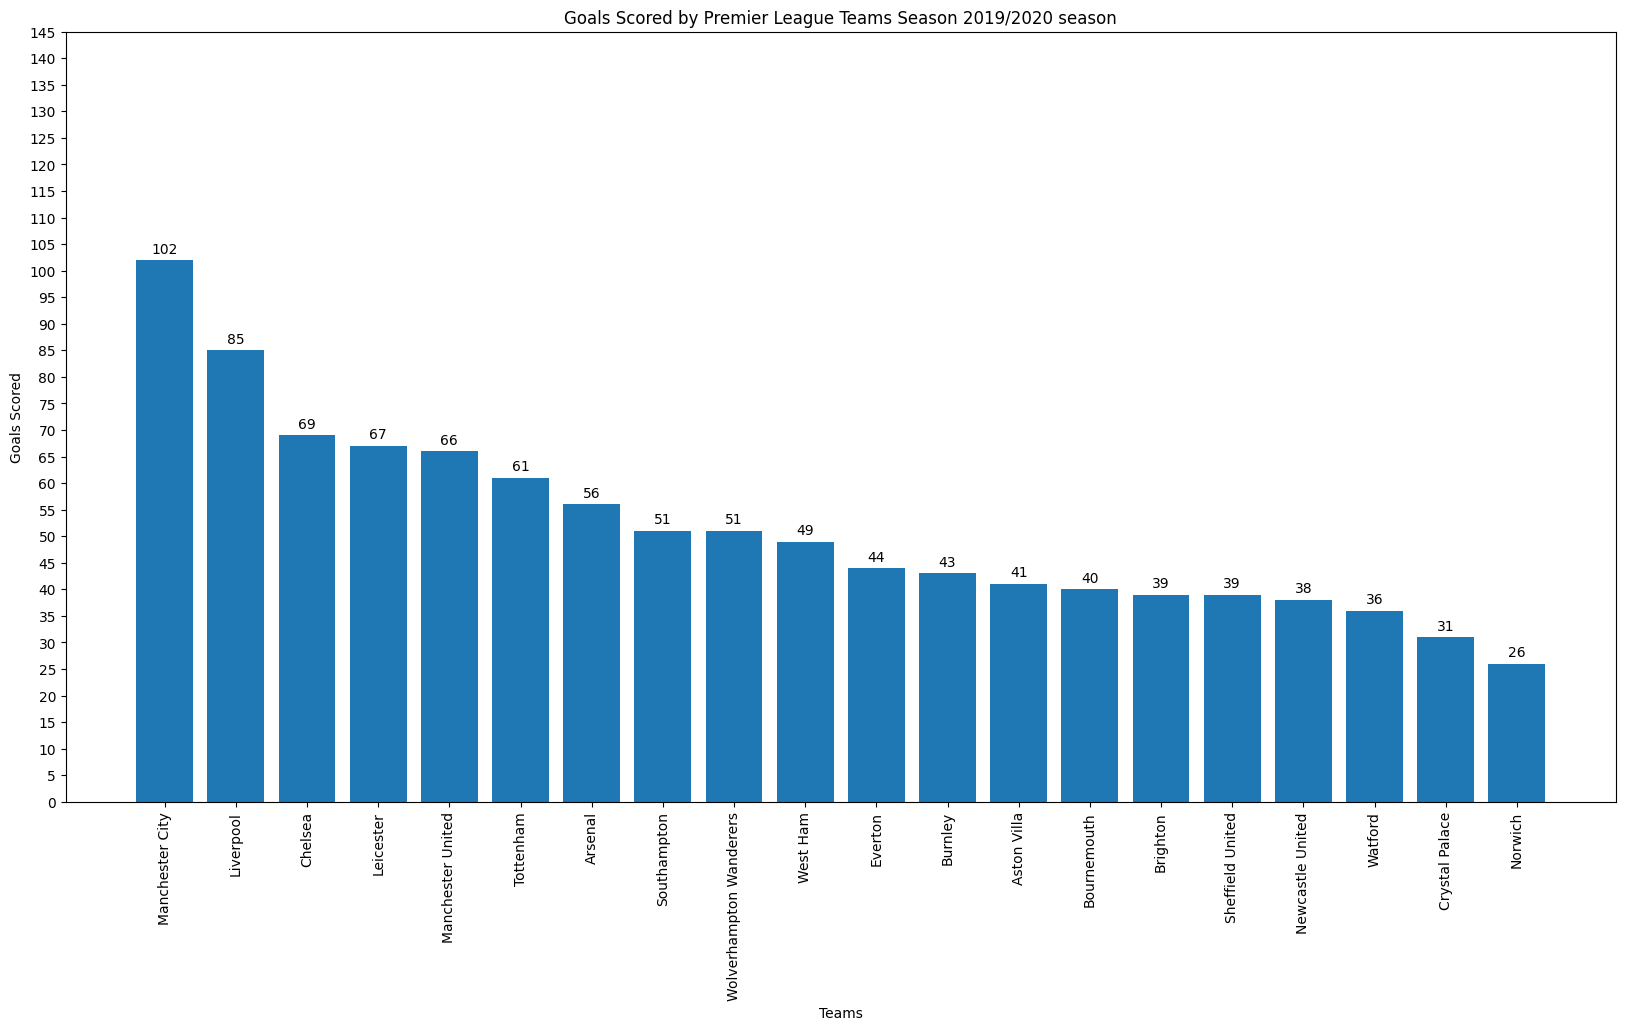

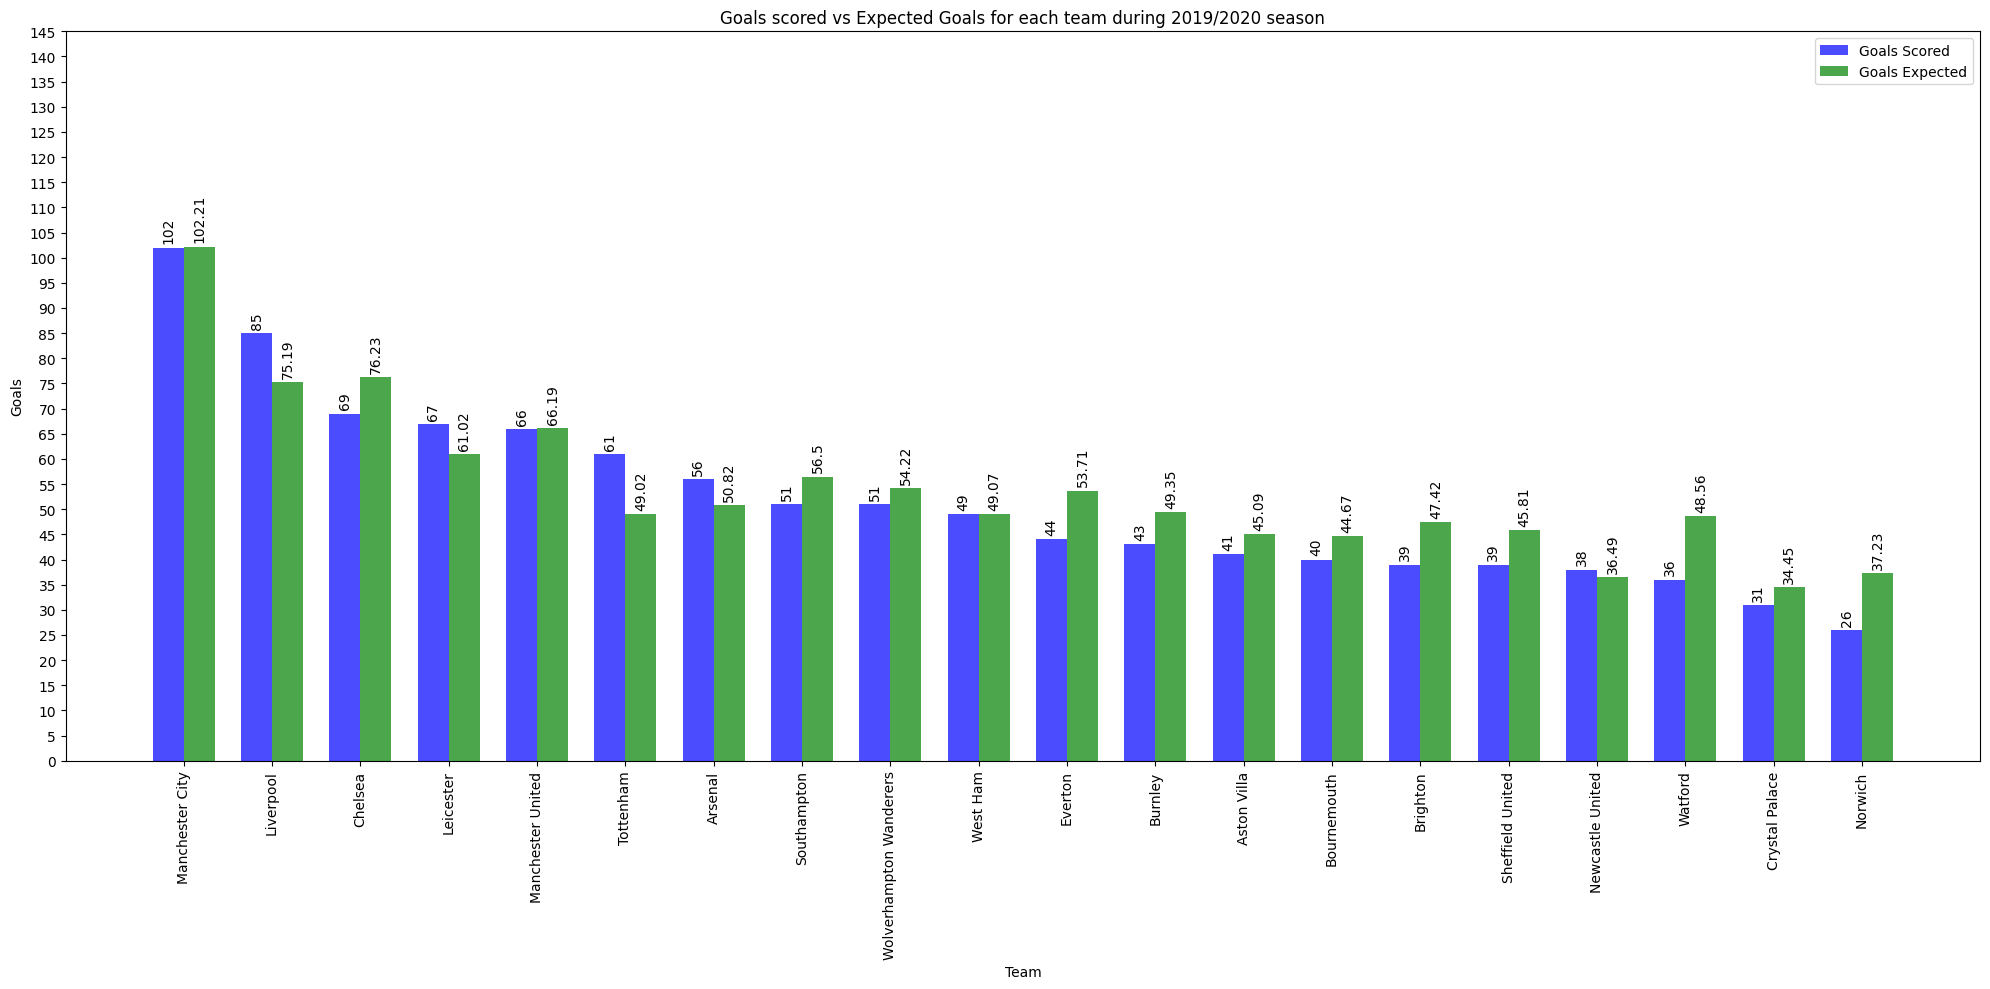

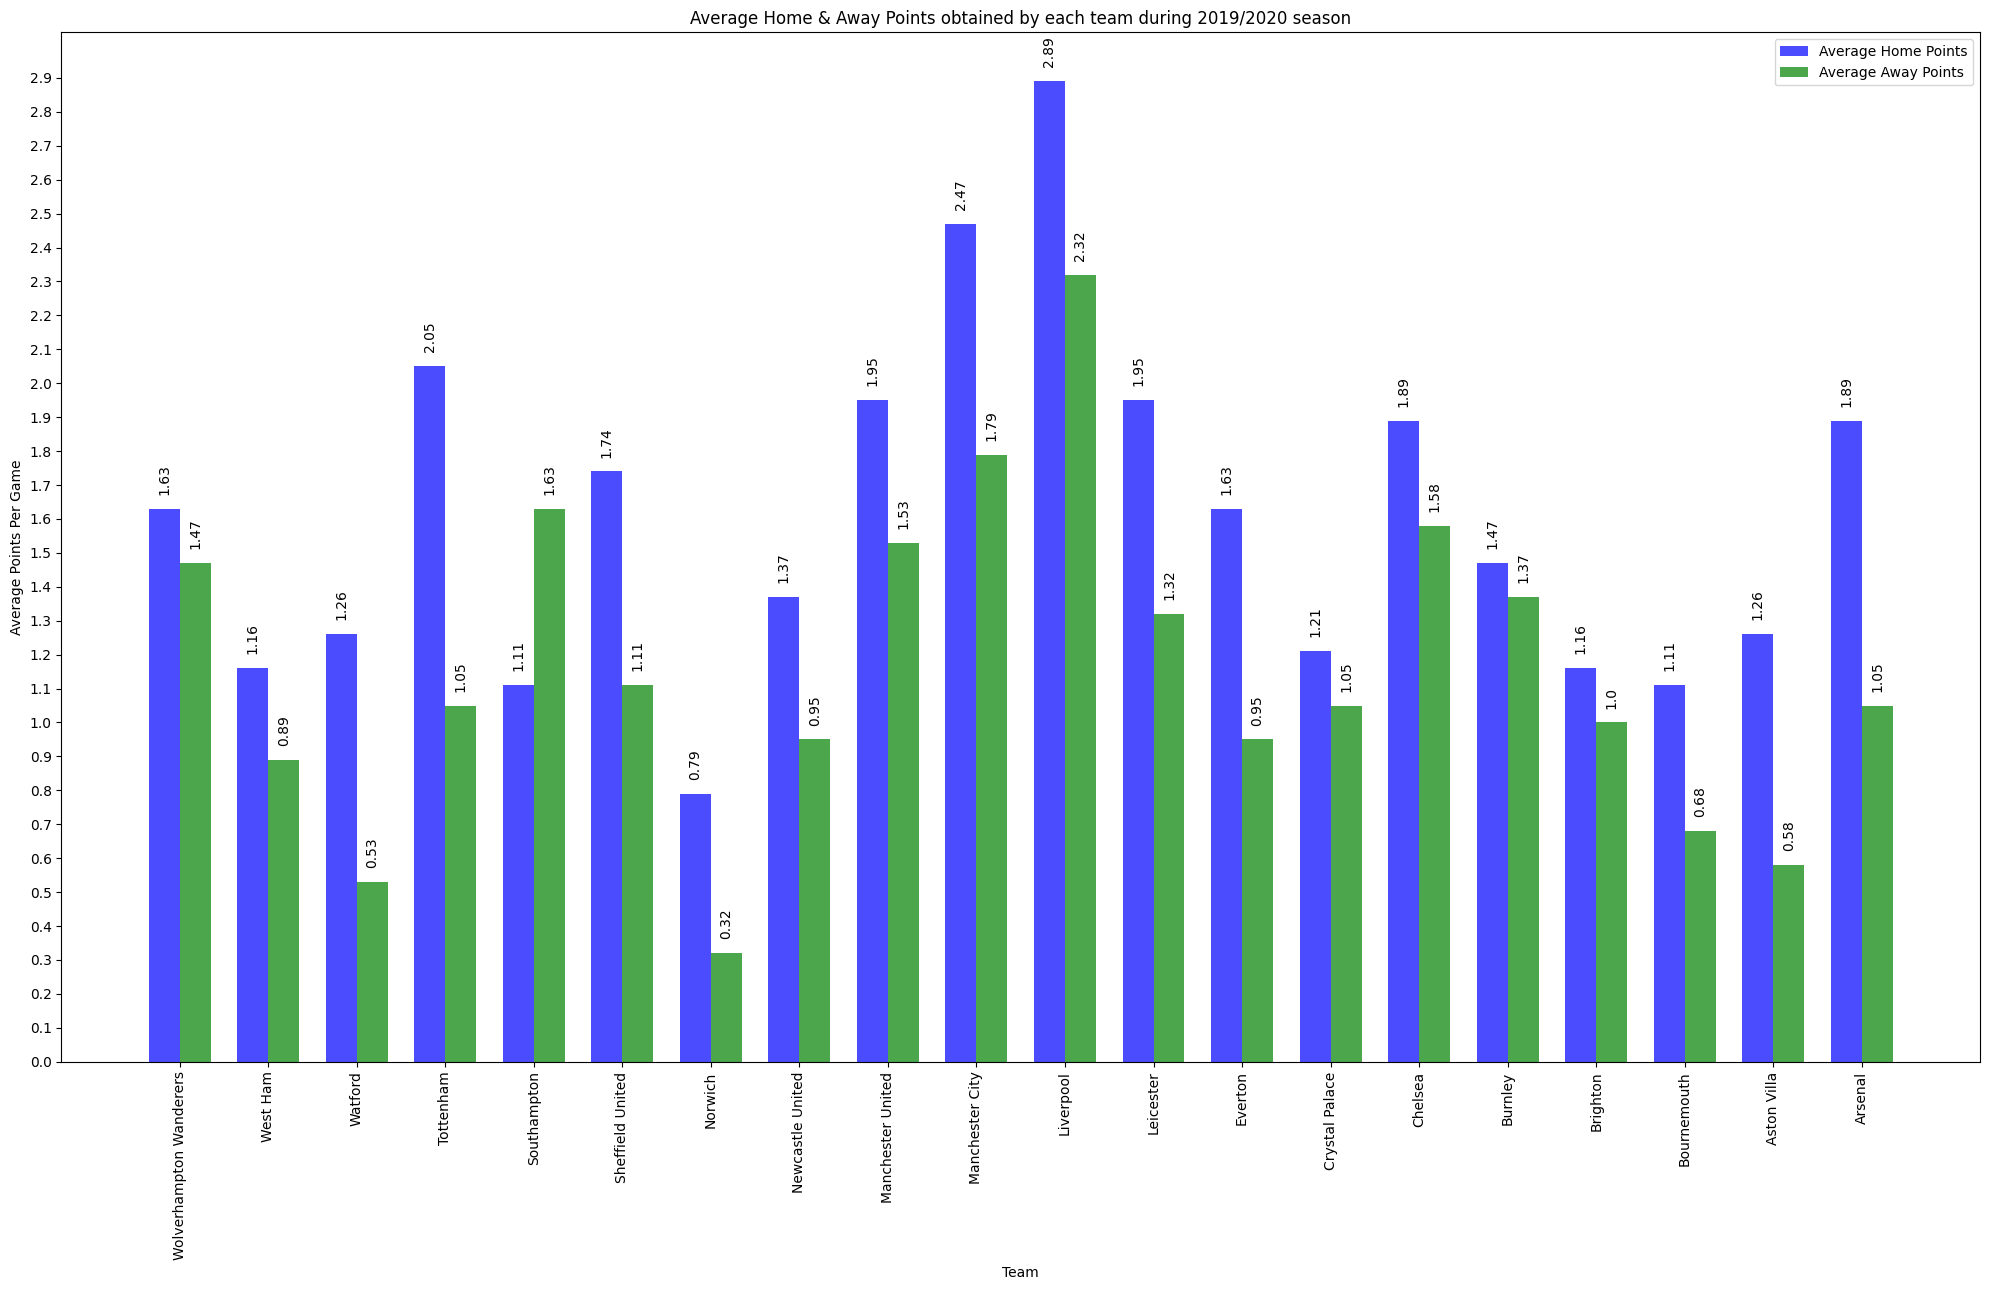

In [ ]:
df_list = [df_2014, df_2015, df_2016, df_2017, df_2018, df_2019]
for df in df_list:
  League_winner(df)
  Best_defence(df)
  Best_attack(df)
  team_xg(df)
  homevsaway(df)

# The Effect of Managers
Pep Guardiola and Jurgen Klopp are the best managers in Manchester City and Liverpool's history respectivelly. They both contirbuted to one of the best manager rivalries ever witnessed in the history of football and have cemented their legacies in the minds of their fans. In this section, we will take a look at the performance of their respective teams before and after their joining.

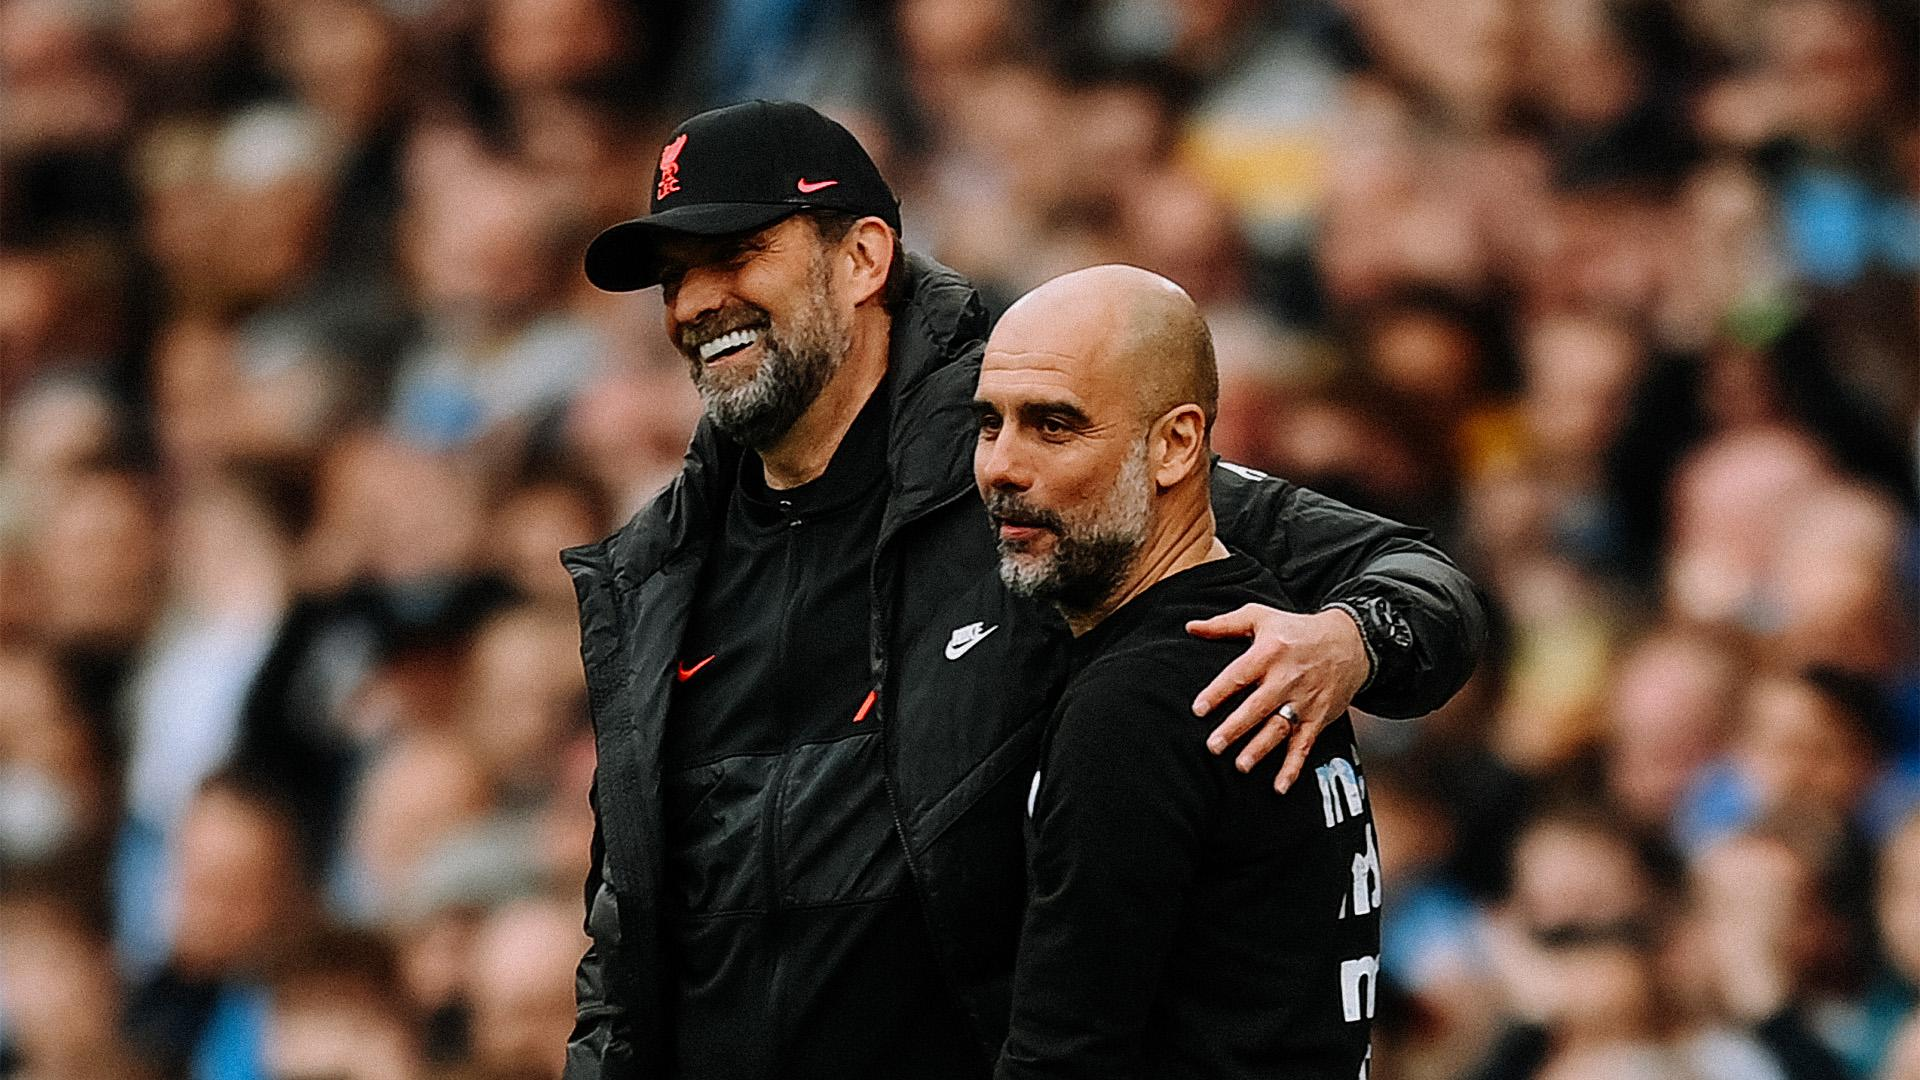

In [116]:
def beforeandafter(df, team, season):
  '''
  This function takes the team name and season as inputs and splits the overall dataframe into dataframes of team's data corresponding to before and after the specified season
  '''
  df = df[df['team_name'] == team]
  df_before = df[df['season'] <= (int(season))]
  df_after = df[df['season'] > (int(season))]


  return df_before, df_after


def custom_analysis(df_before, df_after, metric, label):
    '''
    This function prints a barplot of the average of the specificed metric in home and away games achieced by the team before and after the signing of the manager

    '''
    fig, ax = plt.subplots(figsize=(10, 10))

    dff_home_after = df_after[df_after['Home/Away'] == 'h']
    dff_away_after = df_after[df_after['Home/Away'] == 'a']

    dff_home_before = df_before[df_before['Home/Away'] == 'h']
    dff_away_before = df_before[df_before['Home/Away'] == 'a']

    dff_home_before = dff_home_before.groupby('team_name')[metric].mean().reset_index().sort_values(by=metric, ascending=False)
    dff_home_after = dff_home_after.groupby('team_name')[metric].mean().reset_index().sort_values(by=metric, ascending=False)
    dff_away_before = dff_away_before.groupby('team_name')[metric].mean().reset_index().sort_values(by=metric, ascending=False)
    dff_away_after = dff_away_after.groupby('team_name')[metric].mean().reset_index().sort_values(by=metric, ascending=False)

    dff_away_before[metric] = dff_away_before[metric].round(2)
    dff_away_after[metric] = dff_away_after[metric].round(2)

    dff_home_after[metric] = dff_home_after[metric].round(2)
    dff_home_before[metric] = dff_home_before[metric].round(2)

    teams = dff_home_before['team_name']
    width = 0.35  # Width of the bars

    # Lists to store statements for each team
    before_statements = []
    after_statements = []

    # Loop through each team and assign statements
    for team in teams:
        if team == 'Manchester City':
            before_statement = 'Before'
            after_statement = 'After Pep Guardiola'
        elif team == 'Liverpool':
            before_statement = 'Before'
            after_statement = 'After Jurgen Klopp'
        else:
            before_statement = 'Before'
            after_statement = 'After'

        before_statements.append(before_statement)
        after_statements.append(after_statement)

    # Use numpy.arange(len(teams)) as x-coordinates directly
    x = np.array([1])

    # Create the bar plots for both seasons with adjusted positions
    #for i, team in enumerate(teams):

    #if bar_x_positions == 1:
# Create the bar plots for both seasons with adjusted positions
    for i, team in enumerate(teams):
      bar_x_position = x[i]
      bar_width = width / 2

      # Plot "before" data for the current team
      barplot_before_home = plt.bar(bar_x_position - bar_width, dff_home_before[metric][i], bar_width, label=before_statements[i]+ ' Home')
      barplot_before_away = plt.bar(bar_x_position, dff_away_before[metric][i], bar_width, label=before_statements[i]+' Away')
      plt.bar_label(barplot_before_home, labels=dff_home_before[metric], label_type='edge', padding=2)
      plt.bar_label(barplot_before_away, labels=dff_away_before[metric], label_type='edge', padding=2)

      # Plot "after" data for the current team
      bar_x_position = x[i] + 1  # Adjust position for the "after" data
      barplot_after_home = plt.bar(bar_x_position+bar_width / 2, dff_home_after[metric][i], bar_width, label=after_statements[i]+ ' Home')
      barplot_after_away = plt.bar(bar_x_position + 3*bar_width / 2, dff_away_after[metric][i], bar_width, label=after_statements[i]+ ' Away')
      plt.bar_label(barplot_after_home, labels=dff_home_after[metric], label_type='edge', padding=2)
      plt.bar_label(barplot_after_away, labels=dff_away_after[metric], label_type='edge', padding=2)

    plt.xlabel('Team')
    plt.ylabel(label)
    plt.title(f"Average {label} by {teams[0]} {before_statement} and {after_statement}")
    plt.xticks(x+0.5, teams, rotation=0)
    plt.legend()
    plt.show()

    return

## Manchester City: Pep Guardiola

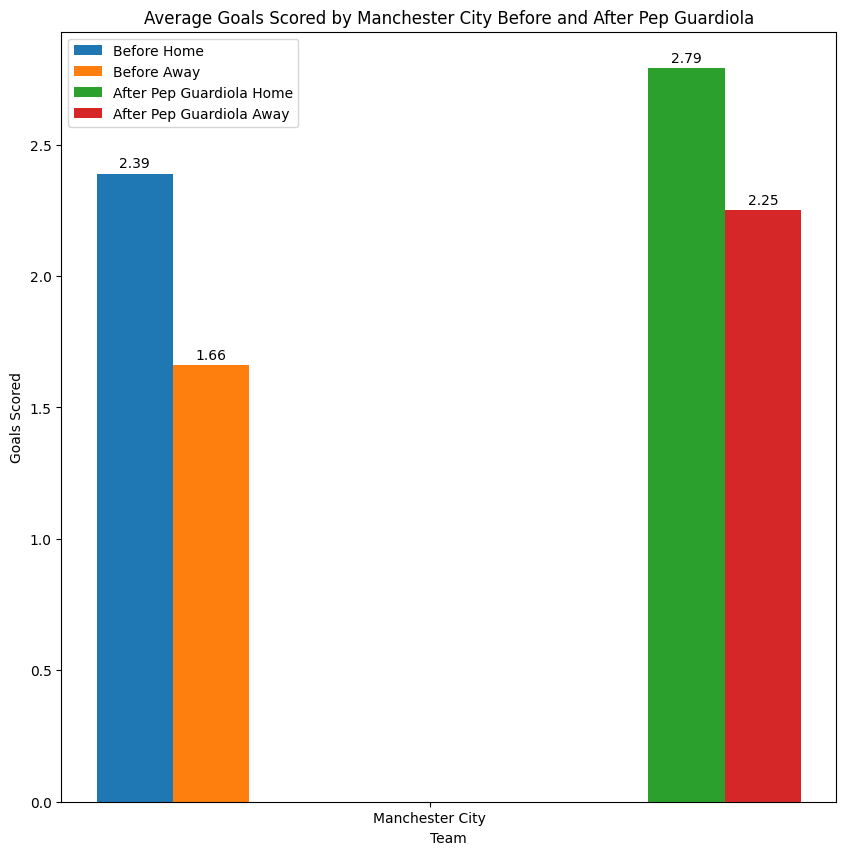

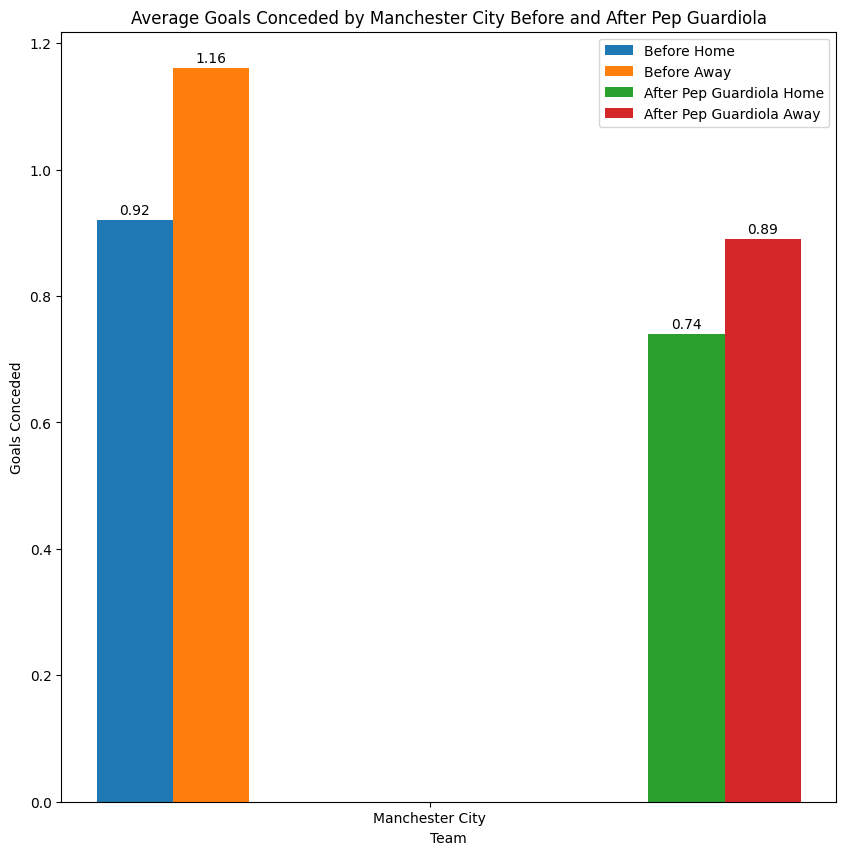

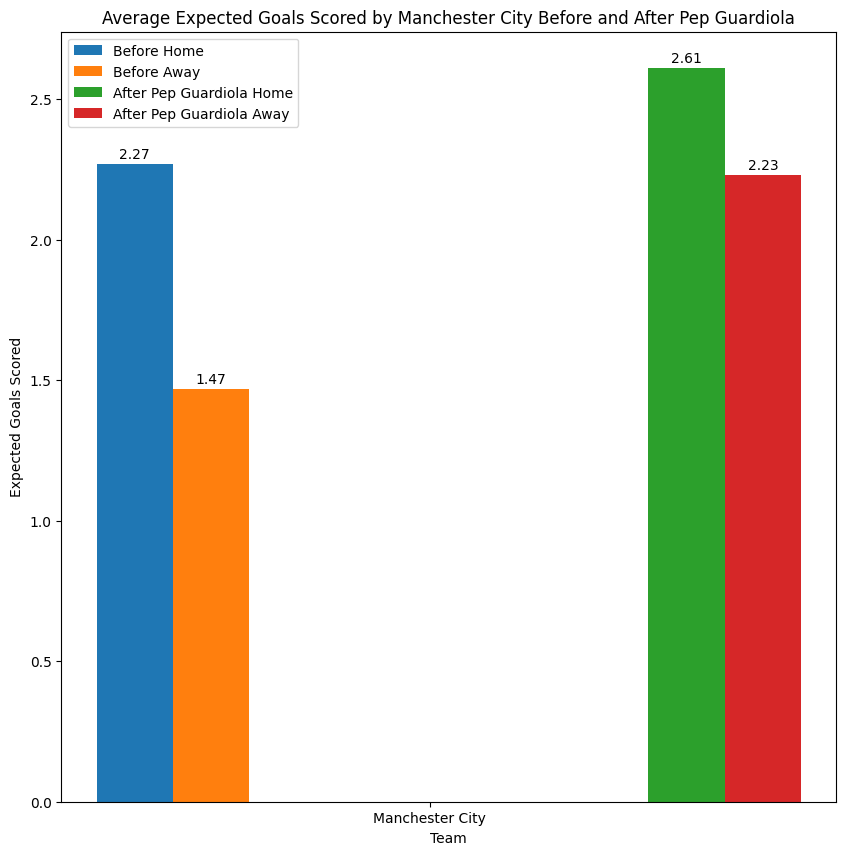

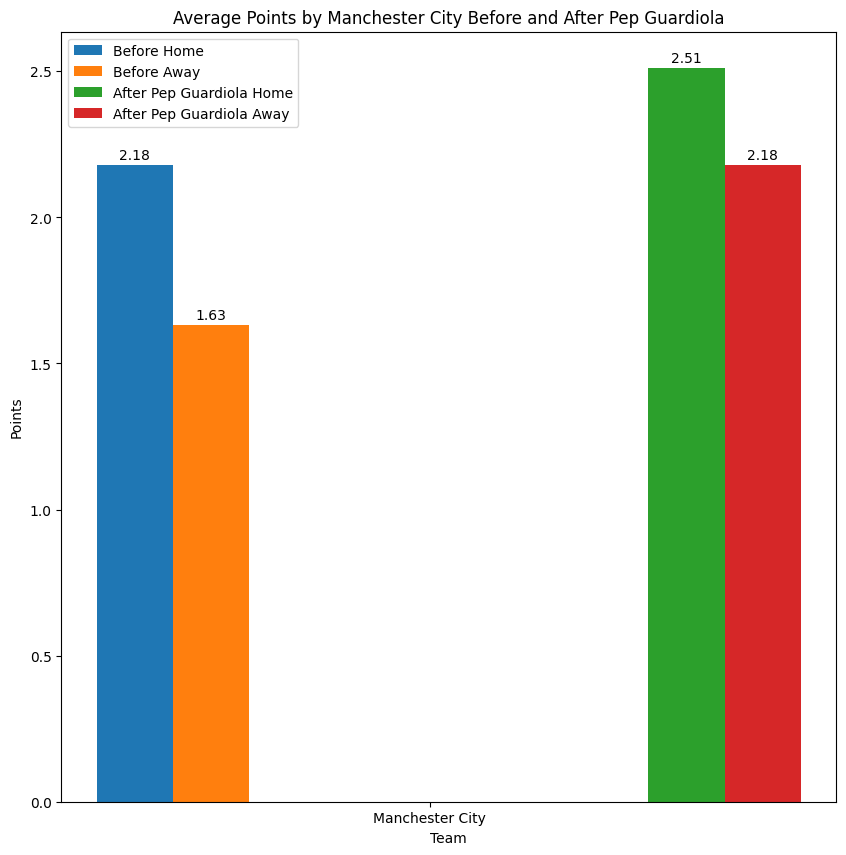

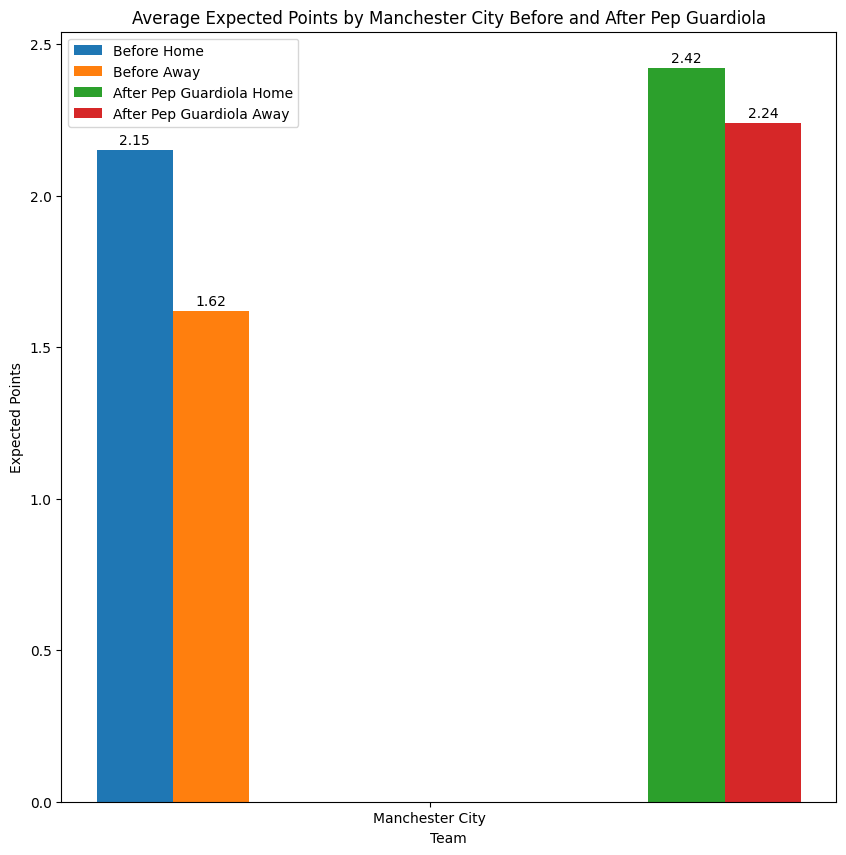

In [117]:
x,y = beforeandafter(team_df, 'Manchester City', 2015)
custom_analysis(x,y,'scored', 'Goals Scored')
custom_analysis(x,y,'conceded', 'Goals Conceded')
custom_analysis(x,y,'xG', 'Expected Goals Scored')
custom_analysis(x,y,'pts', 'Points')
custom_analysis(x,y,'xpts', 'Expected Points')

## Liverpool: Jurgen Klopp

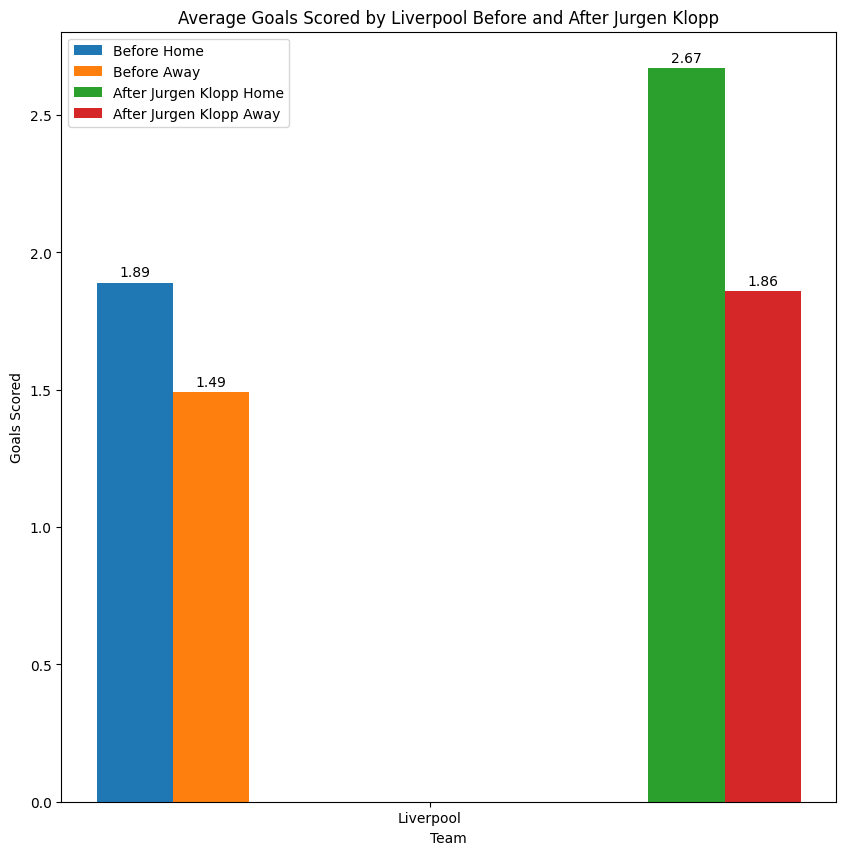

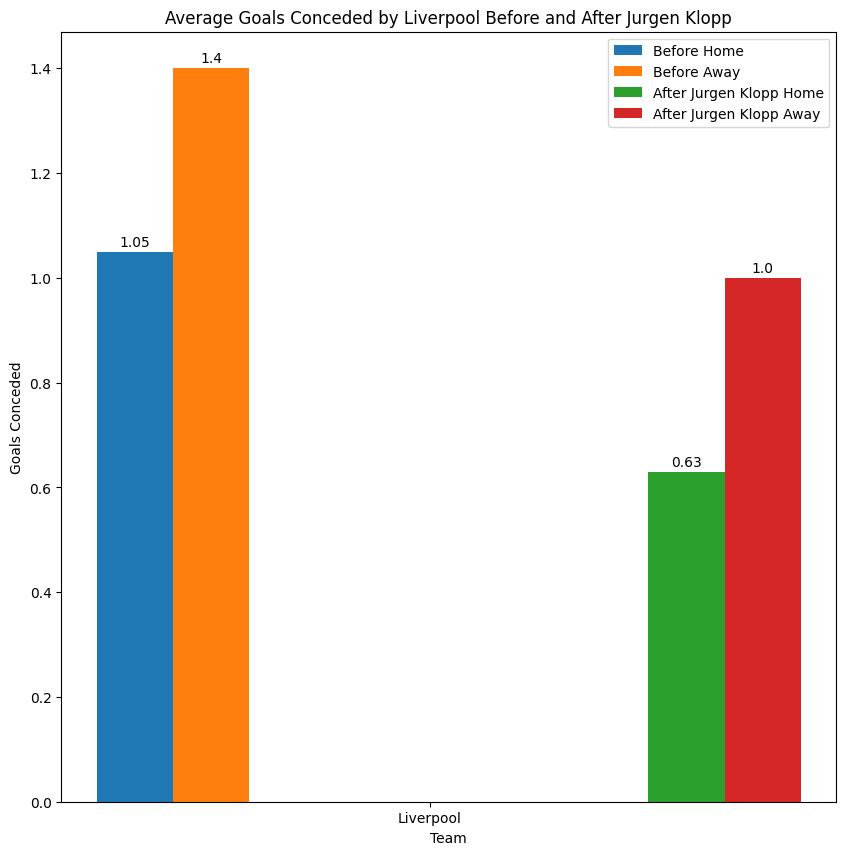

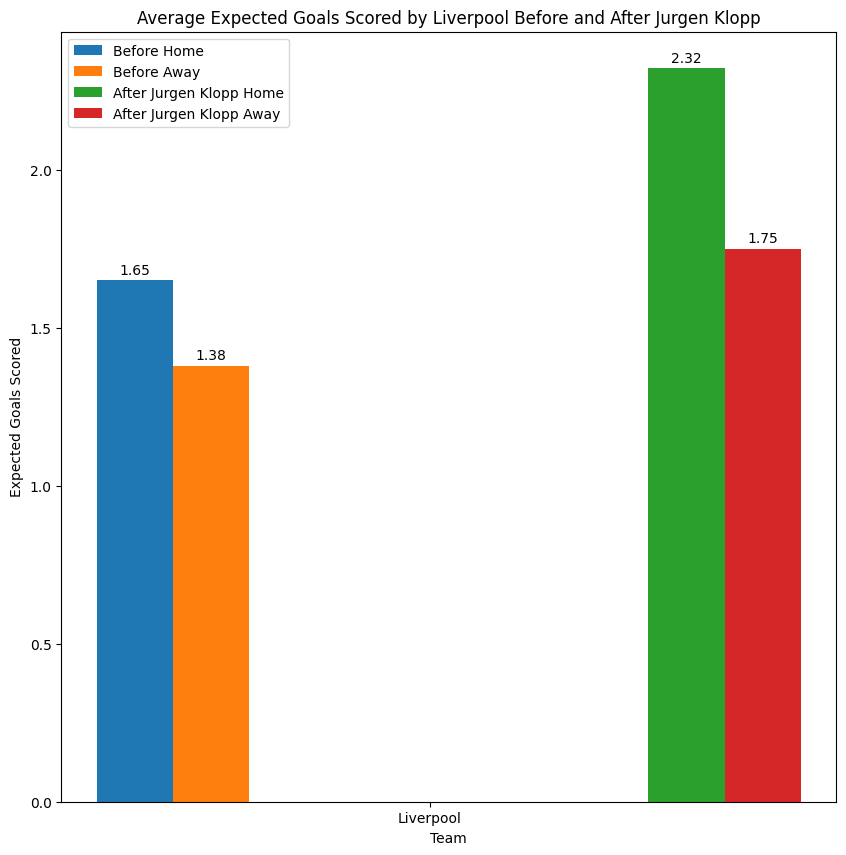

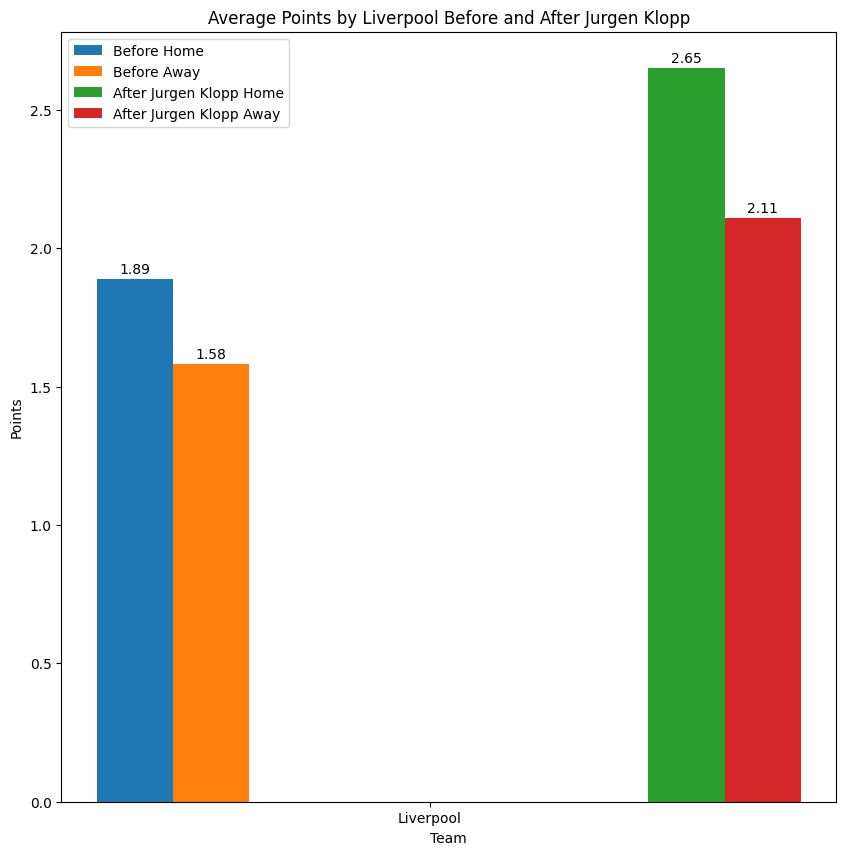

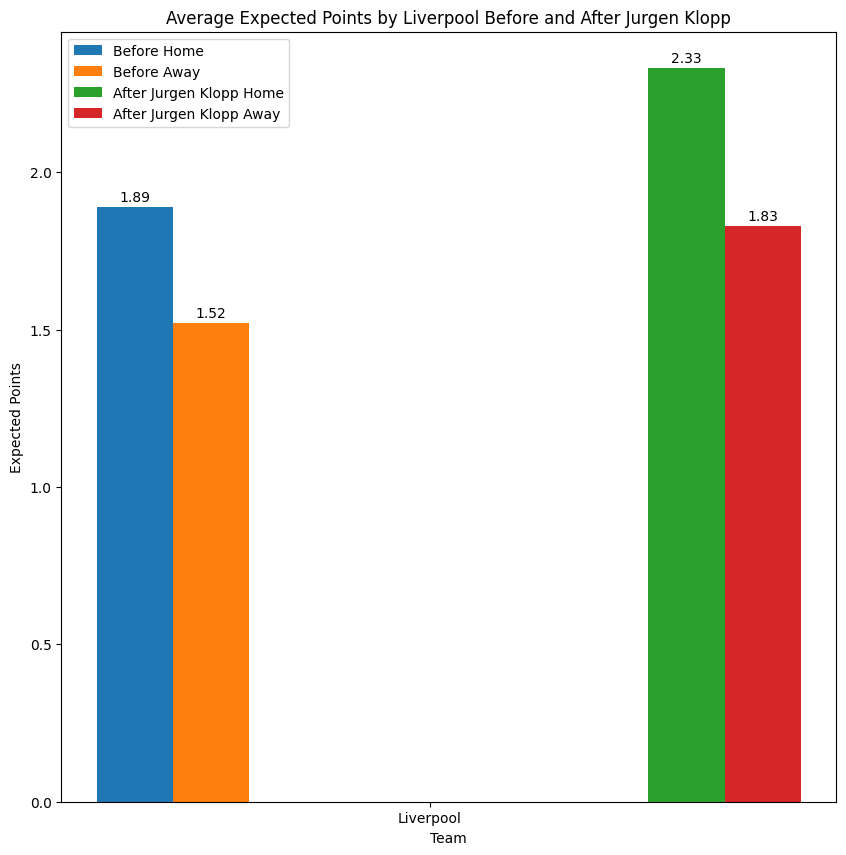

In [118]:
x,y = beforeandafter(team_df, 'Liverpool', 2016)
custom_analysis(x,y,'scored', 'Goals Scored')
custom_analysis(x,y,'conceded', 'Goals Conceded')
custom_analysis(x,y,'xG', 'Expected Goals Scored')
custom_analysis(x,y,'pts', 'Points')
custom_analysis(x,y,'xpts', 'Expected Points')

# Conclusion

We can see the effect that Pep guardiola and Jurgen Klopp had improved the team across all performance metrics. Both teams, on average, scored more goals, were expected to score more goals, conceded less goals, and obtained more points in both home and away games. Hats off to the best managers of the last decade!